# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 11 </span>
## <span style="color:orange"> Keras - Neural Network regression </span>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

2023-10-31 21:30:23.875683: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-31 21:30:23.916304: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-31 21:30:24.088664: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-31 21:30:24.088697: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-31 21:30:24.089419: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

### Overview 

In this notebook our task will be to perform machine learning regression on noisy data with a Neural Network (NN).

We will explore how the ability to fit depends on the structure of the NN. The goal is also to build intuition about why prediction is difficult.

### The Prediction Problem

Consider a probabilistic process that gives rise to labeled data $(x,y)$. The data is generated by drawing samples from the equation

$$
    y_i= f(x_i) + \eta_i,
$$

where $f(x_i)$ is some fixed, but (possibly unknown) function, and $\eta_i$ is a Gaussian, uncorrelate noise variable such that

$$
\langle \eta_i \rangle=0 \\
\langle \eta_i \eta_j \rangle = \delta_{ij} \sigma
$$

We will refer to the $f(x_i)$ as the **true features** used to generate the data. 

To make predictions, we will consider a NN that depends on its parameters, weights and biases. The functions that the NN can model respresent the **model class** that we are using to try to model the data and make predictions.

To learn the parameters of the NN, we will train our models on a **training data set** and then test the effectiveness of the NN on a *different* dataset, the **validation data set**. The reason we must divide our data into a training and test dataset is that the point of machine learning is to make accurate predictions about new data we have not seen.

To measure our ability to predict, we will learn our parameters by fitting our training dataset and then making predictions on our test data set. One common measure of predictive  performance of our algorithm is to compare the predictions,$\{y_j^\mathrm{pred}\}$, to the true values $\{y_j\}$. A commonly employed measure for this is the sum of the mean square-error (MSE) on the test set:
$$
MSE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2
$$

We will try to get a qualitative picture by examining plots on validation and training data.

### Linear fit

We start by considering the very simple case:
$$
f(x)=2x+1
$$

Let's start defining the parameters of an ideal linear function which we are going to predict through a neural network regression

In [2]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

Now let's generate a set of input data which will slightly deviate from our ideal behaviour using a random noise (that actually is set to zero):

In [3]:
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.3 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

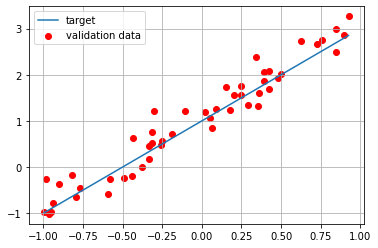

In [4]:
# plot validation and target dataset
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

If you remember how a single node of a neural network works, you can easily spot that **just a single neuron can make the job**. So let's start using a simple Sequential model with just one layer on one neuron only!

In [5]:
# compose the NN model
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

2023-10-31 21:30:27.089592: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-31 21:30:27.090604: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2211] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [6]:
# get a summary of our composed model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


We are now going to train our model, that is we feed the neuron with the set of training pair x, y_train from which the optimizer will find the best weights to minimize the Mean Square Error loss function (out linear regression function).

In [7]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/30
16/16 [==============================] - 0s 6ms/step - loss: 3.0514 - mse: 3.0514 - val_loss: 2.4563 - val_mse: 2.4563
Epoch 2/30
16/16 [==============================] - 0s 2ms/step - loss: 2.2867 - mse: 2.2867 - val_loss: 1.8633 - val_mse: 1.8633
Epoch 3/30
16/16 [==============================] - 0s 2ms/step - loss: 1.7540 - mse: 1.7540 - val_loss: 1.4520 - val_mse: 1.4520
Epoch 4/30
16/16 [==============================] - 0s 2ms/step - loss: 1.3783 - mse: 1.3783 - val_loss: 1.1481 - val_mse: 1.1481
Epoch 5/30
16/16 [==============================] - 0s 2ms/step - loss: 1.0986 - mse: 1.0986 - val_loss: 0.9237 - val_mse: 0.9237
Epoch 6/30
16/16 [==============================] - 0s 3ms/step - loss: 0.8876 - mse: 0.8876 - val_loss: 0.7503 - val_mse: 0.7503
Epoch 7/30
16/16 [==============================] - 0s 3ms/step - loss: 0.7244 - mse: 0.7244 - val_loss: 0.6147 - val_mse: 0.6147
Epoch 8/30
16/16 [==============================] - 0s 3ms/step - loss: 0.5960 - mse: 0.59

By looking at weights and biases we can see if the linear fit was successfull: $w_1$ represents the angular coefficient, $b$ the intercept.

In [8]:
# return weights and biases
model.get_weights()

[array([[1.928425]], dtype=float32), array([0.9655996], dtype=float32)]

In [9]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 3ms/step - loss: 0.1018 - mse: 0.1018

Test loss: 0.10182185471057892
Test accuracy: 0.10182185471057892


In [10]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 2ms/step - loss: 0.0026 - mse: 0.0026    

Test loss: 0.002559799002483487
Test accuracy: 0.002559799002483487


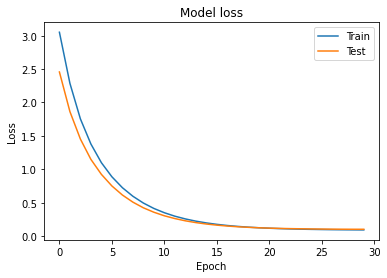

In [11]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

4/4 [==============================] - 0s 1ms/step


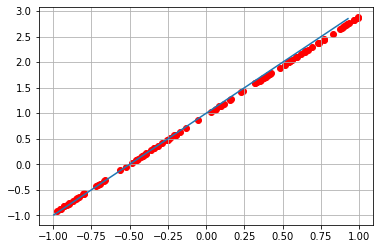

In [12]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

### Exercise 11.1

In order to make practice with NN, explore how does the previous linear regression depend on the number of epochs, $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$. Try to improve the previous result operating on these parameters.

### Exercise 11.2

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

In order to make practice with NN, explore reasonable different choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
Make graphs comparing fits for different NNs.
Check your NN models by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set? 
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

### Exercise 11.3
  
Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

Ideas to meditate on these exercises and judge your results can be found <a href=https://xkcd.com/2048/>here</a>

### <span style="color:green">Supplementary material: Keras model.fit available callbacks</span>

The .fit method can also get <a href=https://keras.io/callbacks/>callback</a> functions which can be used to customize the fitting procedure with special actions.

Keras provides some predefined callbacks to feed in, among them for example:
- **TerminateOnNaN()**: that terminates training when a NaN loss is encountered
- **ModelCheckpoint(filepath)**: that save the model after every epoch
- **EarlyStopping()**: which stop training when a monitored quantity has stopped improving

You can select one or more callback and pass them as a list to the callback argument of the fit method.

Now we are going to construct a callback object to represent how estimated parameters are converging during the training procedure

In [13]:
from IPython.display import clear_output

class PlotCurrentEstimate(tf.keras.callbacks.Callback):
    def __init__(self, x_valid, y_valid):
        """Keras Callback which plot current model estimate against reference target"""
        
        # convert numpy arrays into lists for plotting purposes
        self.x_valid = list(x_valid[:])
        self.y_valid = list(y_valid[:])
        self.iter=0

    def on_epoch_end(self, epoch, logs={}):
        
        temp = self.model.predict(self.x_valid, batch_size=None, verbose=False, steps=None)
        self.y_curr = list(temp[:]) # convert numpy array into list
        
        self.iter+=1
        if self.iter%10 == 0:
            clear_output(wait=True)            
            self.eplot = plt.subplot(1,1,1)
            self.eplot.clear()     
            self.eplot.scatter(self.x_valid, self.y_curr, color="blue", s=4, marker="o", label="estimate")
            self.eplot.scatter(self.x_valid, self.y_valid, color="red", s=4, marker="x", label="valid")
            self.eplot.legend()

            plt.show()

We will use also an EarlyStopping callback on the val_loss quantity. This will stop the training process as soon as the val_loss quantity does not improve anymore after an amount of epochs, preventing a long time of wated computation to take over without useful results.

<code>keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)</code>

Arguments:

- <code>monitor</code>: quantity to be monitored. 
- <code>min_delta:</code> minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement. 
- <code>patience:</code> number of epochs with no improvement after which training will be stopped. 
- <code>verbose:</code> verbosity mode. 
- <code>mode:</code> one of {auto, min, max}. In min mode, training will stop when the quantity monitored has stopped decreasing; in max mode it will stop when the quantity monitored has stopped increasing; in auto mode, the direction is automatically inferred from the name of the monitored quantity. 
- <code>baseline:</code> Baseline value for the monitored quantity to reach. Training will stop if the model doesn't show improvement over the baseline. 
- <code>restore_best_weights:</code> whether to restore model weights from the epoch with the best value of the monitored quantity. If False, the model weights obtained at the last step of training are used.

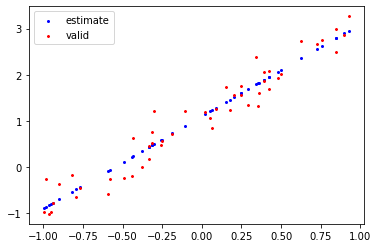

2/2 [==============================] - 0s 205ms/step - loss: 0.0808 - mse: 0.0808 - val_loss: 0.0808 - val_mse: 0.0808


[array([[2.0021305]], dtype=float32), array([1.1052037], dtype=float32)]

In [14]:
plot_estimate = PlotCurrentEstimate(x_valid, y_valid)

earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                  min_delta=0, patience=100, mode='auto')

model.fit(x_valid, y_valid, batch_size=32, epochs=150,
          validation_data=(x_valid, y_valid),
          callbacks=[ plot_estimate, earlystop]
          )

model.get_weights()

# <span style="color:darkred"> SOLUTION </span>

### <span style="color:darkblue"> Exercise 11.1 </span>

In the gallery below I present the results of the fit of the linear function $f(x) = 2x+1$ obtained by varying some parameters of the training of a NN made of a single node with no activation function. Since presenting the results along with the code would make the notebook excessively cumbersome, for this numerical exercise I opted to obtain the data and the plots, present the results and, after all is said, leave at the end some sample code that I used to generate the plots.

I started the study of the influence of the number of traning data $N_\mathrm{train}$, the number of epochs $N_\mathrm{epochs}$ and the noise $\sigma$ on the training of the single node NN from what seems to me the worst possible situation, i.e. by having few training data, very noisy, and by not giving the NN enough chances to learn from the data.

Therfore I started from $N_\mathrm{train}=100$, $N_\mathrm{epochs}=10$ and $\sigma = 1.00$. As expected, the NN can not do a very good regression. The model function is of course linear, since no activation function is applied to the node, but the parameters are not well adjusted. Not even the sign of the slope is guessed correctly.

The first scenario I considered is what happens when I reduce the noise. After a reduction from $\sigma = 1.00$ to $\sigma = 0.30$ there is a considerable improvement. However, by further reduction of the noise from $0.30$ to $0.05$ the performance of the NN does not improve. Indeed it gets even worse. Perhaps in this case it finds it optimal to minimize the loss function with an average of the data.

As for the second scenario and third scenarios, I incresed the number of epochs and of training data, respectively. I always changed a parameter keeping the other fixed to their "worst case" value. In both cases a stedy improvement can be seen.

As my best fit I propose as training parameters $(N_\mathrm{train}, N_\mathrm{epochs}, \sigma) = (1000,100,0.30)$, with fit parameters for the law $y=mx+b$ given by $(m,b) = (2.009,0.988)$. As the figures of the loss functions show, in this case the NN stops improving well before the last epoch. Already $N_\mathrm{train} = 1000$ with $N_\mathrm{epochs} = 10$ shows a slowing rate of improvement of the loss function at later epochs, although the absolute value of the loss function is larger than my best case.


<img src="./imgs/LINEAR/Prediction_Nt0100Ne0010sigma0100.png">
<img src="./imgs/LINEAR/Prediction_Nt0100Ne0010sigma0030.png">
<img src="./imgs/LINEAR/Prediction_Nt0100Ne0010sigma0005.png">
<img src="./imgs/LINEAR/Prediction_Nt0100Ne0030sigma0100.png">
<img src="./imgs/LINEAR/Prediction_Nt0100Ne0100sigma0100.png">
<img src="./imgs/LINEAR/Prediction_Nt0500Ne0010sigma0100.png">
<img src="./imgs/LINEAR/Prediction_Nt1000Ne0010sigma0100.png">
<img src="./imgs/LINEAR/Prediction_Nt1000Ne0100sigma0030.png">
<img src="./imgs/LINEAR/Loss_Nt0100Ne0010sigma0100.png">
<img src="./imgs/LINEAR/Loss_Nt0100Ne0010sigma0030.png">
<img src="./imgs/LINEAR/Loss_Nt0100Ne0010sigma0005.png">
<img src="./imgs/LINEAR/Loss_Nt0100Ne0030sigma0100.png">
<img src="./imgs/LINEAR/Loss_Nt0100Ne0100sigma0100.png">
<img src="./imgs/LINEAR/Loss_Nt0500Ne0010sigma0100.png">
<img src="./imgs/LINEAR/Loss_Nt1000Ne0010sigma0100.png">
<img src="./imgs/LINEAR/Loss_Nt1000Ne0100sigma0030.png">

### <span style="color:darkblue"> Exercise 11.2 </span>

I started by confronting a single layer network with a three layer one using the same number of nodes in both cases: 192 for the single layer, 64 each for the three layers. I trained the networks with the same data, using 1001 data points with gaussian noise with $\sigma=0.1$, and training for 100 epochs.

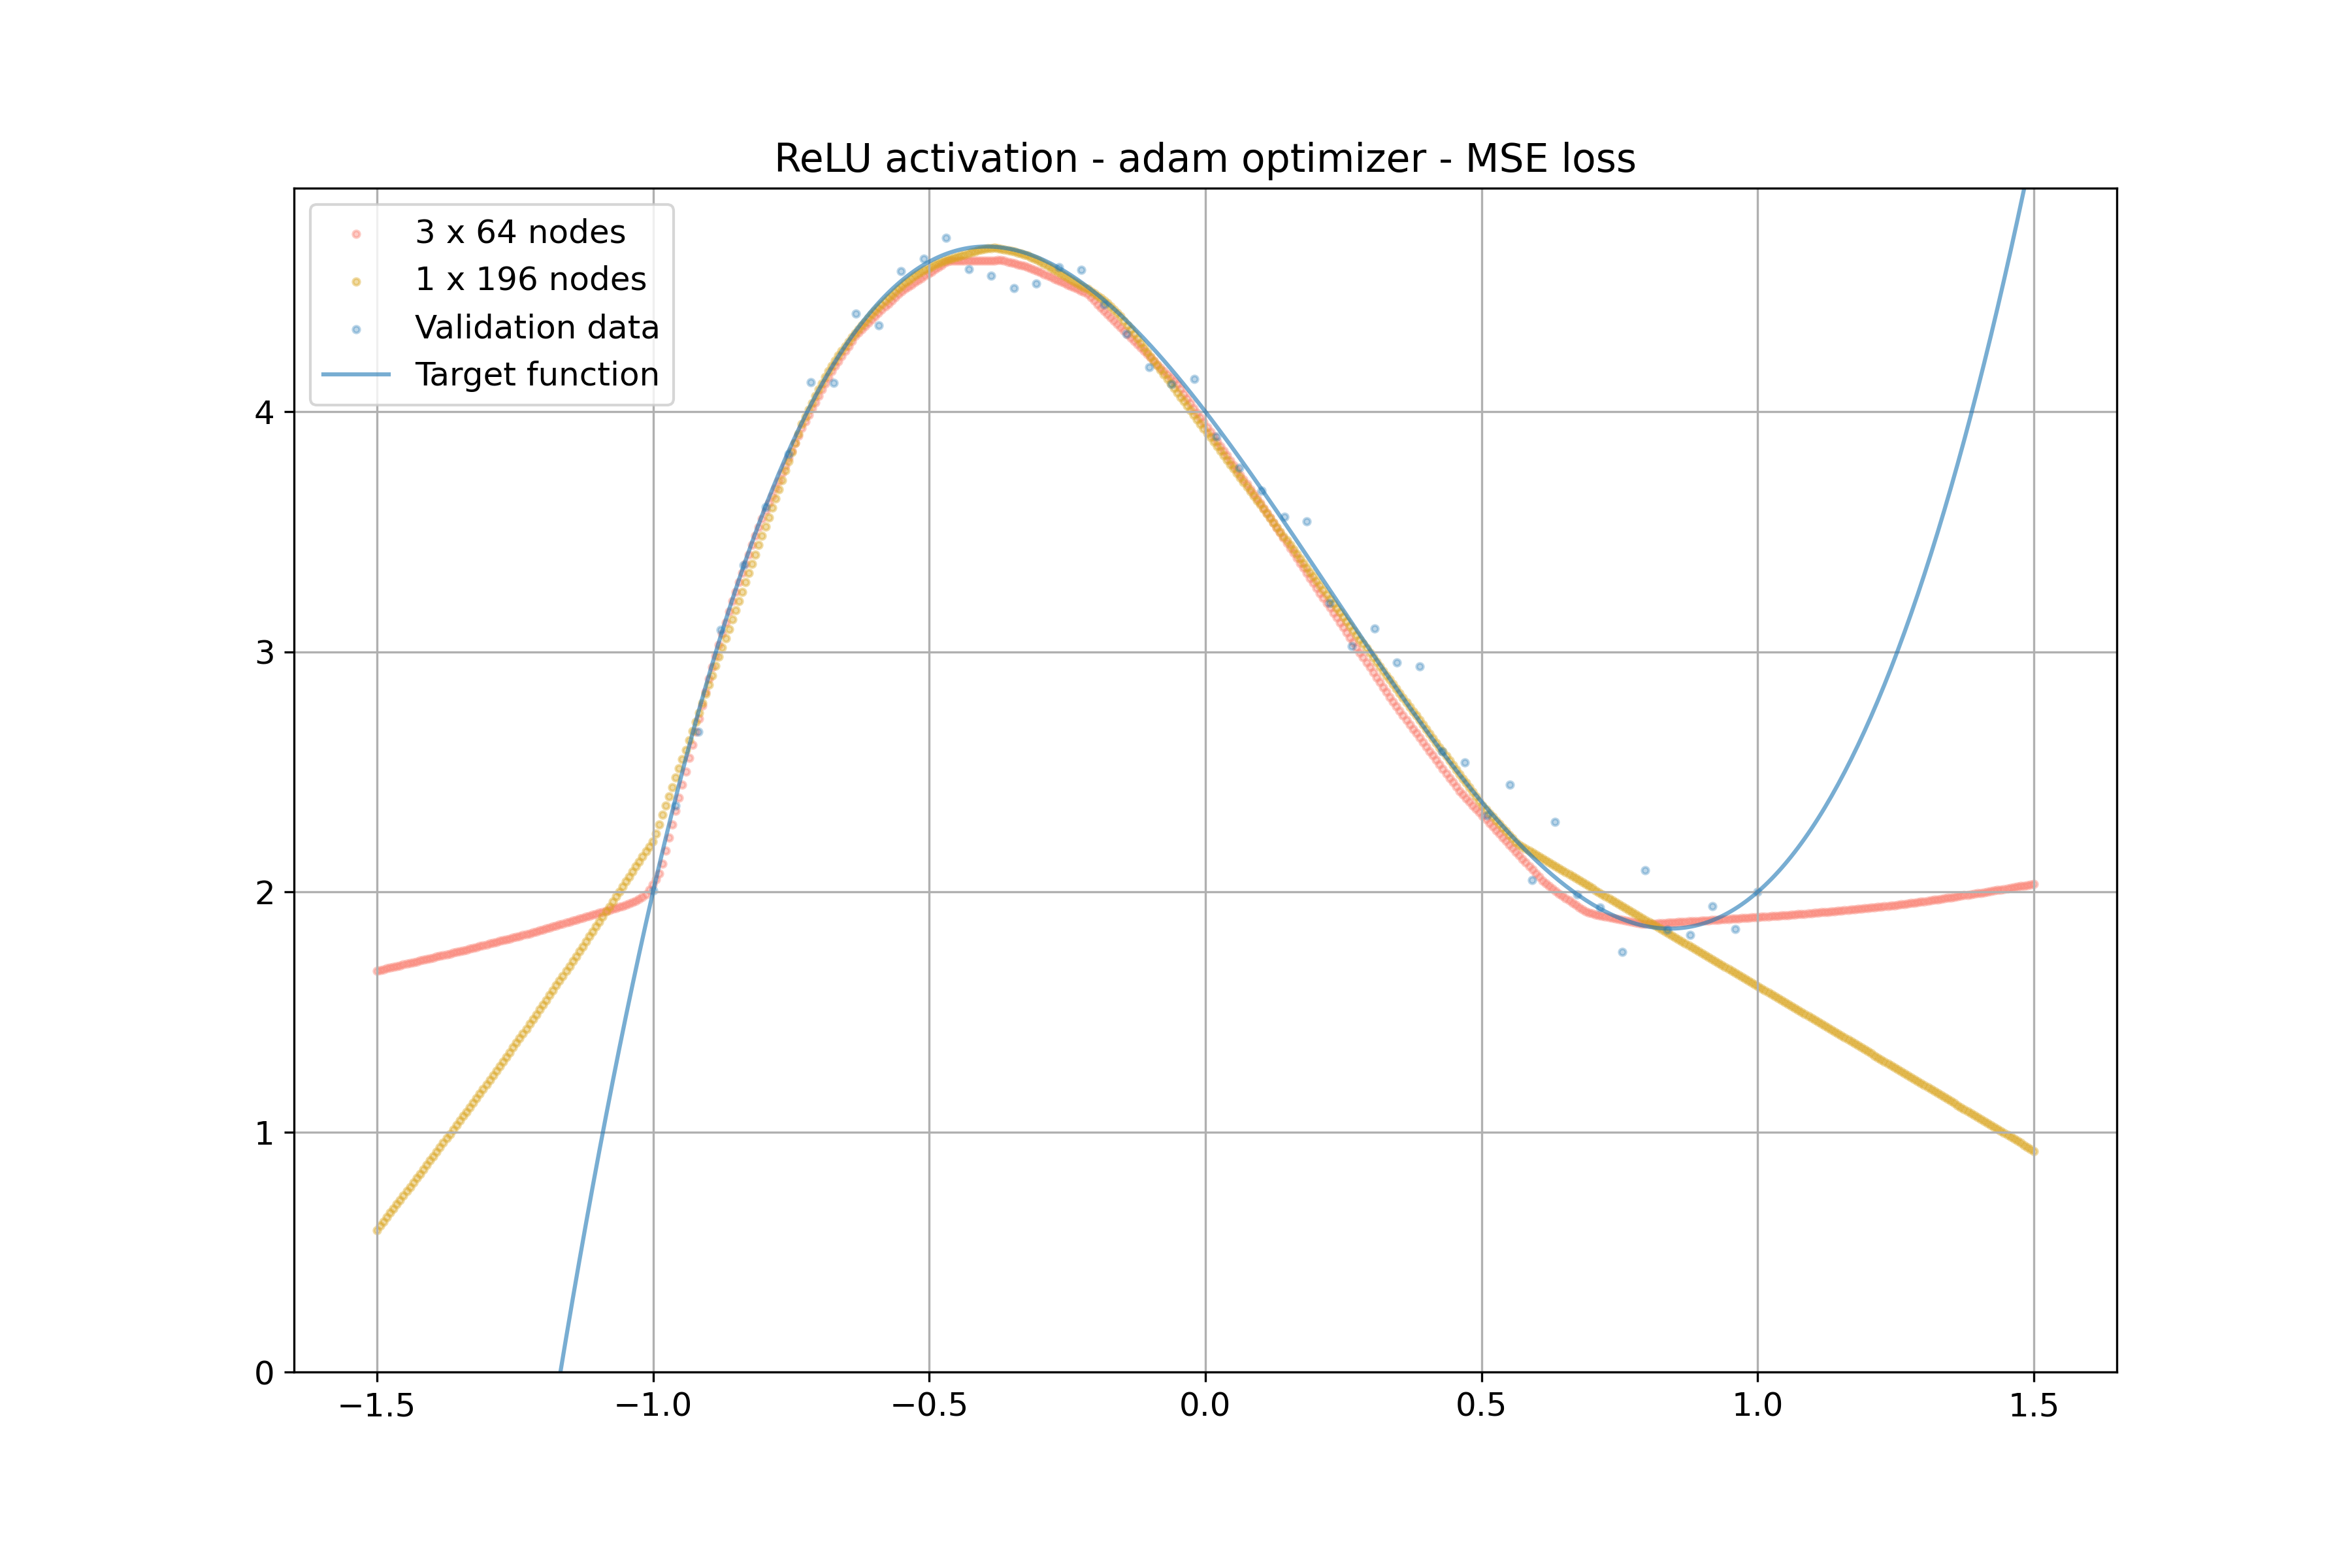

It seems that using a deeper network gives a better result. However, perhaps a fairer comparison would be in terms of the number of parameters of the model. In the case of the single layer network a total of 577 parameters have been optimized, while for the three layer network the number is 8513. Then I will try to extend the single layer to match the number of parameters of the three layer network.

Using a single layer of 2848 nodes, which amounts to optimizing 8545 parameters, I obtained the results that are presented in the following figure.

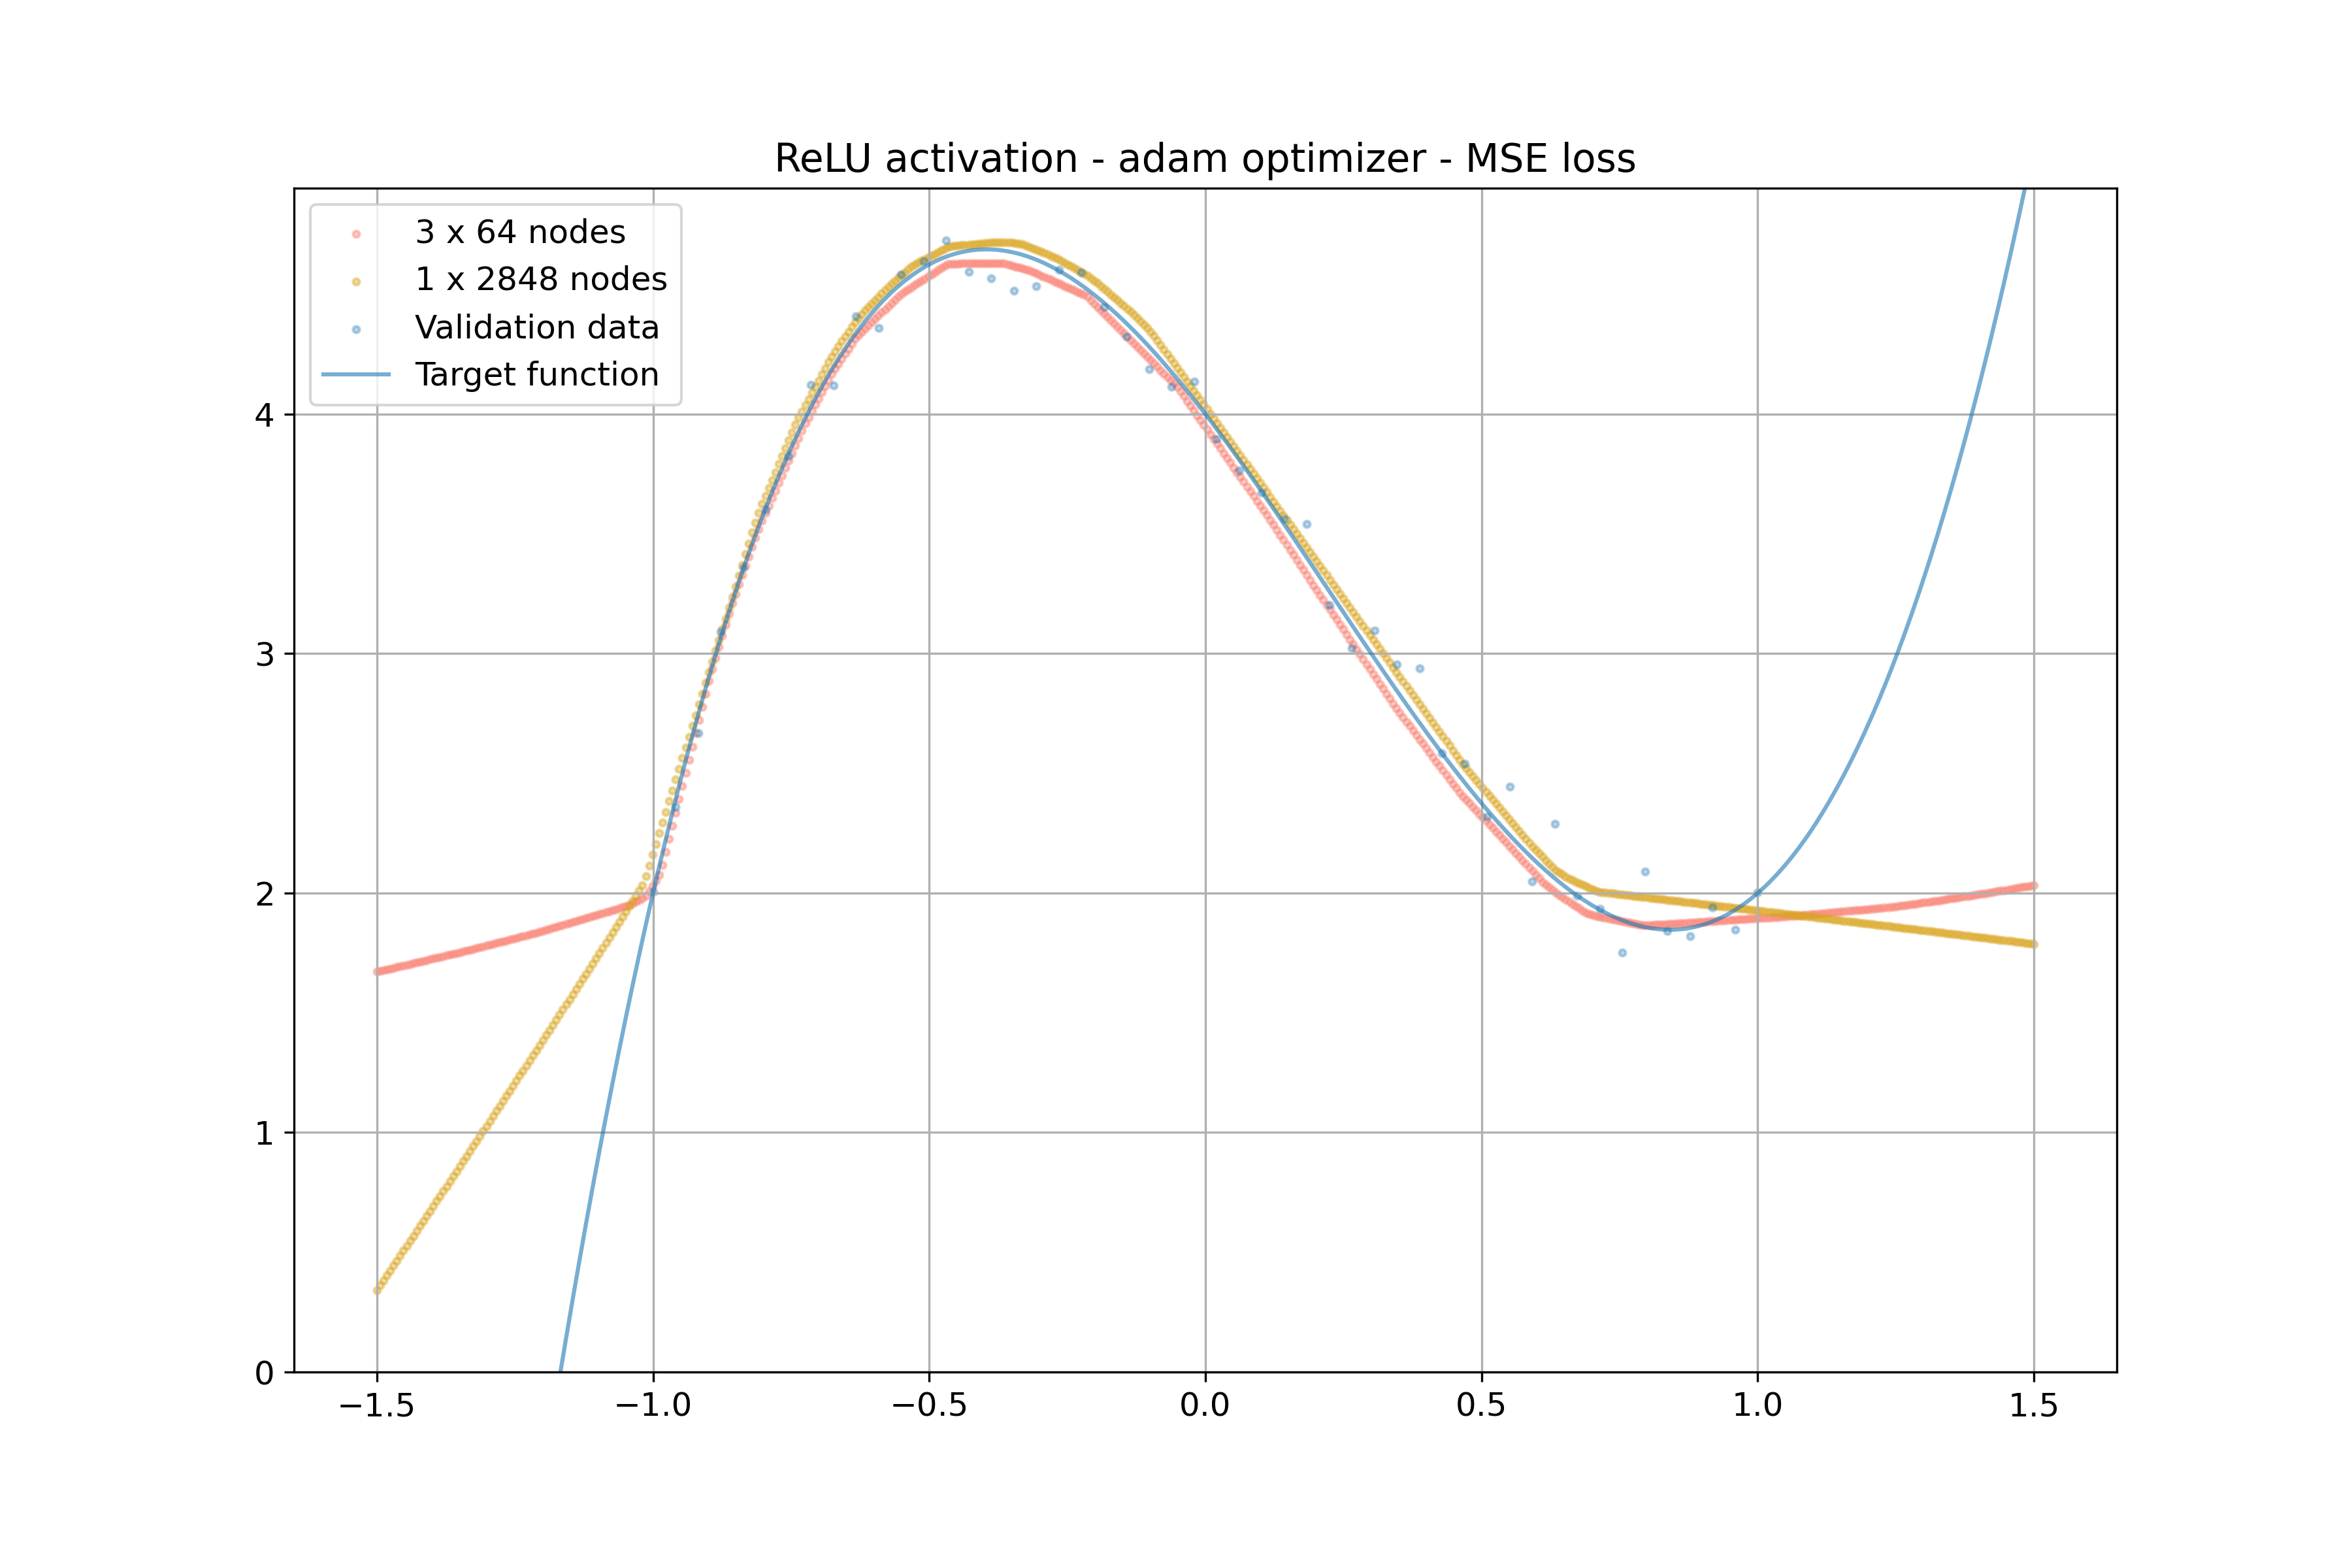

It seems that the prediction for the single layer network improved a little bit, especially the behaviour close to the right edge of the figure.
Nevertheless, it seems the case that the three layer network better understands the target function at the borders.

Outside the training data domain, neither model generalizes well, although I wouldn't expect it, since they do not have any more information than the local data they were supplied.

In the following figures I compared the effect of the choice of the activation function, the loss function and the optimizer on the predictions of the models.

For the three layer models (3LNNs) the only noticeable difference seems to be that the SELU activation function generalizes a little bit better outside the boundaries of the training dataset, and the SGD optimizer performs a little bit better on the left, but doesn't seem to understand the behaviour of the target function on the right side.

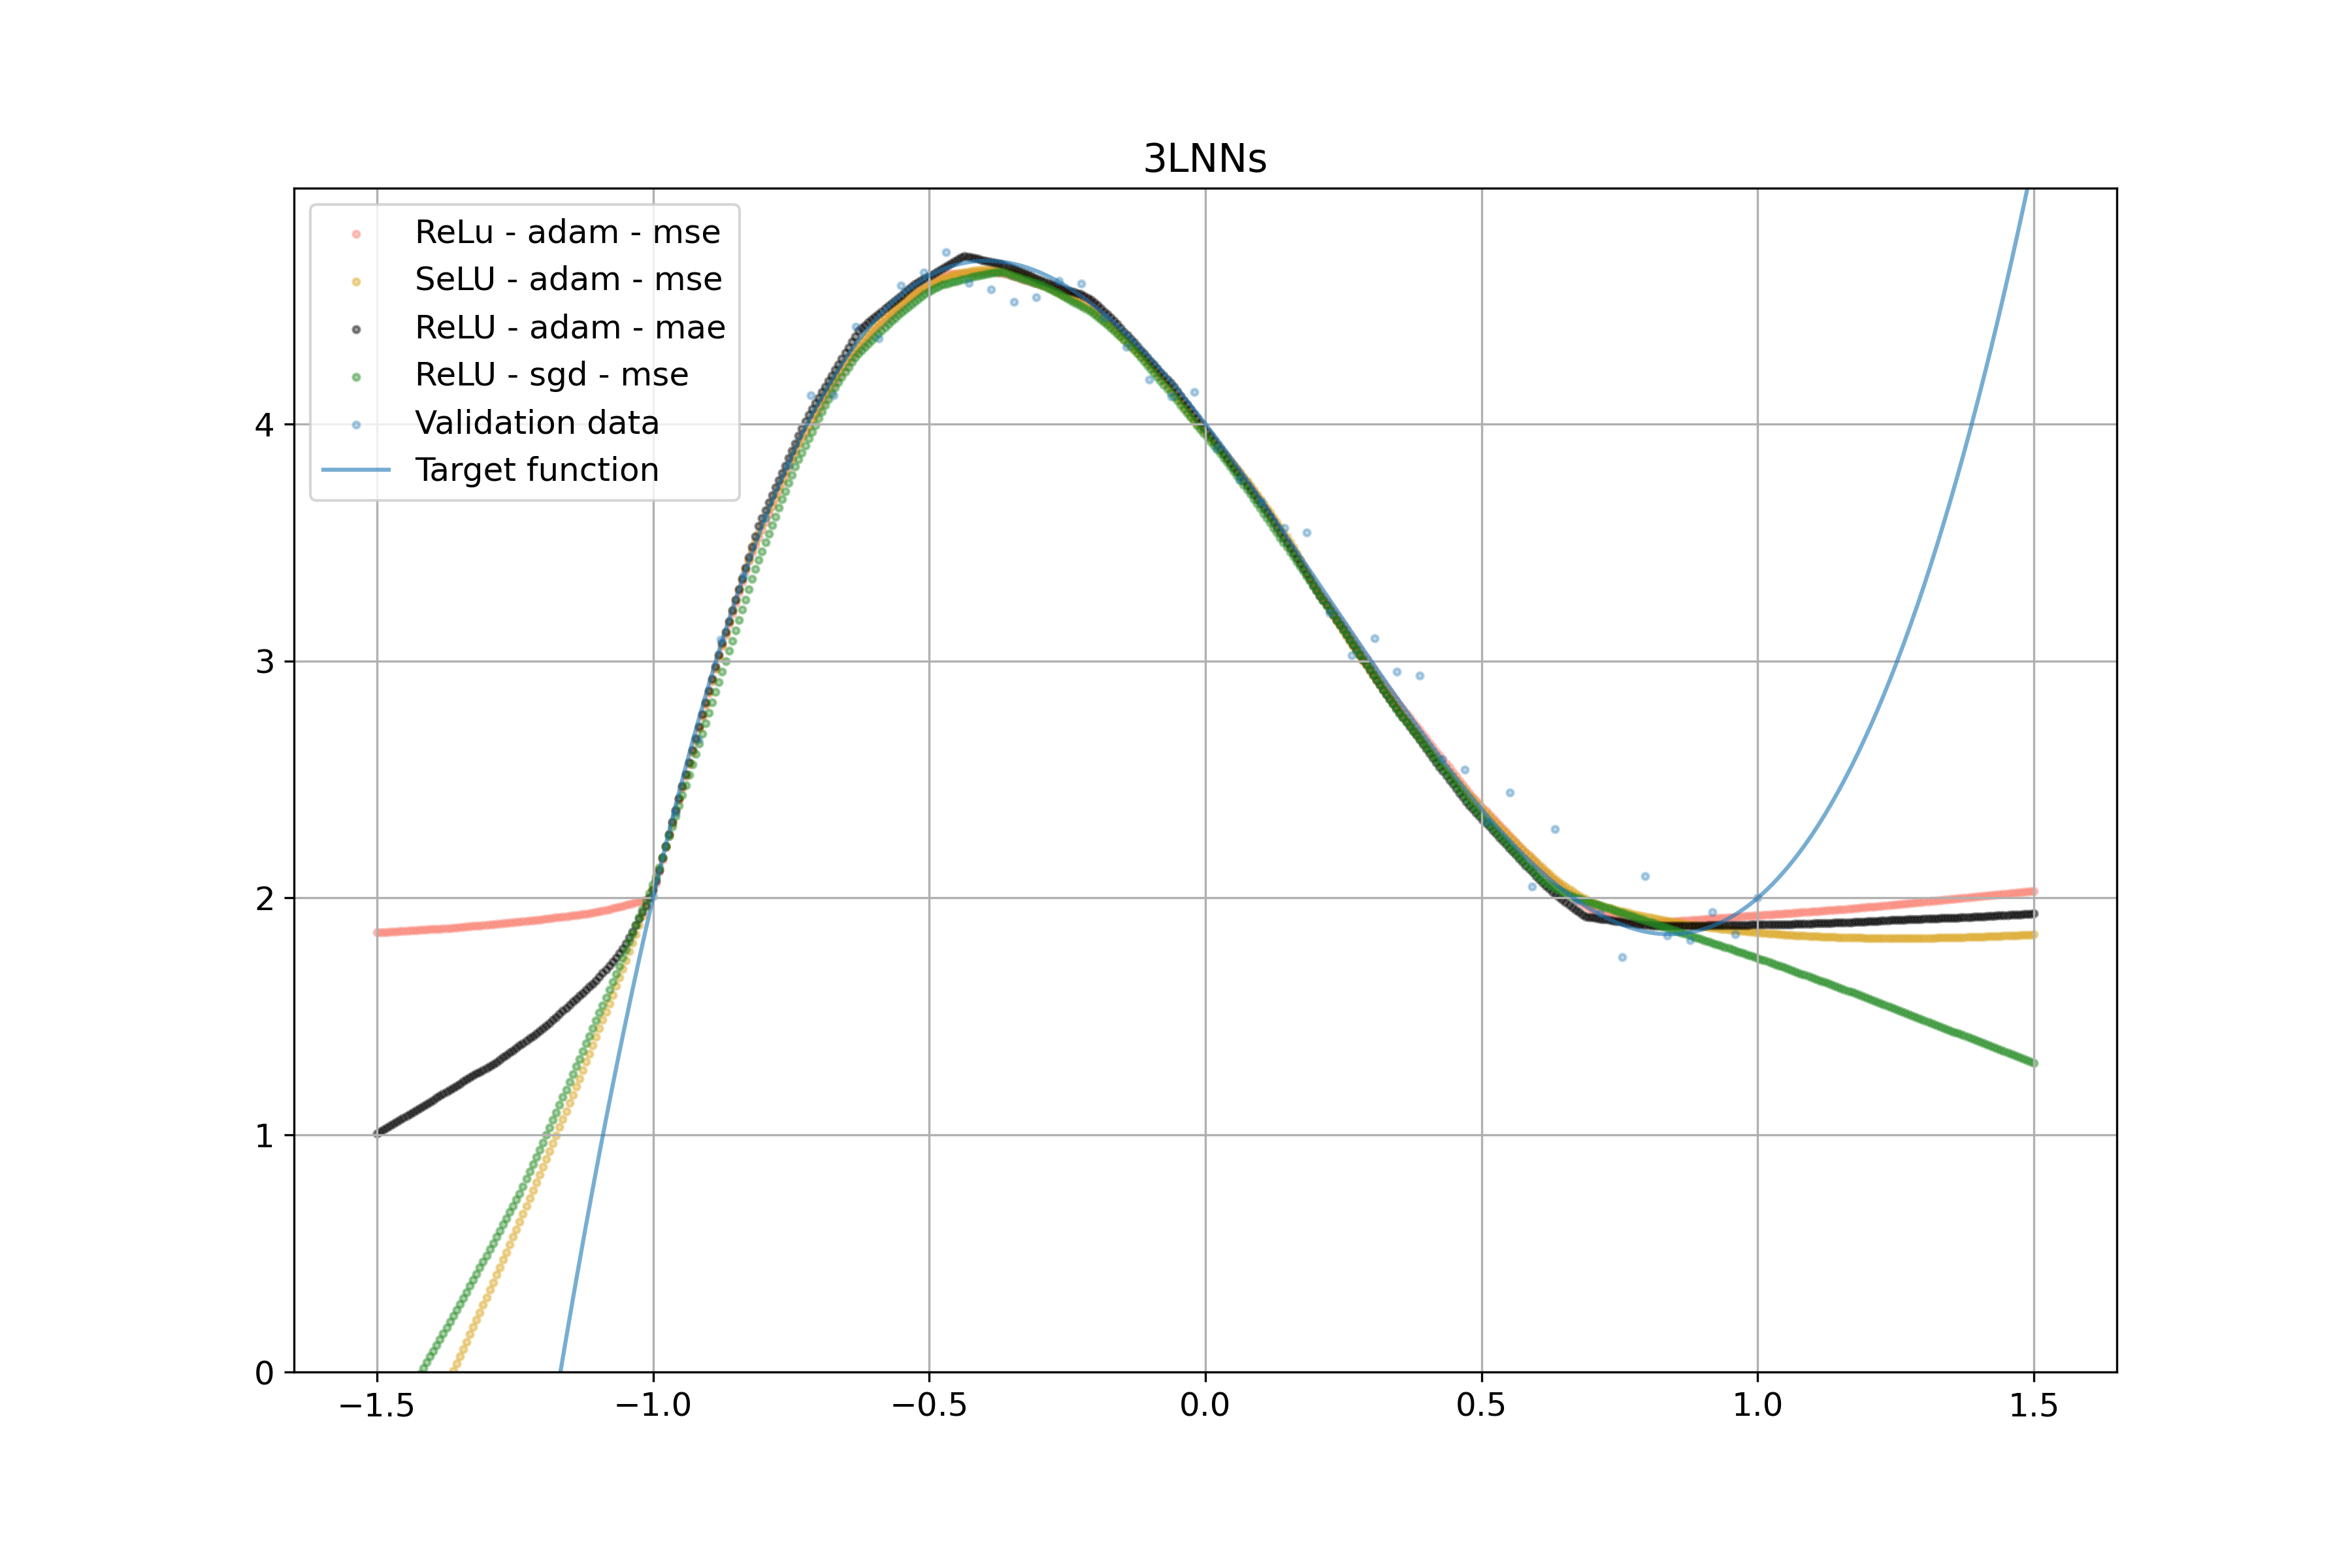

The observed behaviours do not automatically translate to the 1LNNs models. Now for instance the SELU is the better performing model for the right side, but it no longer is for the left side. Indeed it has become the worst, while the best is now the one that employes a MAE loss function. Moreover, the SGD method now gives a quite a crude approximation of the target function.
<img src="./imgs/POLYNOMIAL/1LNNs.png">

### <span style="color:darkblue"> Exercise 11.3 </span>
Here I present the result for the fit of the function $\sin(x^2 + y^2)$ in $[-3/2,3/2]^2$.

I trained a 3LNN with 64 nodes for each layer using 5001 training data points and 100 epochs. I used 501 points for the validation. The loss function (MSE) is shown in the following figure.

<img src="./imgs/3D/loss.png">

The fit is shown in the next two 3d scatterplots. They show good predictions inside the domain of the training dataset, but the model can not extrapolate beyond.

<img src="./imgs/3D/3dplot.png">
<img src="./imgs/3D/front_view.png">


### <span style="color:darkred"> APPENDIX
#### EXPLORATORY WORK

#### Exercise 11.1

In [15]:
N_t1 = 500
N_e1 = 30
sigma1 = 0.3
x1_train = np.random.uniform(-1, 1, N_t1)
y1_train = np.random.normal(m * x1_train + b, sigma1)
x1_valid = np.linspace(-1,1, 100)
y1_valid = np.random.normal(m*x1_valid+b, sigma1)
y1_target = m*x1_valid+b

In [16]:
# compose the NN model
model1 = tf.keras.Sequential()
model1.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model1.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [17]:
# get a summary of our composed model
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history1 = model1.fit(x=x1_train, y=y1_train, 
          batch_size=32, epochs=N_e1,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x1_valid, y1_valid))

Epoch 1/30
16/16 [==============================] - 0s 5ms/step - loss: 4.6369 - mse: 4.6369 - val_loss: 3.7371 - val_mse: 3.7371
Epoch 2/30
16/16 [==============================] - 0s 2ms/step - loss: 3.4441 - mse: 3.4441 - val_loss: 2.8367 - val_mse: 2.8367
Epoch 3/30
16/16 [==============================] - 0s 2ms/step - loss: 2.6239 - mse: 2.6239 - val_loss: 2.2065 - val_mse: 2.2065
Epoch 4/30
16/16 [==============================] - 0s 3ms/step - loss: 2.0387 - mse: 2.0387 - val_loss: 1.7422 - val_mse: 1.7422
Epoch 5/30
16/16 [==============================] - 0s 2ms/step - loss: 1.6068 - mse: 1.6068 - val_loss: 1.3915 - val_mse: 1.3915
Epoch 6/30
16/16 [==============================] - 0s 3ms/step - loss: 1.2801 - mse: 1.2801 - val_loss: 1.1211 - val_mse: 1.1211
Epoch 7/30
16/16 [==============================] - 0s 3ms/step - loss: 1.0284 - mse: 1.0284 - val_loss: 0.9097 - val_mse: 0.9097
Epoch 8/30
16/16 [==============================] - 0s 3ms/step - loss: 0.8322 - mse: 0.83

In [19]:
# return weights and biases
model1.get_weights()

[array([[1.8272746]], dtype=float32), array([1.0094602], dtype=float32)]

In [20]:
# evaluate model
score1 = model1.evaluate(x1_valid, y1_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

4/4 [==============================] - 0s 2ms/step - loss: 0.0882 - mse: 0.0882

Test loss: 0.08818600326776505
Test accuracy: 0.08818600326776505


In [21]:
# evaluate model with the exact curve
score1 = model1.evaluate(x1_valid, y1_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

4/4 [==============================] - 0s 2ms/step - loss: 0.0102 - mse: 0.0102

Test loss: 0.010235092602670193
Test accuracy: 0.010235092602670193


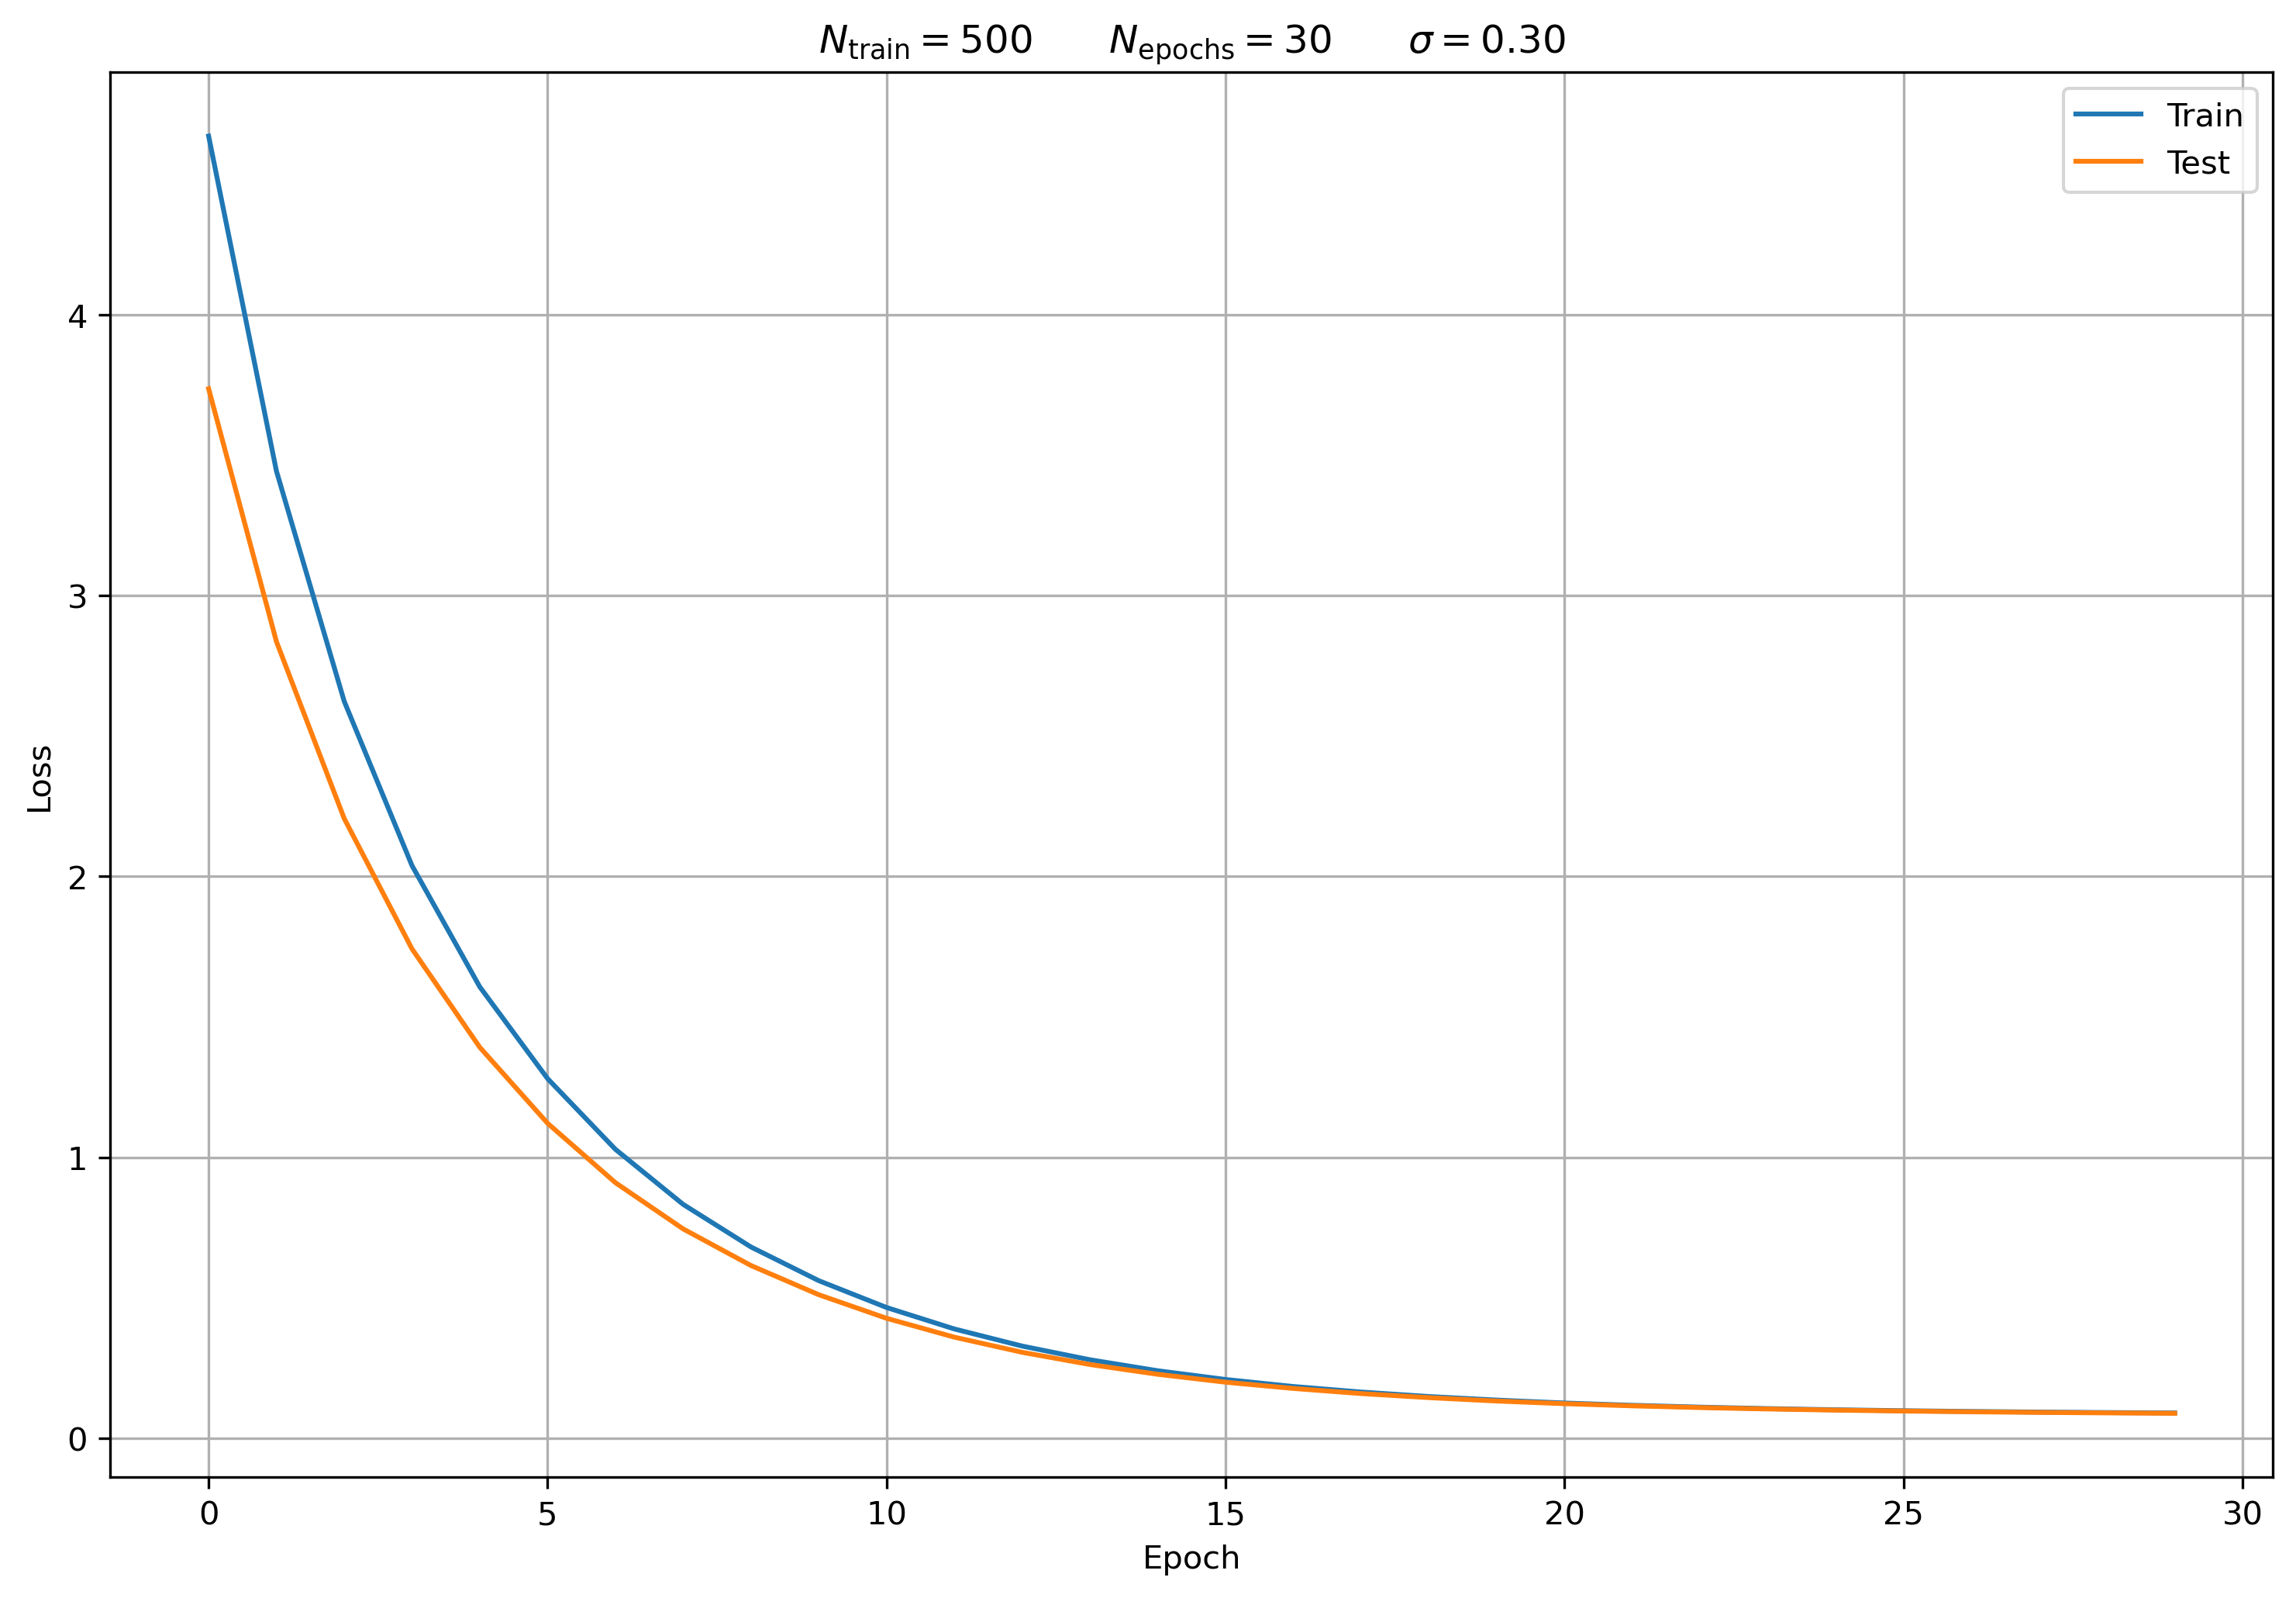

In [22]:
plt.subplots(1,1,figsize=(12,8), dpi=300)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title("$N_\mathrm{train} = 500 \qquad N_\mathrm{epochs} = 30 \qquad \sigma = 0.30 $")
plt.grid(True)
plt.legend(['Train', 'Test'], loc='best')
#plt.savefig("./imgs/LINEAR/Loss_Nt0500Ne0030sigma0030.png")
plt.show()

4/4 [==============================] - 0s 1ms/step


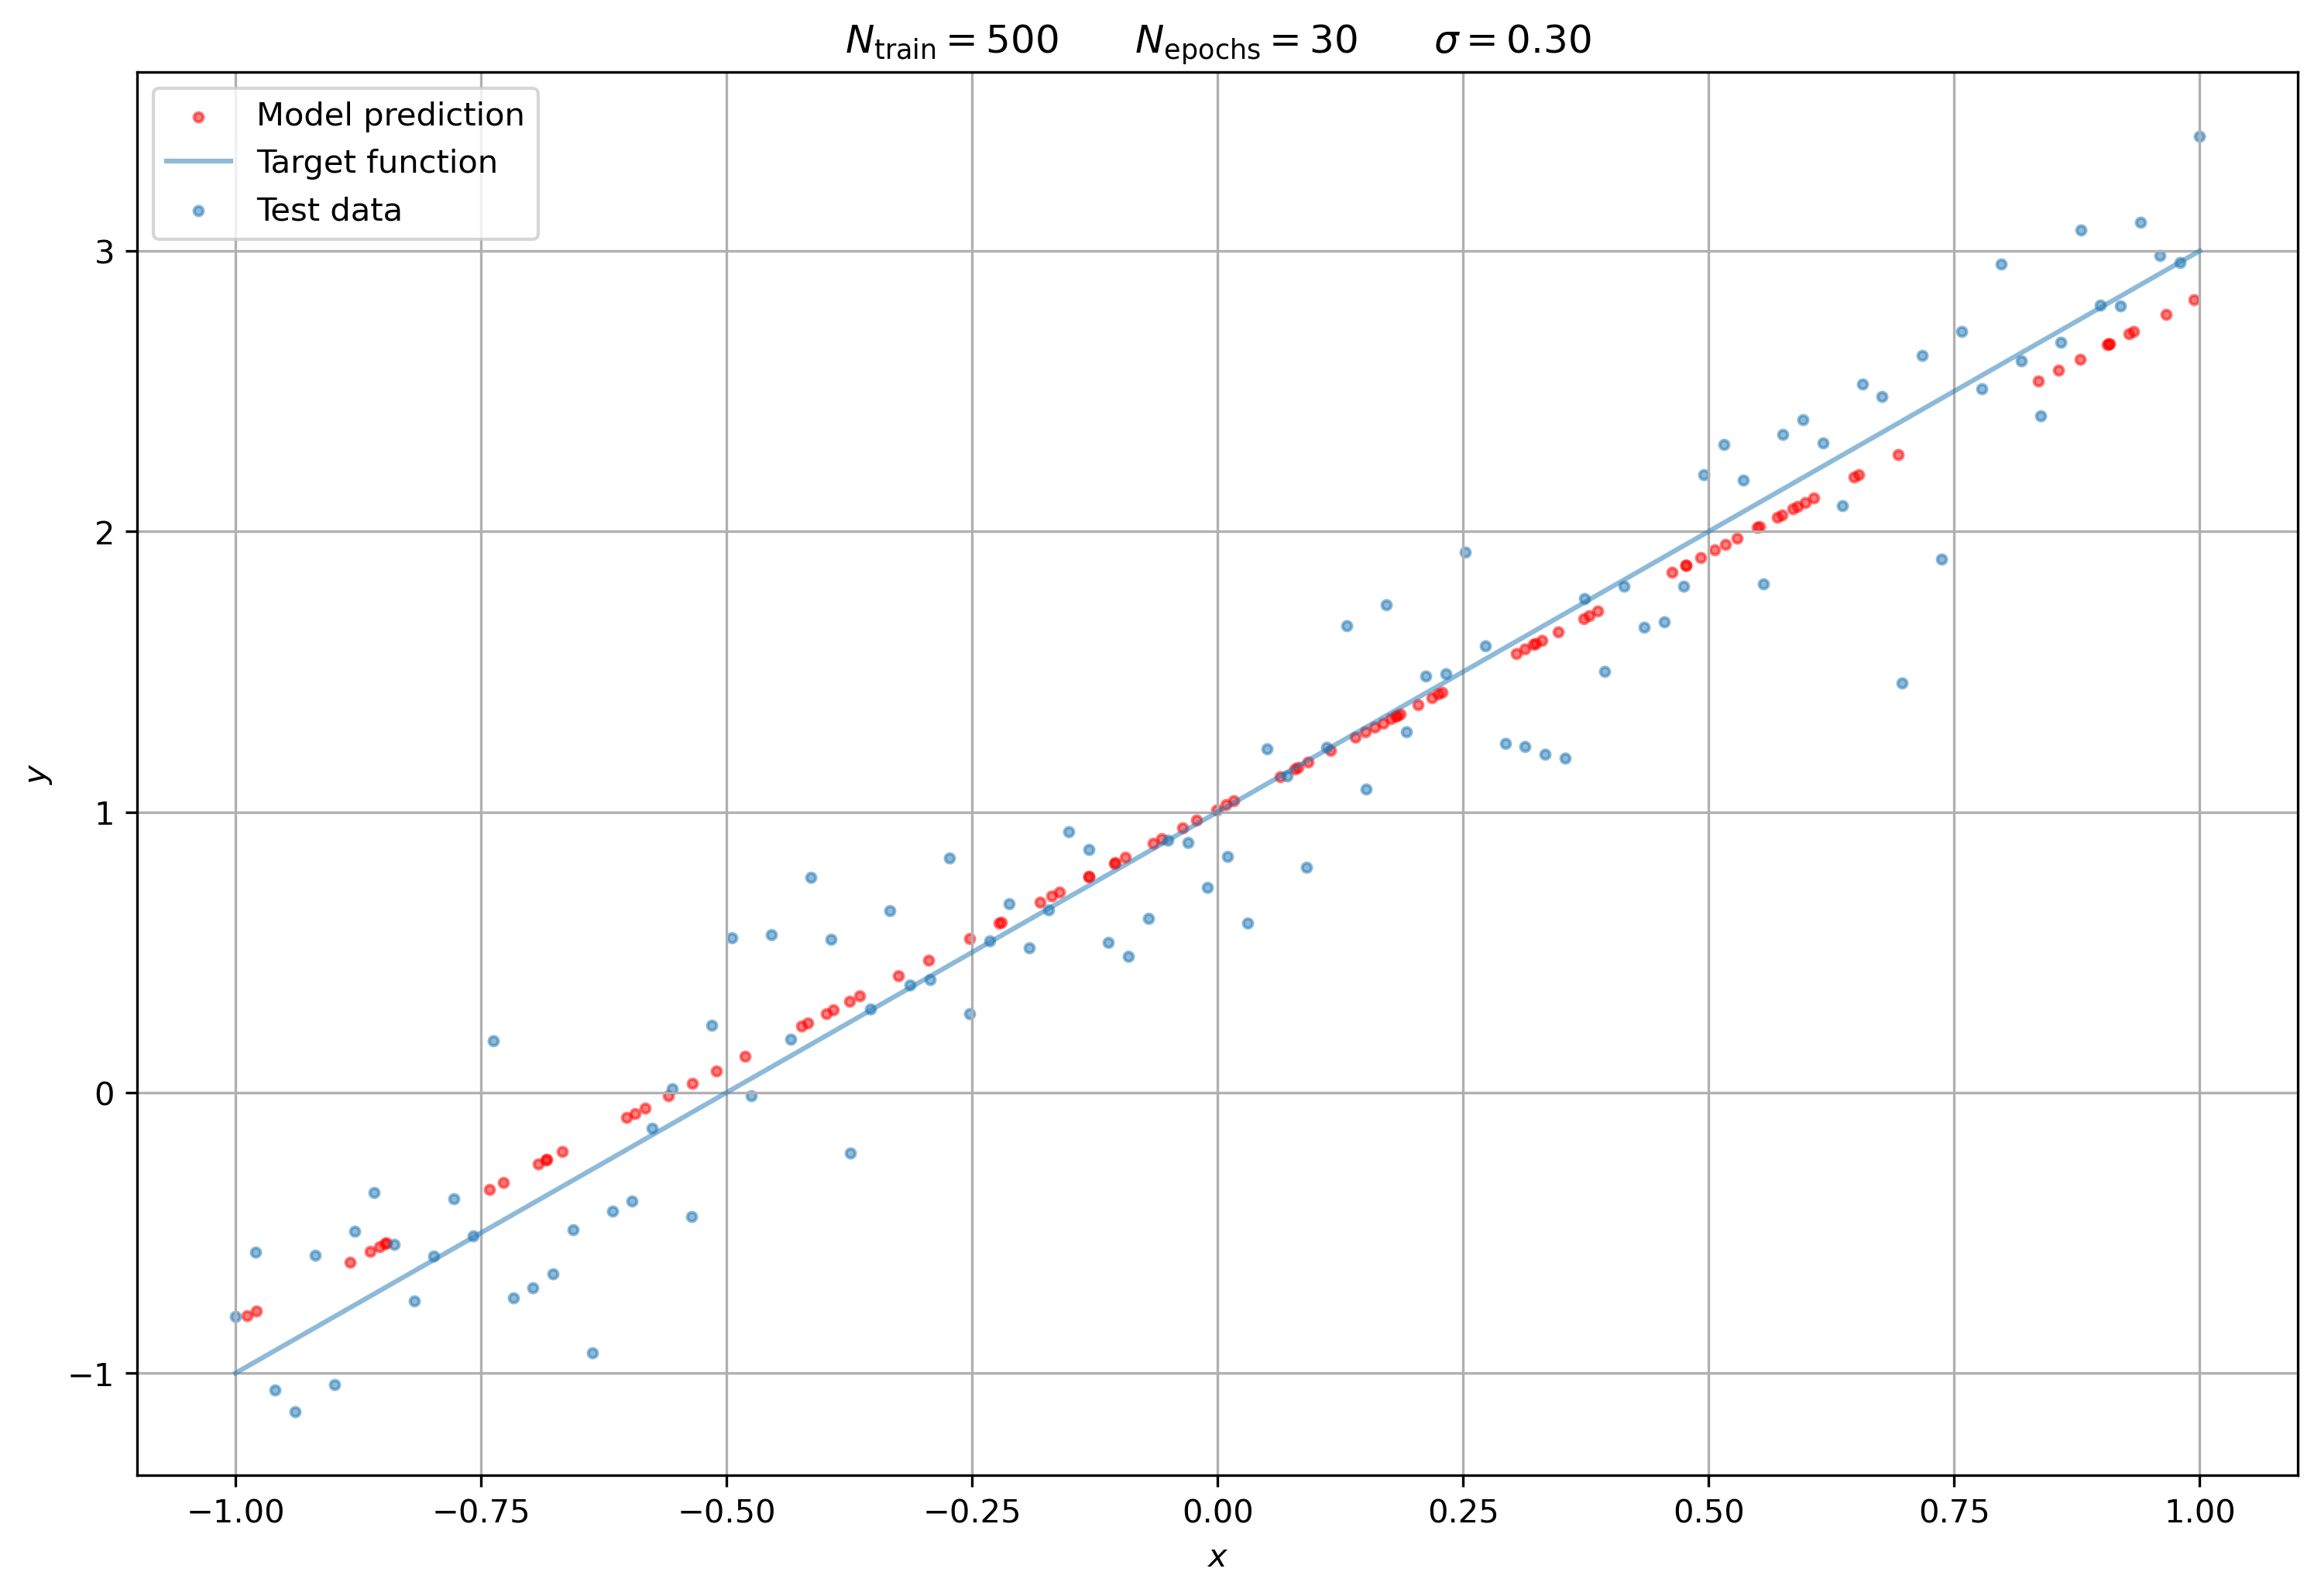

In [23]:
plt.subplots(1,1, figsize=(12,8), dpi=300)
x1_predicted = np.random.uniform(-1, 1, 100)
y1_predicted = model1.predict(x1_predicted)
plt.scatter(x1_predicted, y1_predicted, color='r', s=8, alpha=0.5, label="Model prediction")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.plot(x1_valid, y1_target, alpha=0.5, label="Target function")
plt.scatter(x1_valid, y1_valid, s=8, alpha=0.5, label="Test data")
plt.title("$N_\mathrm{train} = 500 \qquad N_\mathrm{epochs} = 30 \qquad \sigma = 0.30 $")
plt.grid(True)
plt.legend()
#plt.savefig("./imgs/LINEAR/Prediction_Nt0500Ne0030sigma0030.png")
plt.show()

In [24]:
N_t2 = 1000
N_e2 = 100
sigma2 = 0.30
x2_train = np.random.uniform(-1, 1, N_t2)
y2_train = np.random.normal(m * x2_train + b, sigma2)
x2_valid = np.linspace(-1,1, 100)
y2_valid = np.random.normal(m*x2_valid+b, sigma2)
y2_target = m*x2_valid+b
model2 = tf.keras.Sequential()
model2.add(Dense(1, input_shape=(1,)))
model2.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model2.summary()
history2 = model2.fit(x=x2_train, y=y2_train, 
          batch_size=32, epochs=N_e2,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x2_valid, y2_valid))
model2.get_weights()
score2 = model2.evaluate(x2_valid, y2_valid, batch_size=32, verbose=1)
print()
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])
score2 = model2.evaluate(x2_valid, y2_target, batch_size=32, verbose=1)
print()
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
32/32 [==============================] - 0s 5ms/step - loss: 2.9863 - mse: 2.9863 - val_loss: 2.3312 - val_mse: 2.3312
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 1.7829 - mse: 1.7829 - val_loss: 1.4677 - val_mse: 1.4677
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 1.1466 - mse: 1.1466 - val_loss: 0.9712 - val_mse: 0.9712
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7684 - mse: 0.7684 - val_loss: 0.6619 - val_mse: 0.6619
Epoch 5/100
32/32 [=========

Epoch 59/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0921 - mse: 0.0921 - val_loss: 0.0887 - val_mse: 0.0887
Epoch 60/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0920 - mse: 0.0920 - val_loss: 0.0887 - val_mse: 0.0887
Epoch 61/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0920 - mse: 0.0920 - val_loss: 0.0887 - val_mse: 0.0887
Epoch 62/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0920 - mse: 0.0920 - val_loss: 0.0887 - val_mse: 0.0887
Epoch 63/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0920 - mse: 0.0920 - val_loss: 0.0887 - val_mse: 0.0887
Epoch 64/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0921 - mse: 0.0921 - val_loss: 0.0887 - val_mse: 0.0887
Epoch 65/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0921 - mse: 0.0921 - val_loss: 0.0887 - val_mse: 0.0887
Epoch 66/100
32/32 [==============================] - 0s 1ms/step - loss: 0.

In [25]:
model2.get_weights()

[array([[2.011767]], dtype=float32), array([0.9922008], dtype=float32)]

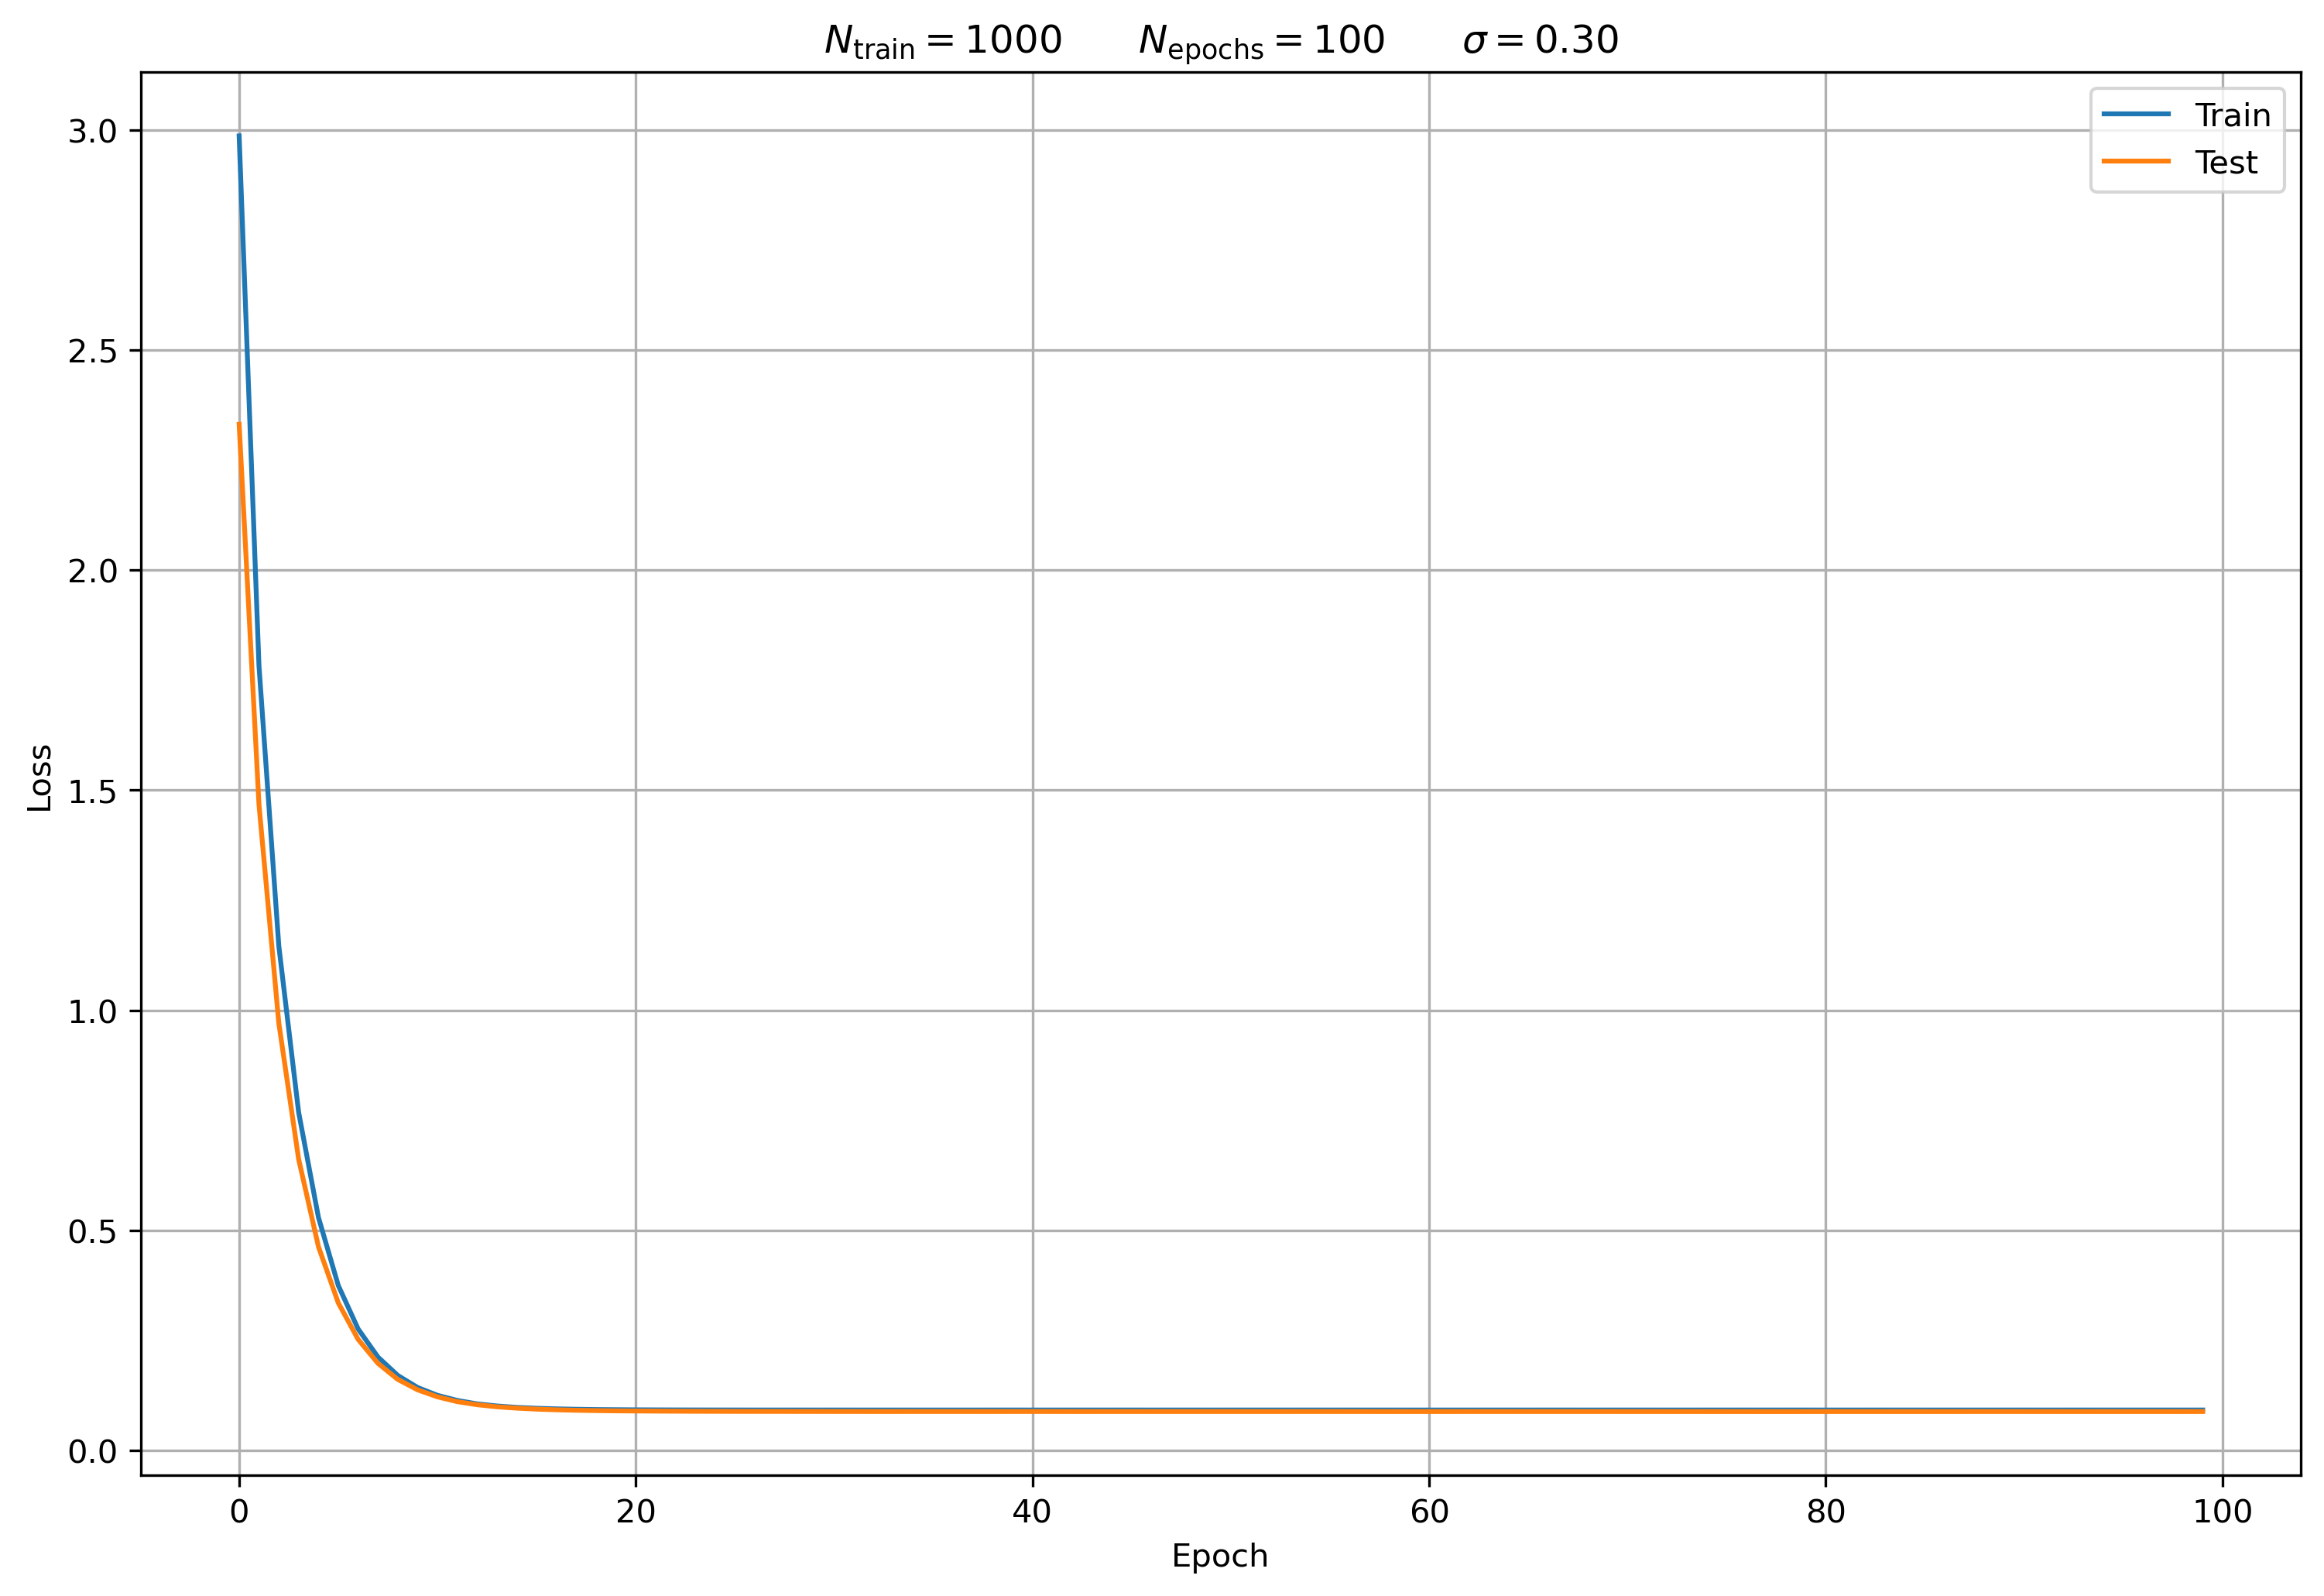

In [26]:
plt.subplots(1,1,figsize=(12,8), dpi=300)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title("$N_\mathrm{train} = 1000 \qquad N_\mathrm{epochs} = 100 \qquad \sigma = 0.30 $")
plt.grid(True)
plt.legend(['Train', 'Test'], loc='best')
#plt.savefig("./imgs/LINEAR/Loss_Nt1000Ne0100sigma0030.png")
plt.show()

4/4 [==============================] - 0s 846us/step


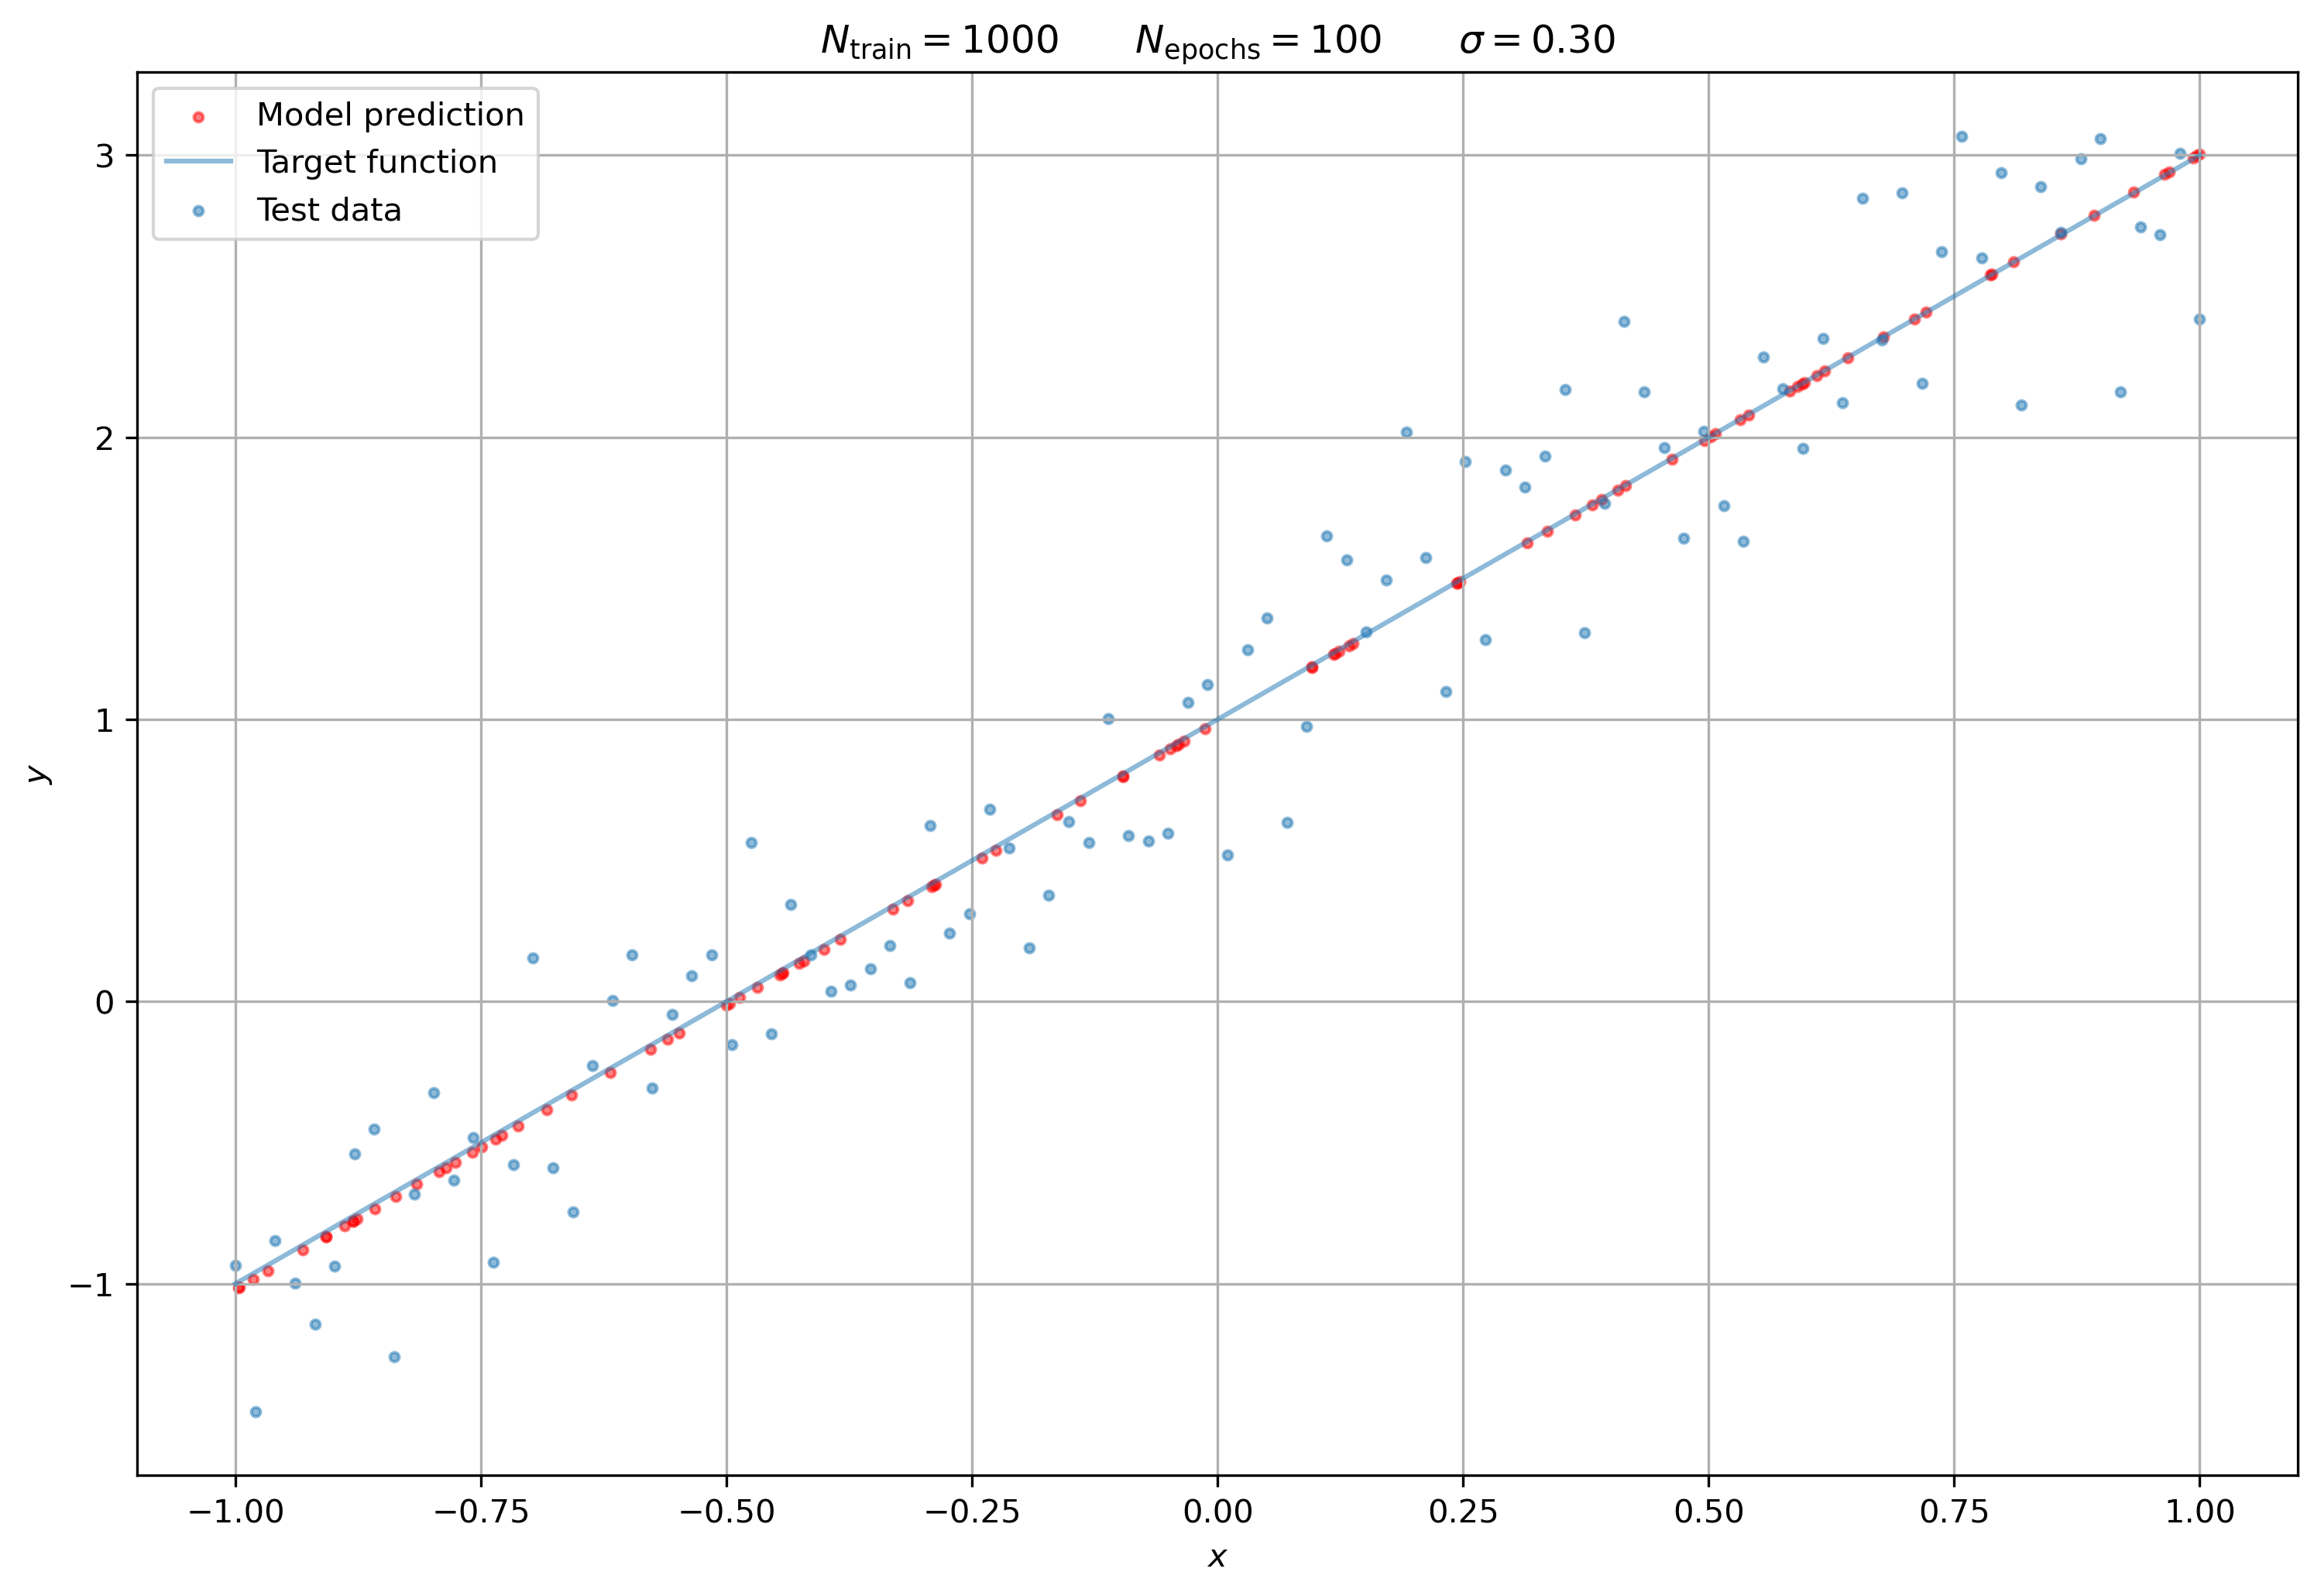

In [27]:
plt.subplots(1,1, figsize=(12,8), dpi=300)
x2_predicted = np.random.uniform(-1, 1, 100)
y2_predicted = model2.predict(x2_predicted)
plt.scatter(x2_predicted, y2_predicted, color='r', s=8, alpha=0.5, label="Model prediction")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.plot(x2_valid, y2_target, alpha=0.5, label="Target function")
plt.scatter(x2_valid, y2_valid, s=8, alpha=0.5, label="Test data")
plt.title("$N_\mathrm{train} = 1000 \qquad N_\mathrm{epochs} = 100 \qquad \sigma = 0.30$")
plt.grid(True)
plt.legend()
#plt.savefig("./imgs/LINEAR/Prediction_Nt1000Ne0100sigma0030.png")
plt.show()

#### Exercise 11.2

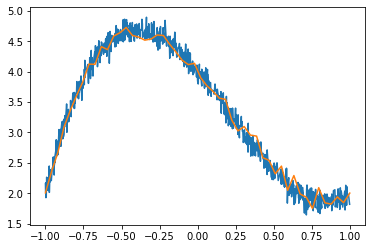

In [28]:
def f(x):
    return 4-3*x-2*x**2+3*x**3
sigma = 0.1
x_train = np.random.uniform(-1,1,1001)
x_train=np.sort(x_train)
y_train = np.random.normal(f(x_train), sigma)
x_valid = np.linspace(-1,1,50)
y_valid = np.random.normal(f(x_valid), sigma)
plt.plot(x_train, y_train)
plt.plot(x_valid, y_valid)

plt.show()

In [29]:
# compose the NN model1
model1 = tf.keras.Sequential()
model1.add(Dense(64, input_shape=(1,), activation="relu"))
model1.add(Dense(64, activation="relu"))
model1.add(Dense(64, activation="relu"))
model1.add(Dense(1, activation="linear"))

# compile the model1 choosing optimizer, loss and metrics objects
model1.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [30]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                128       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 8513 (33.25 KB)
Trainable params: 8513 (33.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
history = model1.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=100,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/100
32/32 [==============================] - 0s 6ms/step - loss: 9.9935 - mse: 9.9935 - val_loss: 6.3207 - val_mse: 6.3207
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 3.3112 - mse: 3.3112 - val_loss: 1.5335 - val_mse: 1.5335
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1741 - mse: 1.1741 - val_loss: 0.8572 - val_mse: 0.8572
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6305 - mse: 0.6305 - val_loss: 0.4438 - val_mse: 0.4438
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3175 - mse: 0.3175 - val_loss: 0.2252 - val_mse: 0.2252
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.1741 - mse: 0.1741 - val_loss: 0.1365 - val_mse: 0.1365
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1112 - mse: 0.1112 - val_loss: 0.1008 - val_mse: 0.1008
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0759 - m

32/32 [==============================] - 0s 2ms/step - loss: 0.0117 - mse: 0.0117 - val_loss: 0.0095 - val_mse: 0.0095
Epoch 64/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 65/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0121 - mse: 0.0121 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 66/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0114 - mse: 0.0114 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 67/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0137 - val_mse: 0.0137
Epoch 68/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0132 - mse: 0.0132 - val_loss: 0.0115 - val_mse: 0.0115
Epoch 69/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 70/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0133 - mse: 0

In [32]:
model1.get_weights()

[array([[ 0.2828991 , -0.1233862 , -0.17816201, -0.10167547,  0.09537276,
         -0.19153151,  0.09700109,  0.11864185, -0.29540837,  0.16037673,
         -0.19025719, -0.00154029,  0.22124286,  0.17796   , -0.2578008 ,
          0.12068288,  0.1294487 , -0.17025787, -0.00508226,  0.18075867,
          0.21436298, -0.17634875,  0.15019916,  0.36068702,  0.190167  ,
         -0.08303316, -0.18213432, -0.00069089, -0.00912609, -0.28904274,
         -0.19752763, -0.09218843,  0.28773424,  0.33287704,  0.24642205,
          0.24712265, -0.06180638,  0.1519348 ,  0.0186187 , -0.0050945 ,
          0.14309558, -0.11156897,  0.28126684, -0.08294411,  0.11728217,
          0.00565684, -0.3553487 ,  0.2169268 , -0.22965048,  0.2978819 ,
          0.19188961, -0.36023715,  0.01030394,  0.2925323 , -0.07400269,
          0.1321966 ,  0.13165034,  0.13271882, -0.06025854,  0.13914694,
         -0.14029428, -0.21628761,  0.1998183 , -0.0100268 ]],
       dtype=float32),
 array([ 0.06066705,  0.09

In [33]:
# evaluate model
score = model1.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 2ms/step - loss: 0.0109 - mse: 0.0109

Test loss: 0.010878131724894047
Test accuracy: 0.010878131724894047


In [34]:
# evaluate model with the exact curve
score = model1.evaluate(x_valid, f(x_valid), batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 3ms/step - loss: 0.0011 - mse: 0.0011    

Test loss: 0.0011397721245884895
Test accuracy: 0.0011397721245884895


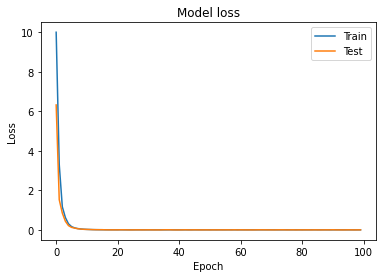

In [35]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

In [36]:
model2 = tf.keras.Sequential()
model2.add(Dense(192, input_shape=(1,), activation="relu"))
model2.add(Dense(1, activation="linear"))
model2.compile(optimizer='adam', loss='mse', metrics=['mse'])
history2 = model2.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=100,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))
model2.get_weights()
# evaluate model
score2 = model2.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])
# evaluate model with the exact curve
score2 = model2.evaluate(x_valid, f(x_valid), batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

Epoch 1/100
32/32 [==============================] - 0s 3ms/step - loss: 10.5727 - mse: 10.5727 - val_loss: 8.8035 - val_mse: 8.8035
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 7.1954 - mse: 7.1954 - val_loss: 5.2635 - val_mse: 5.2635
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 3.6657 - mse: 3.6657 - val_loss: 2.0659 - val_mse: 2.0659
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 1.2934 - mse: 1.2934 - val_loss: 0.7725 - val_mse: 0.7725
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7030 - mse: 0.7030 - val_loss: 0.6551 - val_mse: 0.6551
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6406 - mse: 0.6406 - val_loss: 0.6115 - val_mse: 0.6115
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6061 - mse: 0.6061 - val_loss: 0.5759 - val_mse: 0.5759
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5713 -

32/32 [==============================] - 0s 1ms/step - loss: 0.0281 - mse: 0.0281 - val_loss: 0.0264 - val_mse: 0.0264
Epoch 64/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0277 - mse: 0.0277 - val_loss: 0.0276 - val_mse: 0.0276
Epoch 65/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0280 - mse: 0.0280 - val_loss: 0.0257 - val_mse: 0.0257
Epoch 66/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0272 - mse: 0.0272 - val_loss: 0.0262 - val_mse: 0.0262
Epoch 67/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0266 - mse: 0.0266 - val_loss: 0.0247 - val_mse: 0.0247
Epoch 68/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0270 - mse: 0.0270 - val_loss: 0.0240 - val_mse: 0.0240
Epoch 69/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0265 - mse: 0.0265 - val_loss: 0.0247 - val_mse: 0.0247
Epoch 70/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0263 - mse: 0

In [37]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 192)               384       
                                                                 
 dense_8 (Dense)             (None, 1)                 193       
                                                                 
Total params: 577 (2.25 KB)
Trainable params: 577 (2.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


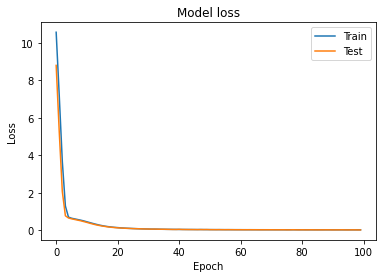

In [38]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

16/16 [==============================] - 0s 1ms/step


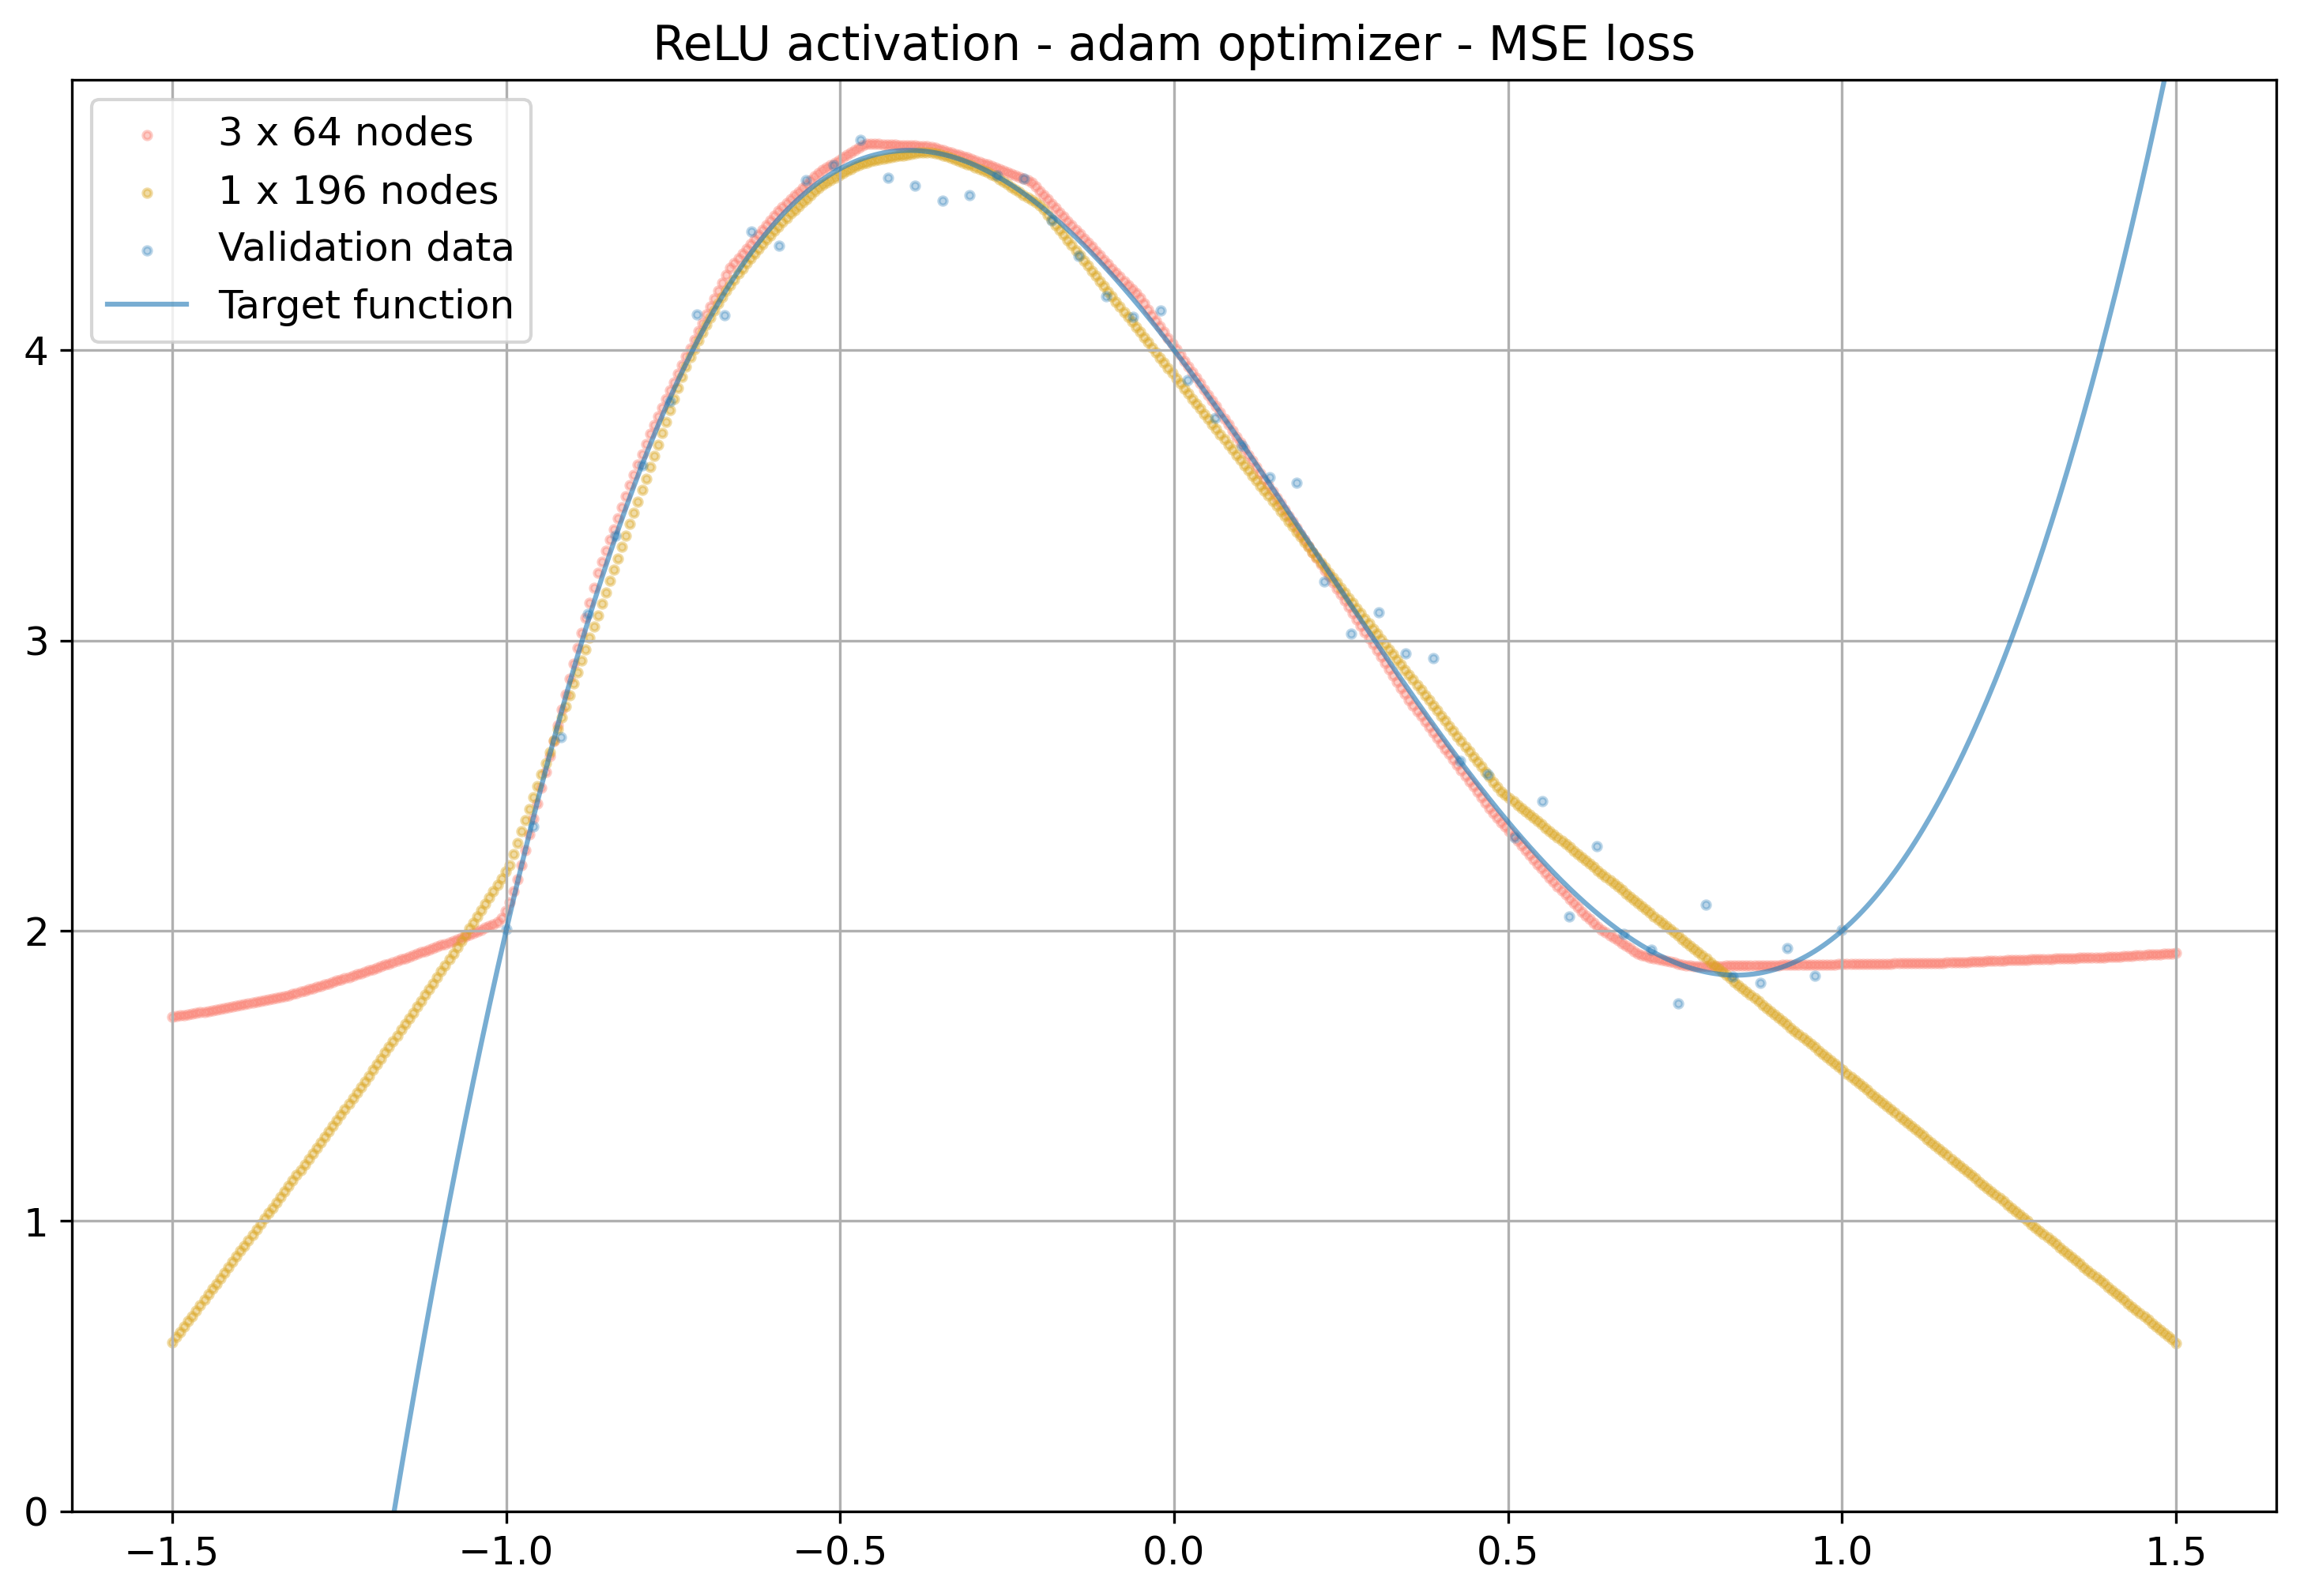

In [39]:
plt.rcParams.update({'font.size': 12})

x_predicted = np.linspace(-1.5, 1.5, 500)
y1_predicted = model1.predict(x_predicted)
y2_predicted = model2.predict(x_predicted)
plt.subplots(1,1,figsize=(12,8), dpi=300)
plt.scatter(x_predicted, y1_predicted, color='salmon', s=6, alpha=0.4, label="3 x 64 nodes")
plt.scatter(x_predicted, y2_predicted, color='goldenrod', s=6, alpha=0.4, label="1 x 196 nodes")
plt.scatter(x_valid, y_valid, alpha=0.3, s=6, label="Validation data")
plt.ylim(0,)
plt.plot(x_predicted, f(x_predicted), alpha=0.6, label="Target function")
plt.title("ReLU activation - adam optimizer - MSE loss")
plt.grid(True)
plt.legend()
#plt.savefig("./imgs/POLYNOMIAL/1Lvs3L_eqNODES.png")
plt.show()

In [40]:
model3 = tf.keras.Sequential()
model3.add(Dense(2848, input_shape=(1,), activation="relu"))
model3.add(Dense(1, activation="linear"))
model3.compile(optimizer='adam', loss='mse', metrics=['mse'])
history3 = model3.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=100,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))
model3.get_weights()
# evaluate model
score3 = model3.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score3[0])
print('Test accuracy:', score3[1])
# evaluate model with the exact curve
score3 = model3.evaluate(x_valid, f(x_valid), batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score3[0])
print('Test accuracy:', score3[1])

Epoch 1/100
32/32 [==============================] - 1s 10ms/step - loss: 6.3932 - mse: 6.3932 - val_loss: 1.1727 - val_mse: 1.1727
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8565 - mse: 0.8565 - val_loss: 0.6486 - val_mse: 0.6486
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6369 - mse: 0.6369 - val_loss: 0.6090 - val_mse: 0.6090
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6184 - mse: 0.6184 - val_loss: 0.6055 - val_mse: 0.6055
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6055 - mse: 0.6055 - val_loss: 0.5788 - val_mse: 0.5788
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5717 - mse: 0.5717 - val_loss: 0.5284 - val_mse: 0.5284
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5024 - mse: 0.5024 - val_loss: 0.4533 - val_mse: 0.4533
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4162 - 

32/32 [==============================] - 0s 1ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0138 - val_mse: 0.0138
Epoch 64/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 65/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 66/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0124 - val_mse: 0.0124
Epoch 67/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0123 - val_mse: 0.0123
Epoch 68/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0131 - val_mse: 0.0131
Epoch 69/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 70/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0133 - mse: 0

In [41]:
model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 2848)              5696      
                                                                 
 dense_10 (Dense)            (None, 1)                 2849      
                                                                 
Total params: 8545 (33.38 KB)
Trainable params: 8545 (33.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


16/16 [==============================] - 0s 1ms/step


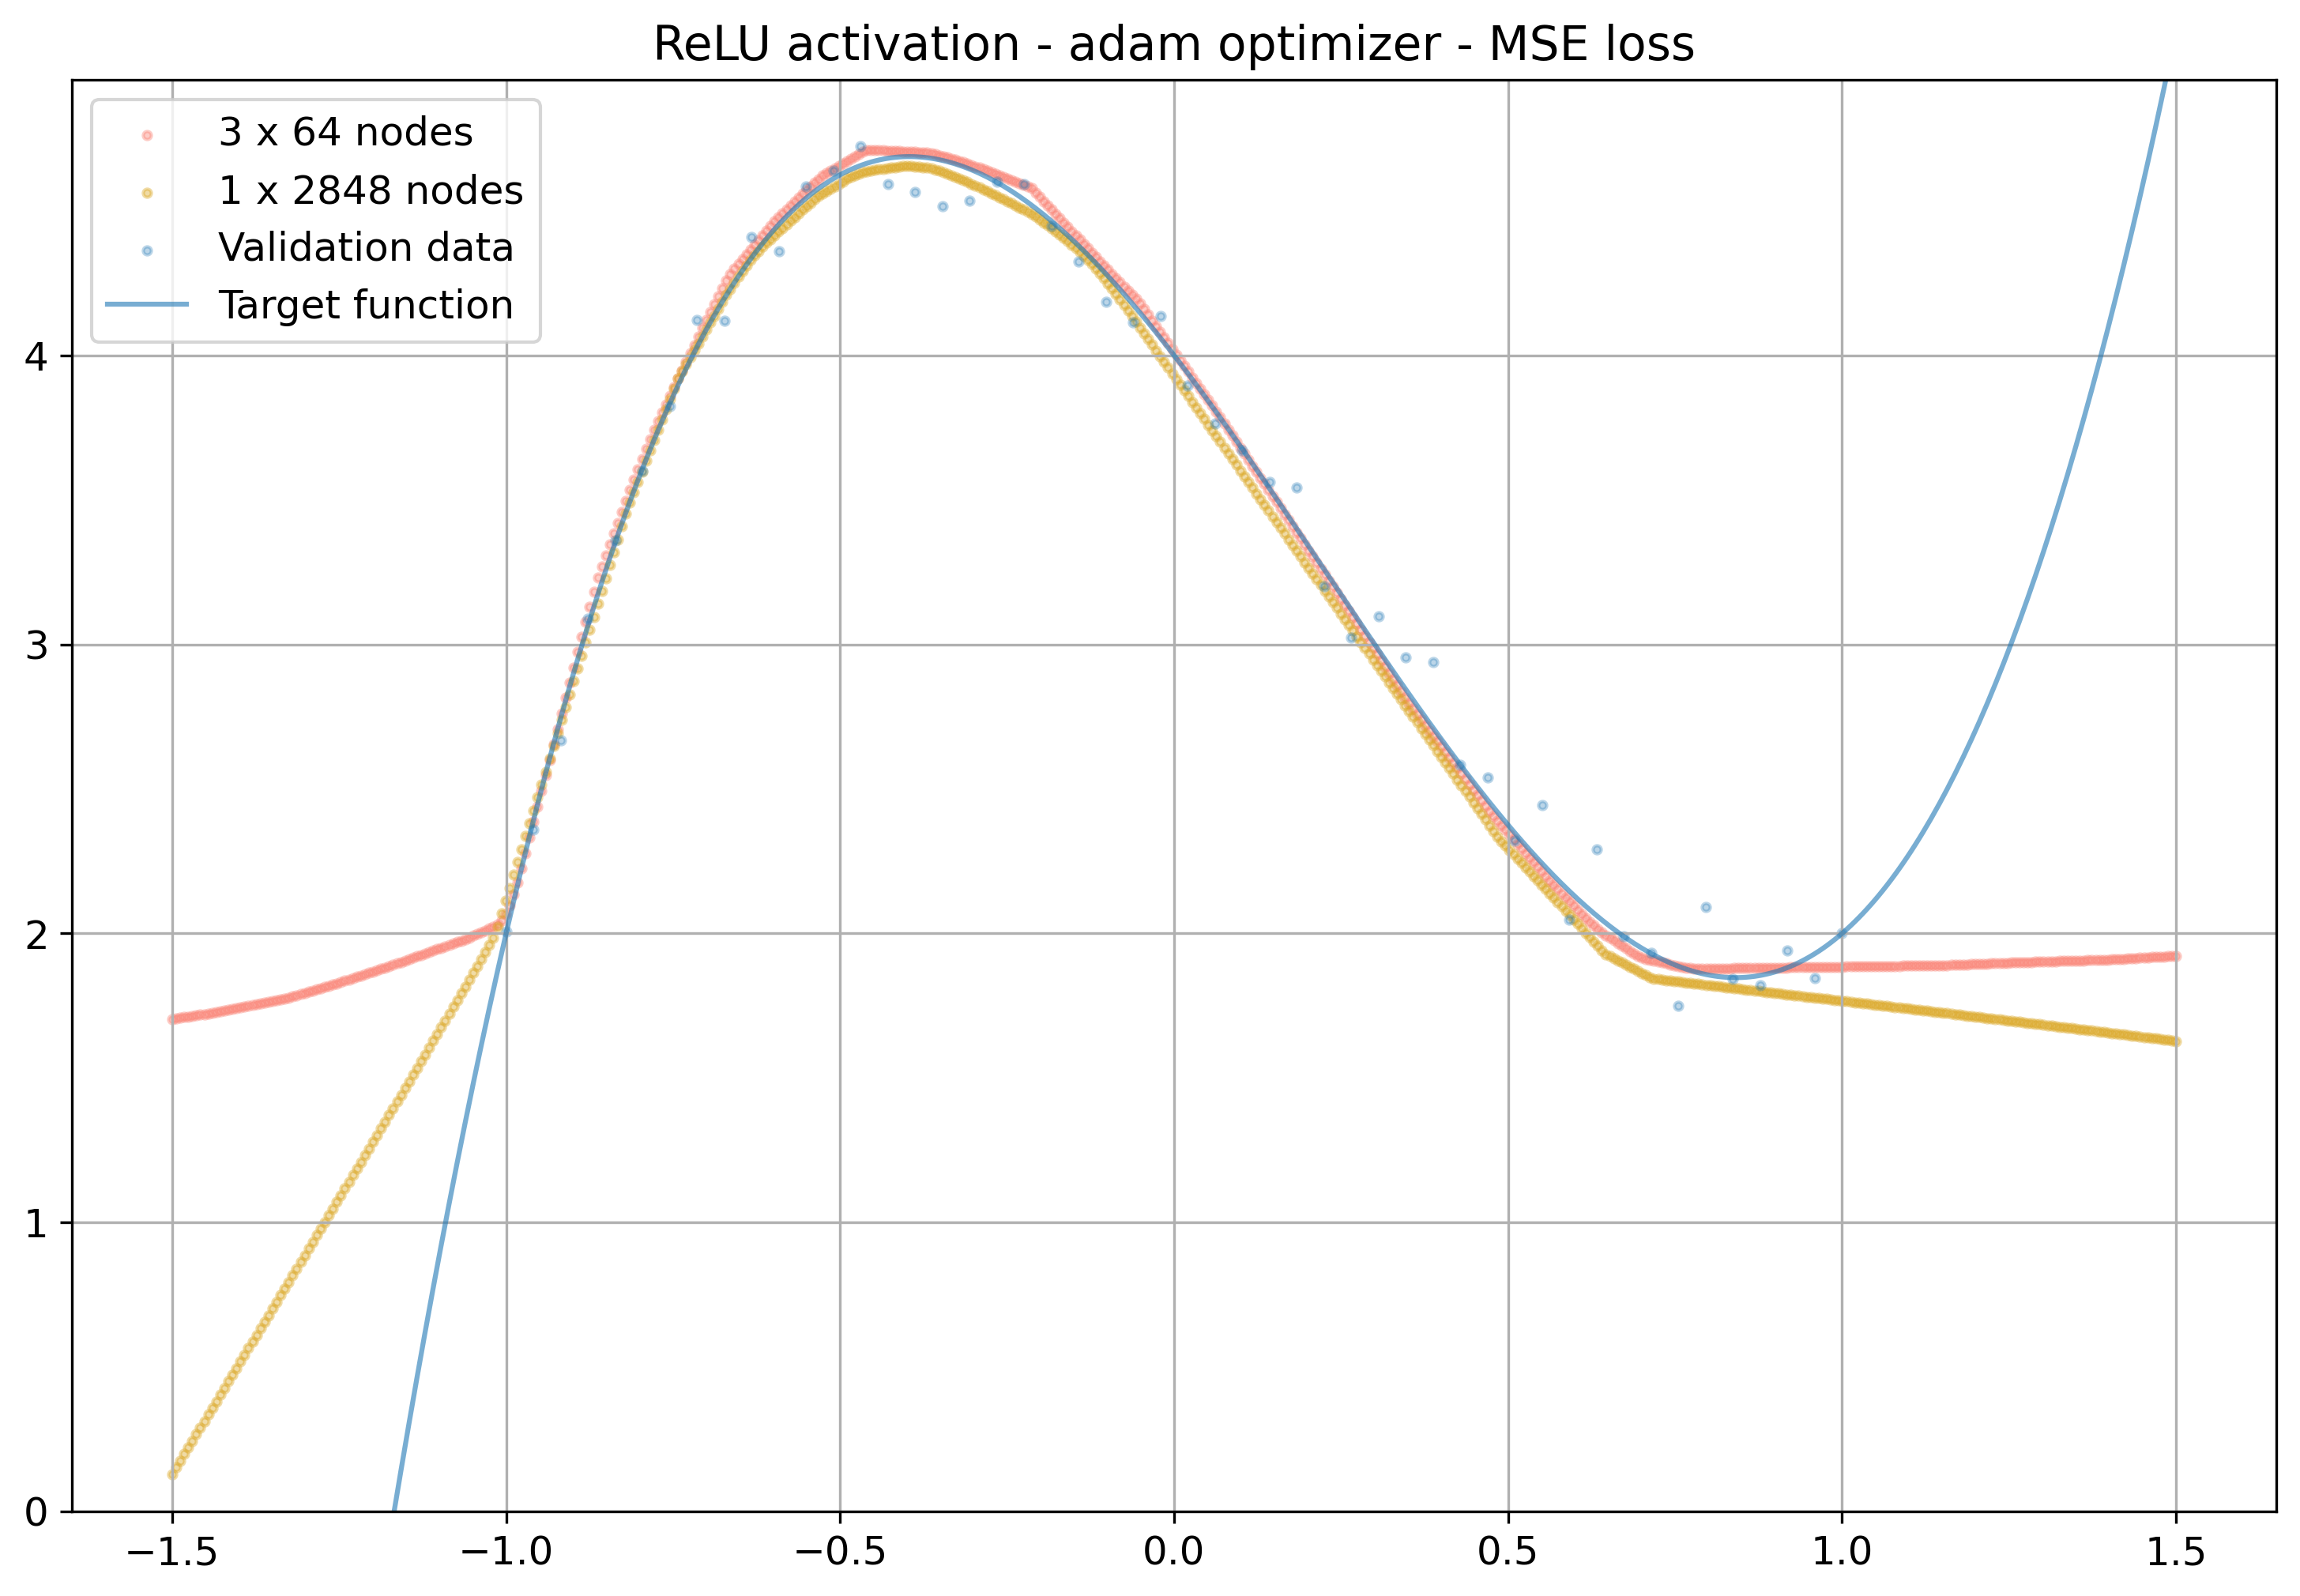

In [42]:
plt.rcParams.update({'font.size': 12})

x_predicted = np.linspace(-1.5, 1.5, 500)
y1_predicted = model1.predict(x_predicted)
y2_predicted = model3.predict(x_predicted)
plt.subplots(1,1,figsize=(12,8), dpi=300)
plt.scatter(x_predicted, y1_predicted, color='salmon', s=6, alpha=0.4, label="3 x 64 nodes")
plt.scatter(x_predicted, y2_predicted, color='goldenrod', s=6, alpha=0.4, label="1 x 2848 nodes")
plt.scatter(x_valid, y_valid, alpha=0.3, s=6, label="Validation data")
plt.ylim(0,)
plt.plot(x_predicted, f(x_predicted), alpha=0.6, label="Target function")
plt.title("ReLU activation - adam optimizer - MSE loss")
plt.grid(True)
plt.legend()
#plt.savefig("./imgs/POLYNOMIAL/1Lvs3L_eqPARAMS.png")
plt.show()

In [43]:
model1 = tf.keras.Sequential()
model1.add(Dense(64, input_shape=(1,), activation="relu"))
model1.add(Dense(64, activation="relu"))
model1.add(Dense(64, activation="relu"))
model1.add(Dense(1, activation="linear"))

model1.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [44]:
history1 = model1.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=100,
          shuffle=True,
          validation_data=(x_valid, y_valid))

Epoch 1/100
32/32 [==============================] - 1s 5ms/step - loss: 8.7657 - mse: 8.7657 - val_loss: 4.3604 - val_mse: 4.3604
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 2.6475 - mse: 2.6475 - val_loss: 1.7340 - val_mse: 1.7340
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 1.3777 - mse: 1.3777 - val_loss: 1.0298 - val_mse: 1.0298
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8117 - mse: 0.8117 - val_loss: 0.6025 - val_mse: 0.6025
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4507 - mse: 0.4507 - val_loss: 0.2956 - val_mse: 0.2956
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2155 - mse: 0.2155 - val_loss: 0.1547 - val_mse: 0.1547
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1176 - mse: 0.1176 - val_loss: 0.1098 - val_mse: 0.1098
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0783 - m

32/32 [==============================] - 0s 2ms/step - loss: 0.0124 - mse: 0.0124 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 64/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0130 - mse: 0.0130 - val_loss: 0.0125 - val_mse: 0.0125
Epoch 65/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0118 - mse: 0.0118 - val_loss: 0.0091 - val_mse: 0.0091
Epoch 66/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0117 - mse: 0.0117 - val_loss: 0.0091 - val_mse: 0.0091
Epoch 67/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 68/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 69/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0190 - val_mse: 0.0190
Epoch 70/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0129 - mse: 0

In [45]:
model2 = tf.keras.Sequential()
model2.add(Dense(64, input_shape=(1,), activation="selu"))
model2.add(Dense(64, activation="selu"))
model2.add(Dense(64, activation="selu"))
model2.add(Dense(1, activation="linear"))

model2.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [46]:
history2 = model2.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=100,
          shuffle=True,
          validation_data=(x_valid, y_valid))

Epoch 1/100
32/32 [==============================] - 0s 3ms/step - loss: 4.7930 - mse: 4.7930 - val_loss: 1.1916 - val_mse: 1.1916
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7103 - mse: 0.7103 - val_loss: 0.4034 - val_mse: 0.4034
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3129 - mse: 0.3129 - val_loss: 0.2335 - val_mse: 0.2335
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1724 - mse: 0.1724 - val_loss: 0.1461 - val_mse: 0.1461
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.1179 - mse: 0.1179 - val_loss: 0.1103 - val_mse: 0.1103
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0868 - mse: 0.0868 - val_loss: 0.0760 - val_mse: 0.0760
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0675 - mse: 0.0675 - val_loss: 0.0700 - val_mse: 0.0700
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0593 - m

32/32 [==============================] - 0s 2ms/step - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0238 - val_mse: 0.0238
Epoch 64/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 65/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0127 - val_mse: 0.0127
Epoch 66/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0096 - val_mse: 0.0096
Epoch 67/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 68/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0228 - val_mse: 0.0228
Epoch 69/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 70/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0130 - mse: 0

In [47]:
model3 = tf.keras.Sequential()
model3.add(Dense(64, input_shape=(1,), activation="relu"))
model3.add(Dense(64, activation="relu"))
model3.add(Dense(64, activation="relu"))
model3.add(Dense(1, activation="linear"))

model3.compile(optimizer='adam', loss='mae', metrics=['mae'])

In [48]:
history3 = model3.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=100,
          shuffle=True,
          validation_data=(x_valid, y_valid))

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 2.7874 - mae: 2.7874 - val_loss: 1.8180 - val_mae: 1.8180
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 1.2436 - mae: 1.2436 - val_loss: 0.9420 - val_mae: 0.9420
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7240 - mae: 0.7240 - val_loss: 0.5363 - val_mae: 0.5363
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4115 - mae: 0.4115 - val_loss: 0.3035 - val_mae: 0.3035
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2551 - mae: 0.2551 - val_loss: 0.2097 - val_mae: 0.2097
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1905 - mae: 0.1905 - val_loss: 0.1569 - val_mae: 0.1569
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1524 - mae: 0.1524 - val_loss: 0.1495 - val_mae: 0.1495
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1391 - m

32/32 [==============================] - 0s 2ms/step - loss: 0.0860 - mae: 0.0860 - val_loss: 0.0783 - val_mae: 0.0783
Epoch 64/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0895 - mae: 0.0895 - val_loss: 0.1001 - val_mae: 0.1001
Epoch 65/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0928 - mae: 0.0928 - val_loss: 0.0820 - val_mae: 0.0820
Epoch 66/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0878 - mae: 0.0878 - val_loss: 0.0776 - val_mae: 0.0776
Epoch 67/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0863 - mae: 0.0863 - val_loss: 0.0867 - val_mae: 0.0867
Epoch 68/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0917 - mae: 0.0917 - val_loss: 0.0798 - val_mae: 0.0798
Epoch 69/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0879 - mae: 0.0879 - val_loss: 0.0856 - val_mae: 0.0856
Epoch 70/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0912 - mae: 0

In [49]:
model4 = tf.keras.Sequential()
model4.add(Dense(64, input_shape=(1,), activation="relu"))
model4.add(Dense(64, activation="relu"))
model4.add(Dense(64, activation="relu"))
model4.add(Dense(1, activation="linear"))

model4.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [50]:
history4 = model4.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=100,
          shuffle=True,
          validation_data=(x_valid, y_valid))

Epoch 1/100
32/32 [==============================] - 0s 3ms/step - loss: 3.4791 - mse: 3.4791 - val_loss: 0.6499 - val_mse: 0.6499
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5958 - mse: 0.5958 - val_loss: 0.5221 - val_mse: 0.5221
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4954 - mse: 0.4954 - val_loss: 0.4371 - val_mse: 0.4371
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4165 - mse: 0.4165 - val_loss: 0.3734 - val_mse: 0.3734
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3571 - mse: 0.3571 - val_loss: 0.3327 - val_mse: 0.3327
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3034 - mse: 0.3034 - val_loss: 0.2657 - val_mse: 0.2657
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2489 - mse: 0.2489 - val_loss: 0.2507 - val_mse: 0.2507
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2047 - m

32/32 [==============================] - 0s 1ms/step - loss: 0.0137 - mse: 0.0137 - val_loss: 0.0128 - val_mse: 0.0128
Epoch 64/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0132 - val_mse: 0.0132
Epoch 65/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0143 - val_mse: 0.0143
Epoch 66/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0127 - val_mse: 0.0127
Epoch 67/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0129 - val_mse: 0.0129
Epoch 68/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0127 - val_mse: 0.0127
Epoch 69/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 70/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0134 - mse: 0

16/16 [==============================] - 0s 1ms/step


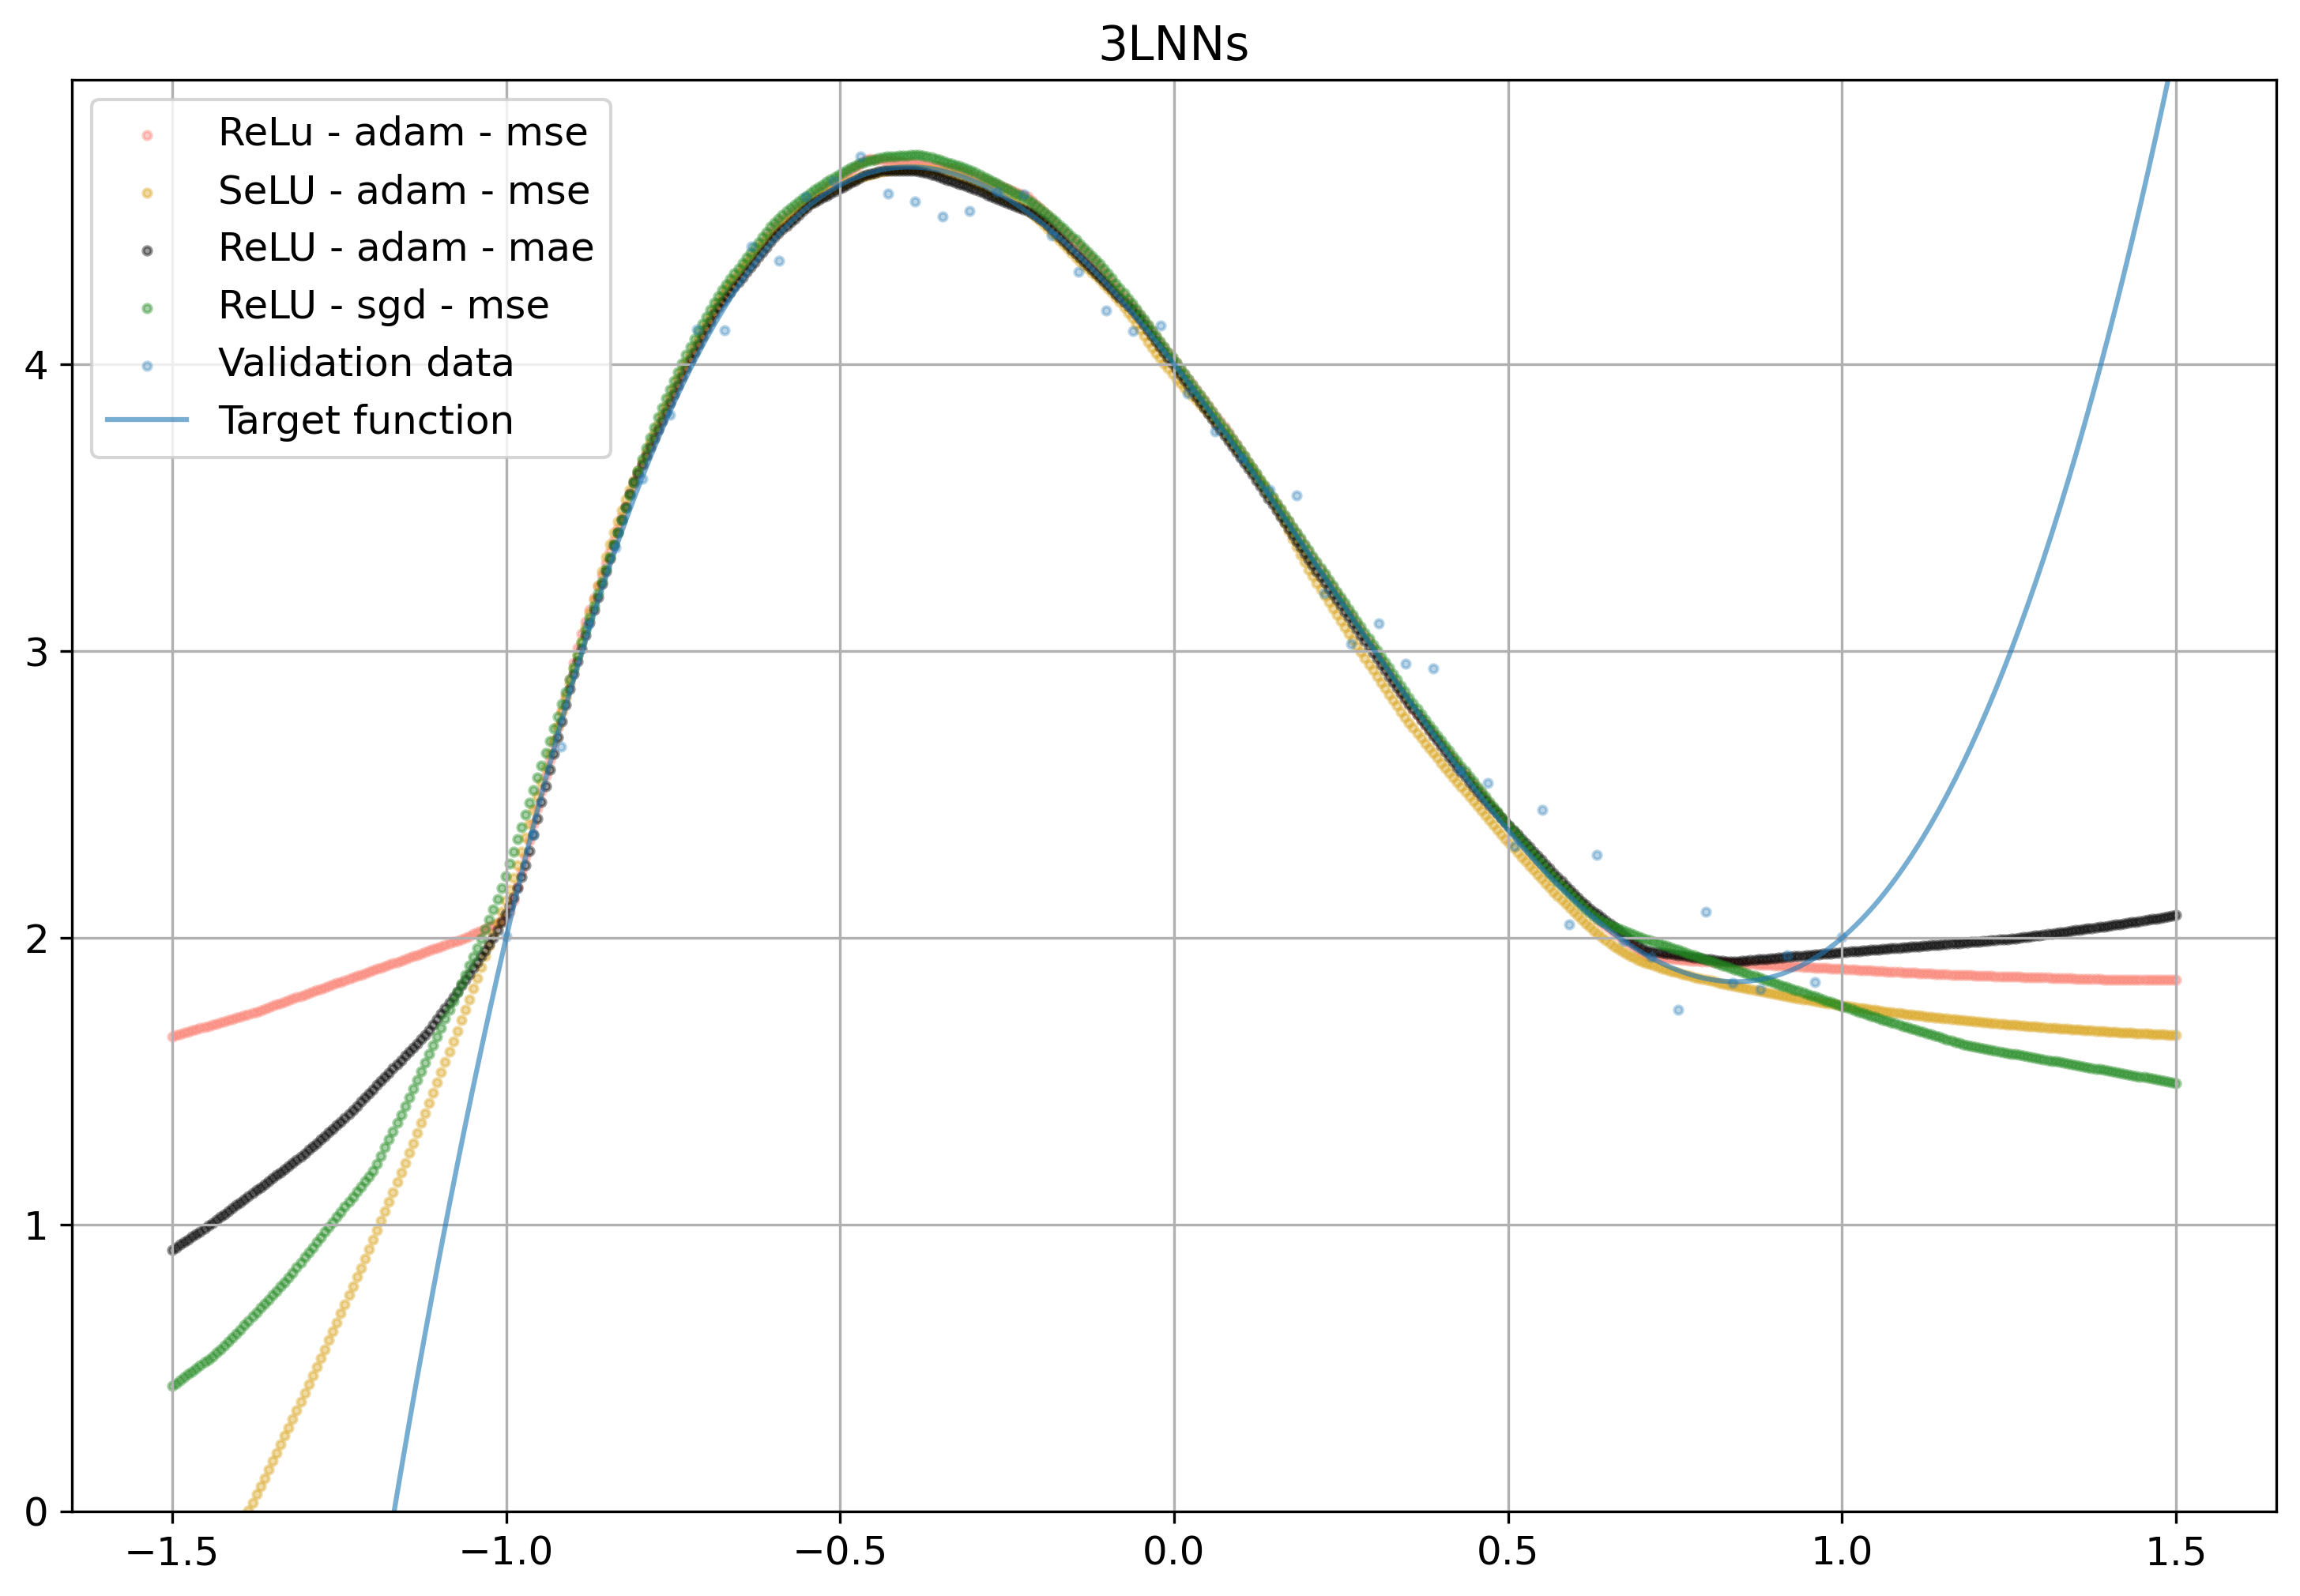

In [51]:
plt.rcParams.update({'font.size': 12})

x_predicted = np.linspace(-1.5, 1.5, 500)
y1_predicted = model1.predict(x_predicted)
y2_predicted = model2.predict(x_predicted)
y3_predicted = model3.predict(x_predicted)
y4_predicted = model4.predict(x_predicted)
plt.subplots(1,1,figsize=(12,8), dpi=300)
plt.scatter(x_predicted, y1_predicted, color='salmon', s=6, alpha=0.4, label="ReLu - adam - mse")
plt.scatter(x_predicted, y2_predicted, color='goldenrod', s=6, alpha=0.4, label="SeLU - adam - mse")
plt.scatter(x_predicted, y3_predicted, color='black', s=6, alpha=0.4, label="ReLU - adam - mae")
plt.scatter(x_predicted, y4_predicted, color='forestgreen', s=6, alpha=0.4, label="ReLU - sgd - mse")
plt.scatter(x_valid, y_valid, alpha=0.3, s=6, label="Validation data")
plt.ylim(0,)
plt.plot(x_predicted, f(x_predicted), alpha=0.6, label="Target function")
plt.grid(True)
plt.legend()
plt.title("3LNNs")
#plt.savefig("./imgs/POLYNOMIAL/3LNNs.png")
plt.show()

In [52]:
model1 = tf.keras.Sequential()
model1.add(Dense(192, input_shape=(1,), activation="relu"))
model1.add(Dense(1, activation="linear"))

model1.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [53]:
history1 = model1.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=100,
          shuffle=True,
          validation_data=(x_valid, y_valid))

Epoch 1/100
32/32 [==============================] - 0s 3ms/step - loss: 10.4264 - mse: 10.4264 - val_loss: 8.6040 - val_mse: 8.6040
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 6.9039 - mse: 6.9039 - val_loss: 4.9505 - val_mse: 4.9505
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 3.3934 - mse: 3.3934 - val_loss: 1.9333 - val_mse: 1.9333
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 1.2437 - mse: 1.2437 - val_loss: 0.8138 - val_mse: 0.8138
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7344 - mse: 0.7344 - val_loss: 0.6741 - val_mse: 0.6741
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6555 - mse: 0.6555 - val_loss: 0.6200 - val_mse: 0.6200
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6131 - mse: 0.6131 - val_loss: 0.5814 - val_mse: 0.5814
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5819 -

32/32 [==============================] - 0s 1ms/step - loss: 0.0302 - mse: 0.0302 - val_loss: 0.0270 - val_mse: 0.0270
Epoch 64/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0300 - mse: 0.0300 - val_loss: 0.0287 - val_mse: 0.0287
Epoch 65/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0293 - mse: 0.0293 - val_loss: 0.0310 - val_mse: 0.0310
Epoch 66/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0292 - mse: 0.0292 - val_loss: 0.0263 - val_mse: 0.0263
Epoch 67/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0289 - mse: 0.0289 - val_loss: 0.0306 - val_mse: 0.0306
Epoch 68/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0282 - mse: 0.0282 - val_loss: 0.0282 - val_mse: 0.0282
Epoch 69/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0280 - mse: 0.0280 - val_loss: 0.0269 - val_mse: 0.0269
Epoch 70/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0281 - mse: 0

In [54]:
model2 = tf.keras.Sequential()
model2.add(Dense(192, input_shape=(1,), activation="selu"))
model2.add(Dense(1, activation="linear"))

model2.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [55]:
history2 = model2.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=100,
          shuffle=True,
          validation_data=(x_valid, y_valid))

Epoch 1/100
32/32 [==============================] - 0s 3ms/step - loss: 9.2171 - mse: 9.2171 - val_loss: 6.0035 - val_mse: 6.0035
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 3.5624 - mse: 3.5624 - val_loss: 1.4280 - val_mse: 1.4280
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8302 - mse: 0.8302 - val_loss: 0.5791 - val_mse: 0.5791
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5841 - mse: 0.5841 - val_loss: 0.5588 - val_mse: 0.5588
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5647 - mse: 0.5647 - val_loss: 0.5389 - val_mse: 0.5389
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5481 - mse: 0.5481 - val_loss: 0.5236 - val_mse: 0.5236
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5345 - mse: 0.5345 - val_loss: 0.5080 - val_mse: 0.5080
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5216 - m

32/32 [==============================] - 0s 2ms/step - loss: 0.0869 - mse: 0.0869 - val_loss: 0.0909 - val_mse: 0.0909
Epoch 64/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0839 - mse: 0.0839 - val_loss: 0.0843 - val_mse: 0.0843
Epoch 65/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0817 - mse: 0.0817 - val_loss: 0.0807 - val_mse: 0.0807
Epoch 66/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0810 - mse: 0.0810 - val_loss: 0.0791 - val_mse: 0.0791
Epoch 67/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0809 - mse: 0.0809 - val_loss: 0.0802 - val_mse: 0.0802
Epoch 68/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0753 - mse: 0.0753 - val_loss: 0.0756 - val_mse: 0.0756
Epoch 69/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0728 - mse: 0.0728 - val_loss: 0.0736 - val_mse: 0.0736
Epoch 70/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0730 - mse: 0

In [56]:
model3 = tf.keras.Sequential()
model3.add(Dense(192, input_shape=(1,), activation="relu"))
model3.add(Dense(1, activation="linear"))

model3.compile(optimizer='adam', loss='mae', metrics=['mae'])

In [57]:
history3 = model3.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=100,
          shuffle=True,
          validation_data=(x_valid, y_valid))

Epoch 1/100
32/32 [==============================] - 0s 3ms/step - loss: 2.9616 - mae: 2.9616 - val_loss: 2.6257 - val_mae: 2.6257
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 2.2412 - mae: 2.2412 - val_loss: 1.7970 - val_mae: 1.7970
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 1.4565 - mae: 1.4565 - val_loss: 1.0971 - val_mae: 1.0971
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8316 - mae: 0.8316 - val_loss: 0.6389 - val_mae: 0.6389
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5843 - mae: 0.5843 - val_loss: 0.5455 - val_mae: 0.5455
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5354 - mae: 0.5354 - val_loss: 0.5248 - val_mae: 0.5248
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5155 - mae: 0.5155 - val_loss: 0.4906 - val_mae: 0.4906
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4949 - m

32/32 [==============================] - 0s 2ms/step - loss: 0.0954 - mae: 0.0954 - val_loss: 0.0854 - val_mae: 0.0854
Epoch 64/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0944 - mae: 0.0944 - val_loss: 0.0889 - val_mae: 0.0889
Epoch 65/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0943 - mae: 0.0943 - val_loss: 0.0904 - val_mae: 0.0904
Epoch 66/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0939 - mae: 0.0939 - val_loss: 0.0848 - val_mae: 0.0848
Epoch 67/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0958 - mae: 0.0958 - val_loss: 0.0848 - val_mae: 0.0848
Epoch 68/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0957 - mae: 0.0957 - val_loss: 0.0833 - val_mae: 0.0833
Epoch 69/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0975 - mae: 0.0975 - val_loss: 0.0869 - val_mae: 0.0869
Epoch 70/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0932 - mae: 0

In [58]:
model4 = tf.keras.Sequential()
model4.add(Dense(192, input_shape=(1,), activation="relu"))
model4.add(Dense(1, activation="linear"))

model4.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [59]:
history4 = model4.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=100,
          shuffle=True,
          validation_data=(x_valid, y_valid))

Epoch 1/100
32/32 [==============================] - 0s 3ms/step - loss: 5.0054 - mse: 5.0054 - val_loss: 1.0531 - val_mse: 1.0531
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7314 - mse: 0.7314 - val_loss: 0.5875 - val_mse: 0.5875
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5822 - mse: 0.5822 - val_loss: 0.5426 - val_mse: 0.5426
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5465 - mse: 0.5465 - val_loss: 0.5185 - val_mse: 0.5185
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5239 - mse: 0.5239 - val_loss: 0.4967 - val_mse: 0.4967
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4991 - mse: 0.4991 - val_loss: 0.4799 - val_mse: 0.4799
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4838 - mse: 0.4838 - val_loss: 0.4612 - val_mse: 0.4612
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4662 - m

32/32 [==============================] - 0s 2ms/step - loss: 0.0616 - mse: 0.0616 - val_loss: 0.0618 - val_mse: 0.0618
Epoch 64/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0607 - mse: 0.0607 - val_loss: 0.0612 - val_mse: 0.0612
Epoch 65/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0597 - mse: 0.0597 - val_loss: 0.0607 - val_mse: 0.0607
Epoch 66/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0587 - mse: 0.0587 - val_loss: 0.0612 - val_mse: 0.0612
Epoch 67/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0579 - mse: 0.0579 - val_loss: 0.0591 - val_mse: 0.0591
Epoch 68/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0574 - mse: 0.0574 - val_loss: 0.0589 - val_mse: 0.0589
Epoch 69/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0565 - mse: 0.0565 - val_loss: 0.0561 - val_mse: 0.0561
Epoch 70/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0559 - mse: 0

16/16 [==============================] - 0s 1ms/step


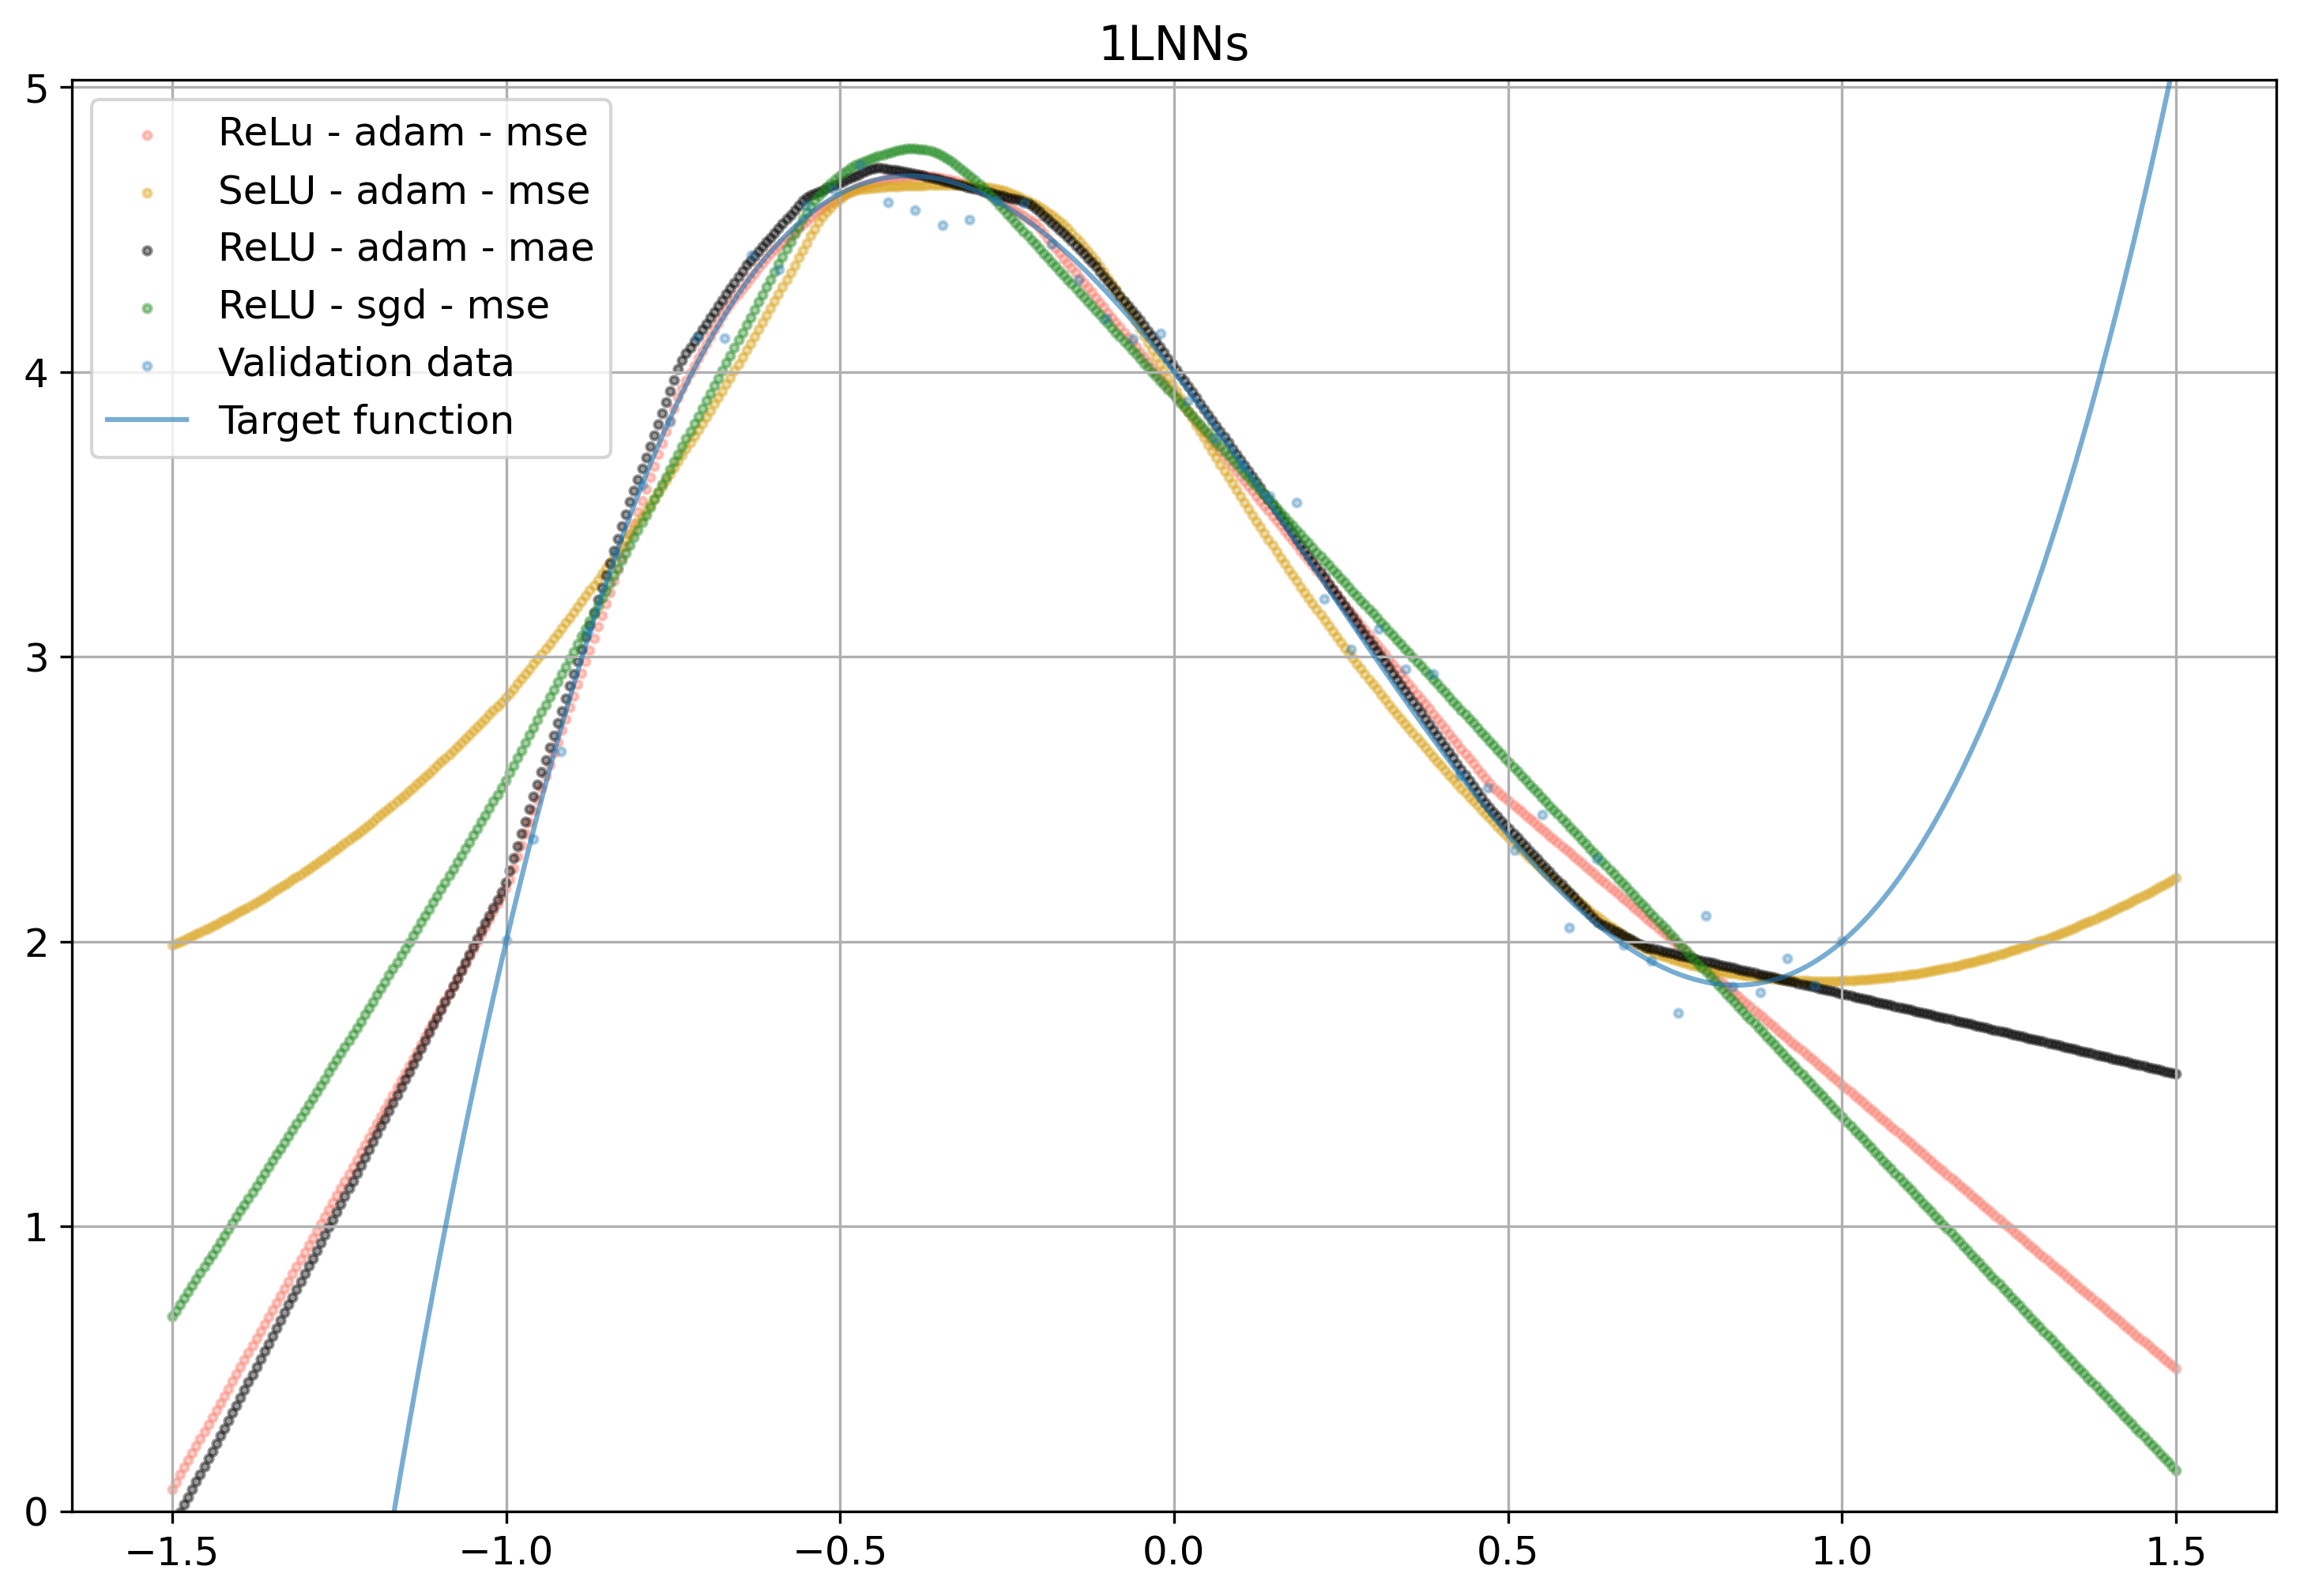

In [60]:
plt.rcParams.update({'font.size': 12})

x_predicted = np.linspace(-1.5, 1.5, 500)
y1_predicted = model1.predict(x_predicted)
y2_predicted = model2.predict(x_predicted)
y3_predicted = model3.predict(x_predicted)
y4_predicted = model4.predict(x_predicted)
plt.subplots(1,1,figsize=(12,8), dpi=300)
plt.scatter(x_predicted, y1_predicted, color='salmon', s=6, alpha=0.4, label="ReLu - adam - mse")
plt.scatter(x_predicted, y2_predicted, color='goldenrod', s=6, alpha=0.4, label="SeLU - adam - mse")
plt.scatter(x_predicted, y3_predicted, color='black', s=6, alpha=0.4, label="ReLU - adam - mae")
plt.scatter(x_predicted, y4_predicted, color='forestgreen', s=6, alpha=0.4, label="ReLU - sgd - mse")
plt.scatter(x_valid, y_valid, alpha=0.3, s=6, label="Validation data")
plt.ylim(0,)
plt.plot(x_predicted, f(x_predicted), alpha=0.6, label="Target function")
plt.grid(True)
plt.legend()
plt.title("1LNNs")
#plt.savefig("./imgs/POLYNOMIAL/1LNNs.png")
plt.show()

#### Exercise 11.3

In [61]:
def f(x,y):
    return np.sin(x**2 + y**2)

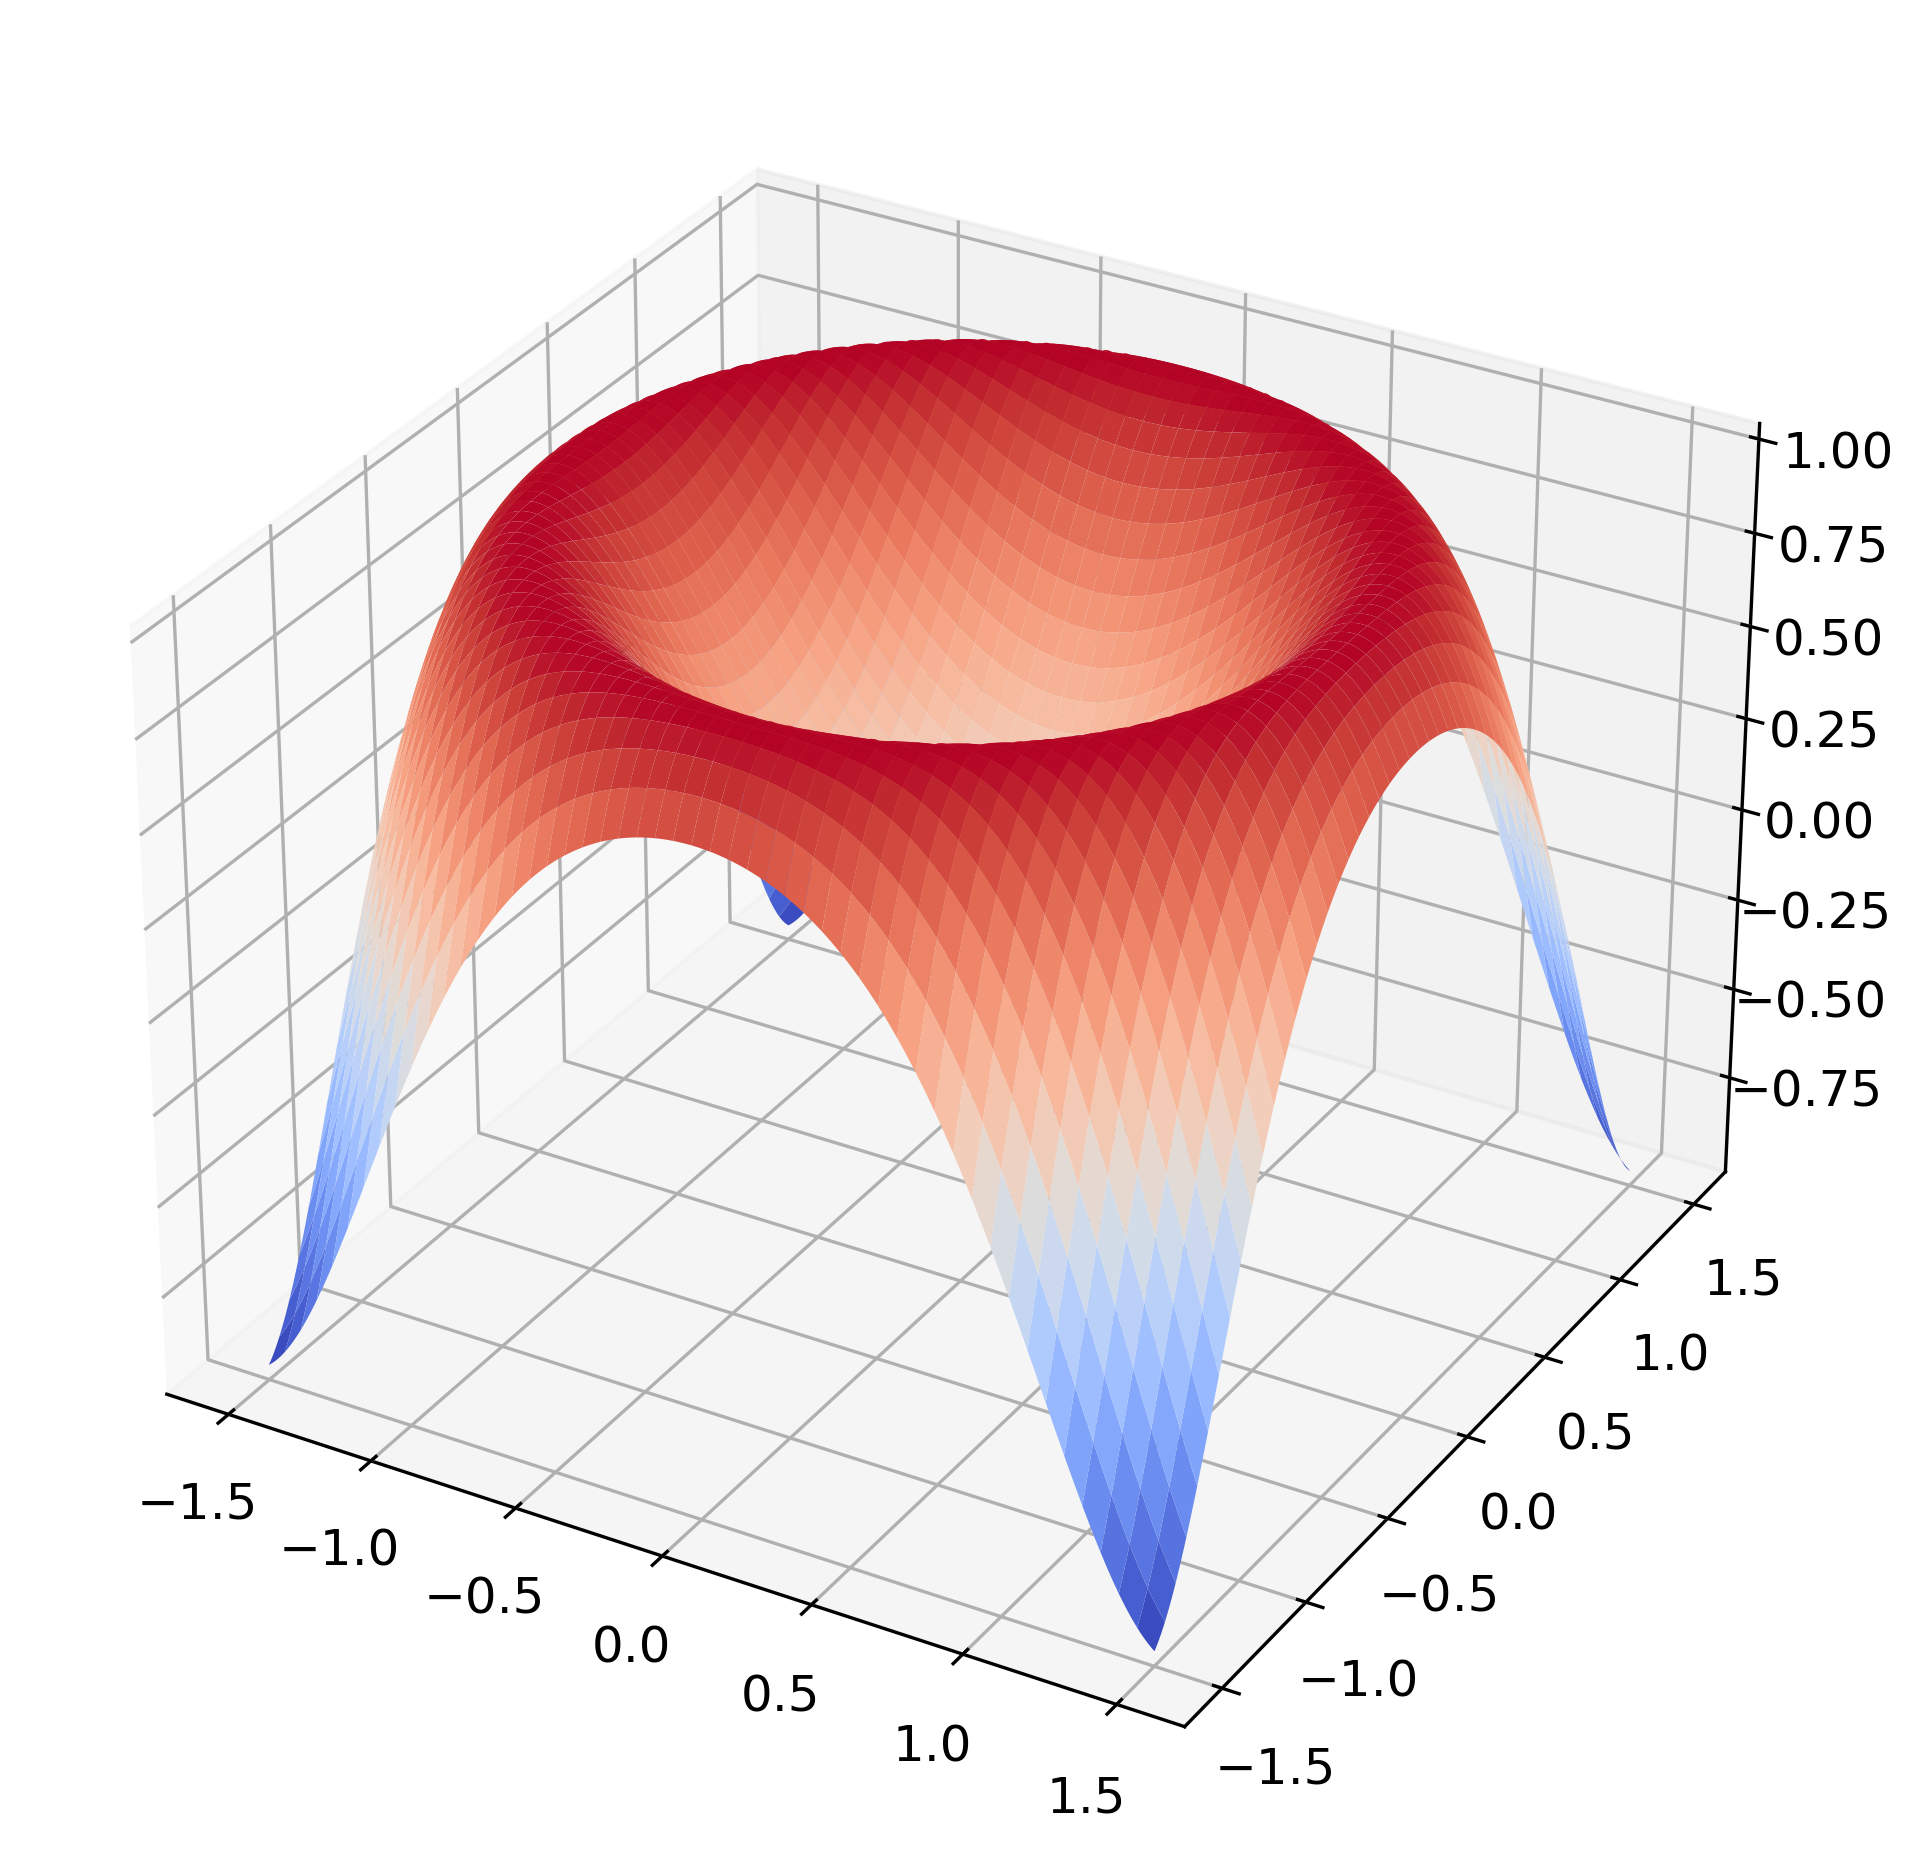

In [62]:
x = np.linspace(-1.5, 1.5, 1000)
y = np.linspace(-1.5, 1.5, 1000)
x, y = np.meshgrid(x, y)
z=np.sin(x**2+y**2)
fig = plt.figure(figsize=(12,8), dpi=300)
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(x, y, z, cmap='coolwarm')

In [63]:
N_t=5001
x=np.random.uniform(-1.5, 1.5, N_t)
y=np.random.uniform(-1.5, 1.5, N_t)
x_t = np.column_stack((x,y)) # training input
y_t = np.sin(x**2 + y**2)

x1=np.random.uniform(-1.5, 1.5, 501)
y1=np.random.uniform(-1.5, 1.5, 501)
x_v = np.column_stack((x1,y1))
y_v = np.sin(x1**2 + y1**2)

In [64]:
model1 = tf.keras.Sequential()
model1.add(Dense(64, input_shape=(2,), activation="relu"))
model1.add(Dense(64, activation="relu"))
model1.add(Dense(64, activation="relu"))
model1.add(Dense(1, activation="linear"))

model1.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [65]:
history1 = model1.fit(x=x_t, y=y_t, 
          batch_size=32, epochs=100,
          shuffle=True,
          validation_data=(x_v, y_v))

Epoch 1/100
157/157 [==============================] - 1s 2ms/step - loss: 0.1639 - mse: 0.1639 - val_loss: 0.1063 - val_mse: 0.1063
Epoch 2/100
157/157 [==============================] - 0s 1ms/step - loss: 0.0953 - mse: 0.0953 - val_loss: 0.0536 - val_mse: 0.0536
Epoch 3/100
157/157 [==============================] - 0s 1ms/step - loss: 0.0276 - mse: 0.0276 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 4/100
157/157 [==============================] - 0s 1ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 5/100
157/157 [==============================] - 0s 1ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 9.6071e-04 - val_mse: 9.6071e-04
Epoch 6/100
157/157 [==============================] - 0s 1ms/step - loss: 7.0938e-04 - mse: 7.0938e-04 - val_loss: 5.7075e-04 - val_mse: 5.7075e-04
Epoch 7/100
157/157 [==============================] - 0s 1ms/step - loss: 5.1708e-04 - mse: 5.1708e-04 - val_loss: 3.7096e-04 - val_mse: 3.7096e-04
Epoch 8/100
157/157 [========

157/157 [==============================] - 0s 1ms/step - loss: 1.2028e-04 - mse: 1.2028e-04 - val_loss: 2.3865e-04 - val_mse: 2.3865e-04
Epoch 57/100
157/157 [==============================] - 0s 2ms/step - loss: 9.7040e-05 - mse: 9.7040e-05 - val_loss: 1.2190e-04 - val_mse: 1.2190e-04
Epoch 58/100
157/157 [==============================] - 0s 2ms/step - loss: 1.1951e-04 - mse: 1.1951e-04 - val_loss: 4.6788e-05 - val_mse: 4.6788e-05
Epoch 59/100
157/157 [==============================] - 0s 2ms/step - loss: 6.8198e-04 - mse: 6.8198e-04 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 60/100
157/157 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 8.1246e-05 - val_mse: 8.1246e-05
Epoch 61/100
157/157 [==============================] - 0s 1ms/step - loss: 1.0331e-04 - mse: 1.0331e-04 - val_loss: 9.3044e-05 - val_mse: 9.3044e-05
Epoch 62/100
157/157 [==============================] - 0s 1ms/step - loss: 1.2641e-04 - mse: 1.2641e-04 - val_loss: 1.2171e-04 -

157/157 [==============================] - 0s 882us/step


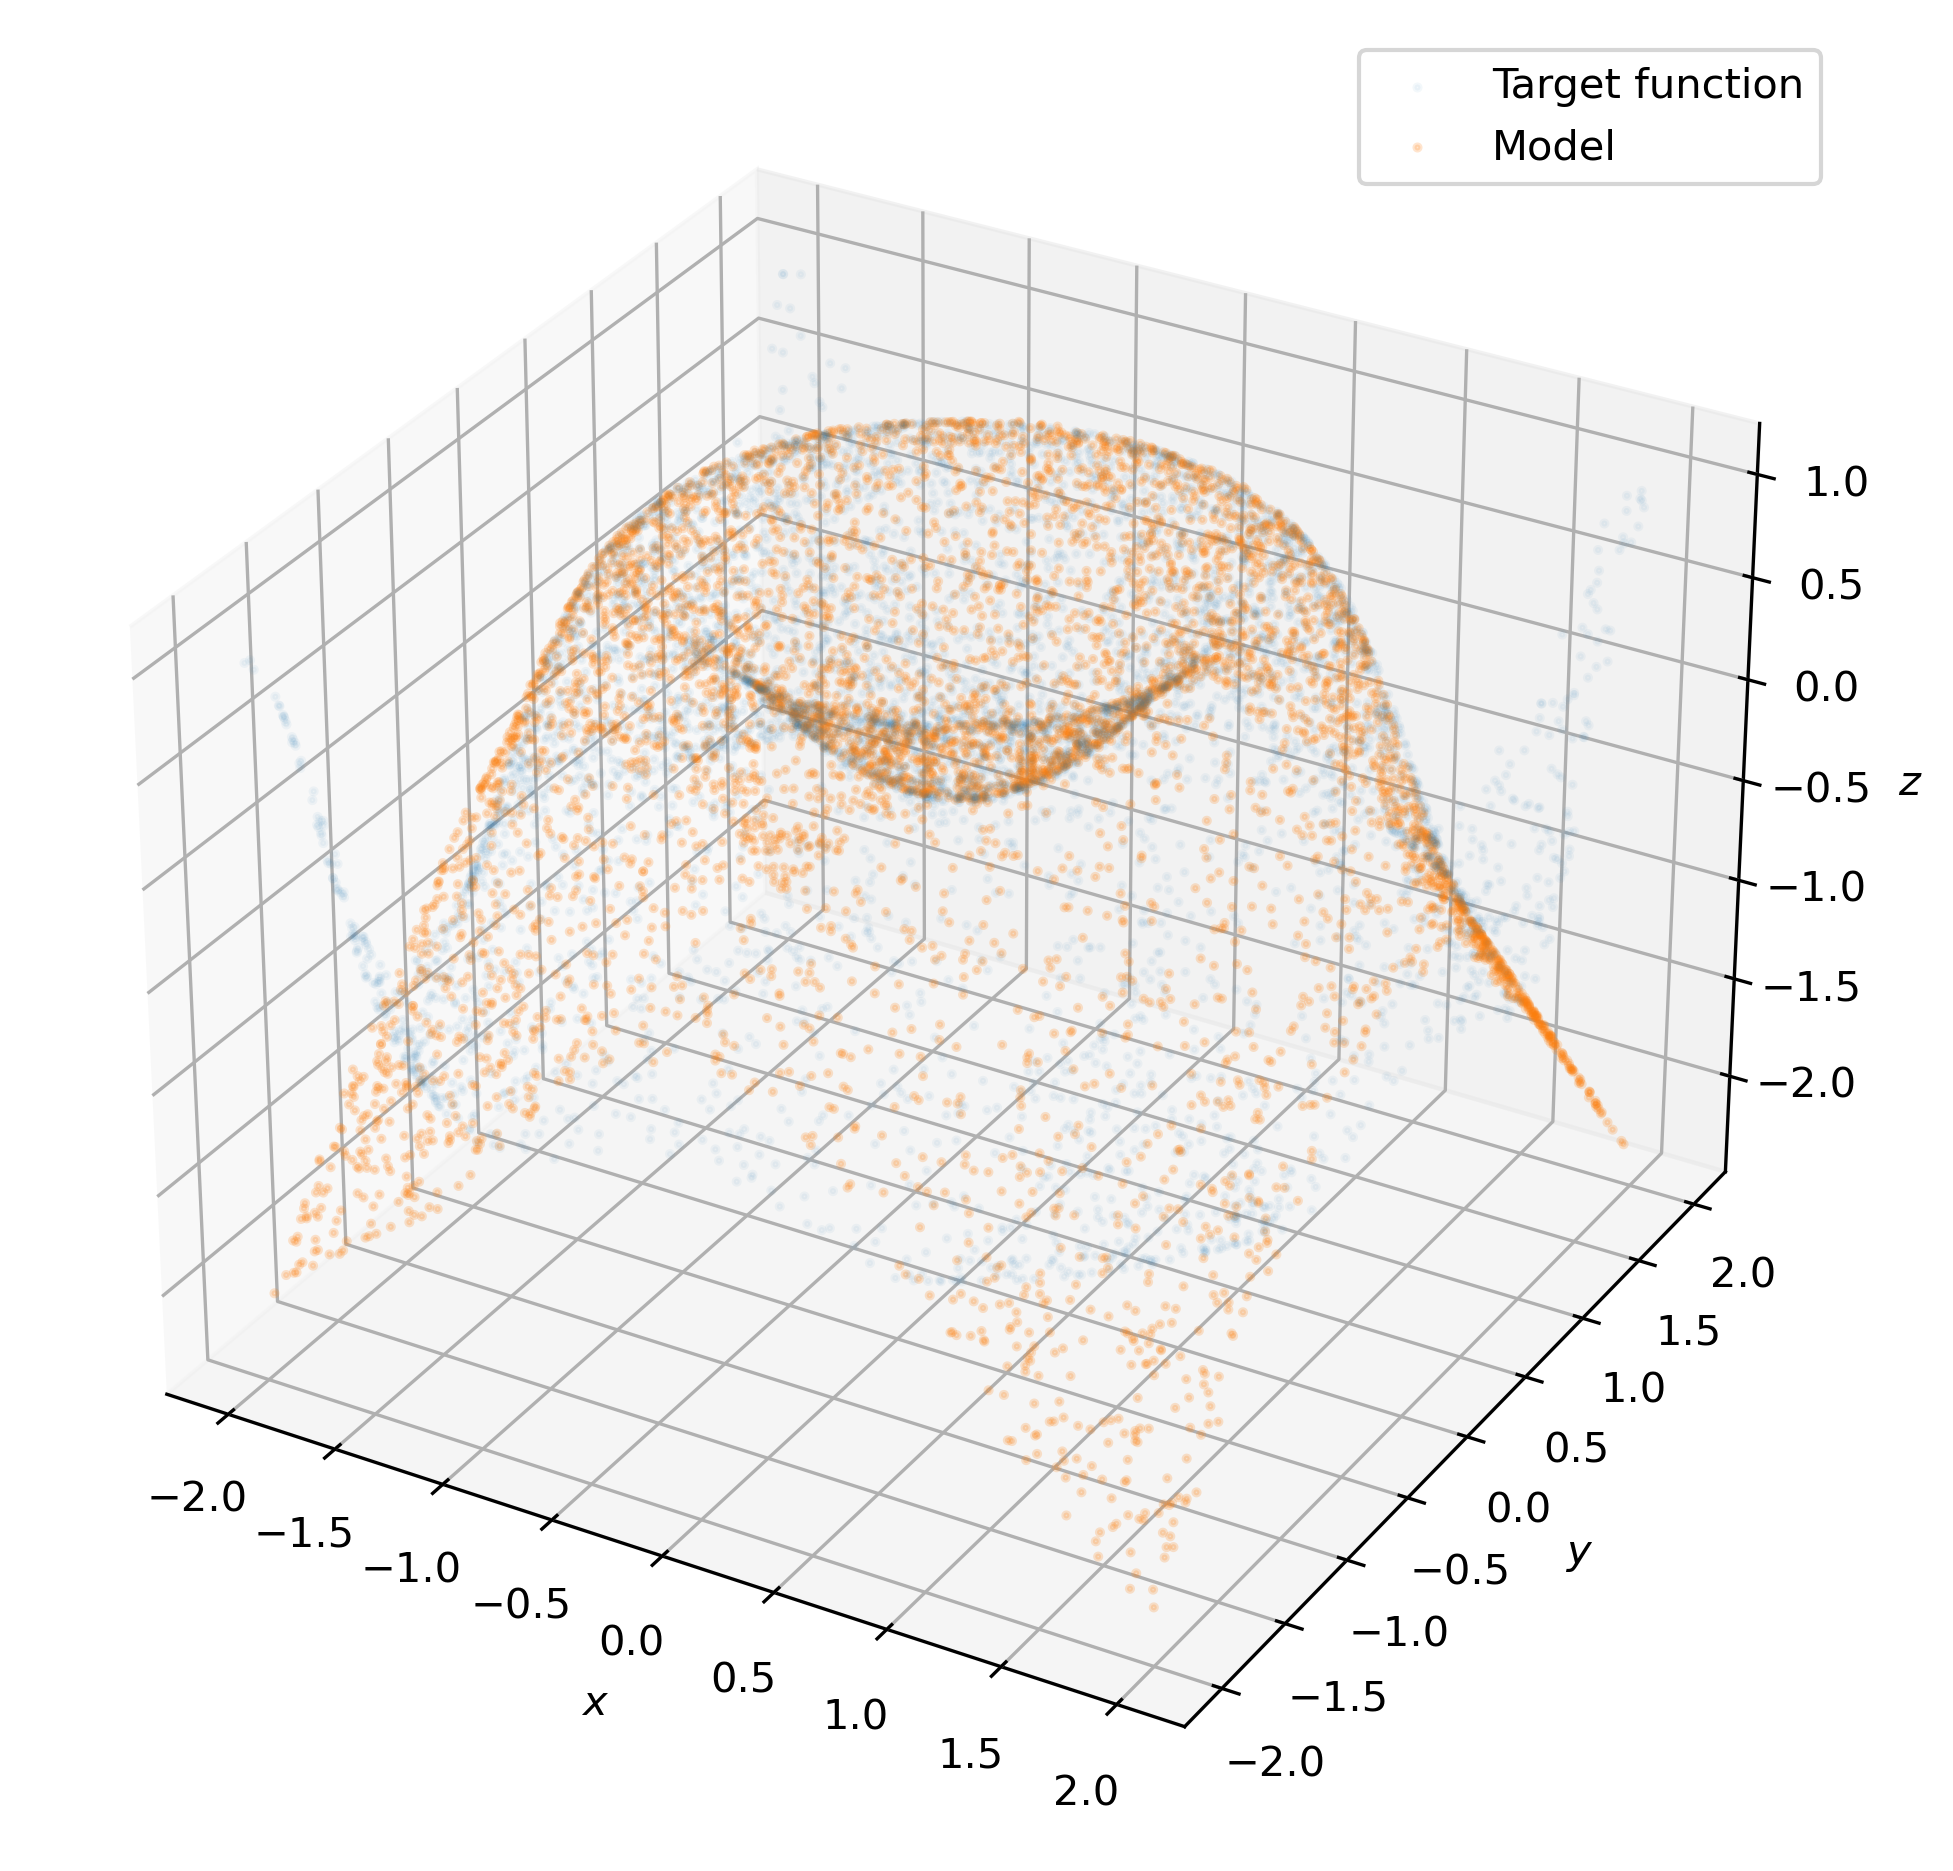

In [66]:
plt.rcParams.update({'font.size': 10})

x_predicted = np.random.uniform(-2, 2, N_t)
y_predicted = np.random.uniform(-2, 2, N_t)
r_predicted = np.column_stack((x_predicted, y_predicted))
z_predicted = model1.predict(r_predicted)

x = np.random.uniform(-2,2, N_t)
y = np.random.uniform(-2,2,N_t)
z = np.sin(x**2+y**2)

fig = plt.figure(figsize=(12,8), dpi=300)
ax = fig.add_subplot(111, projection='3d')
surface = ax.scatter(x, y, z, alpha=0.05, s=2, label="Target function")
ax.scatter(x_predicted, y_predicted, z_predicted, s=2, alpha=0.2, label="Model")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$z$")

#plt.savefig("./imgs/3D/3dplot.png")

plt.legend()
plt.show()

157/157 [==============================] - 0s 616us/step


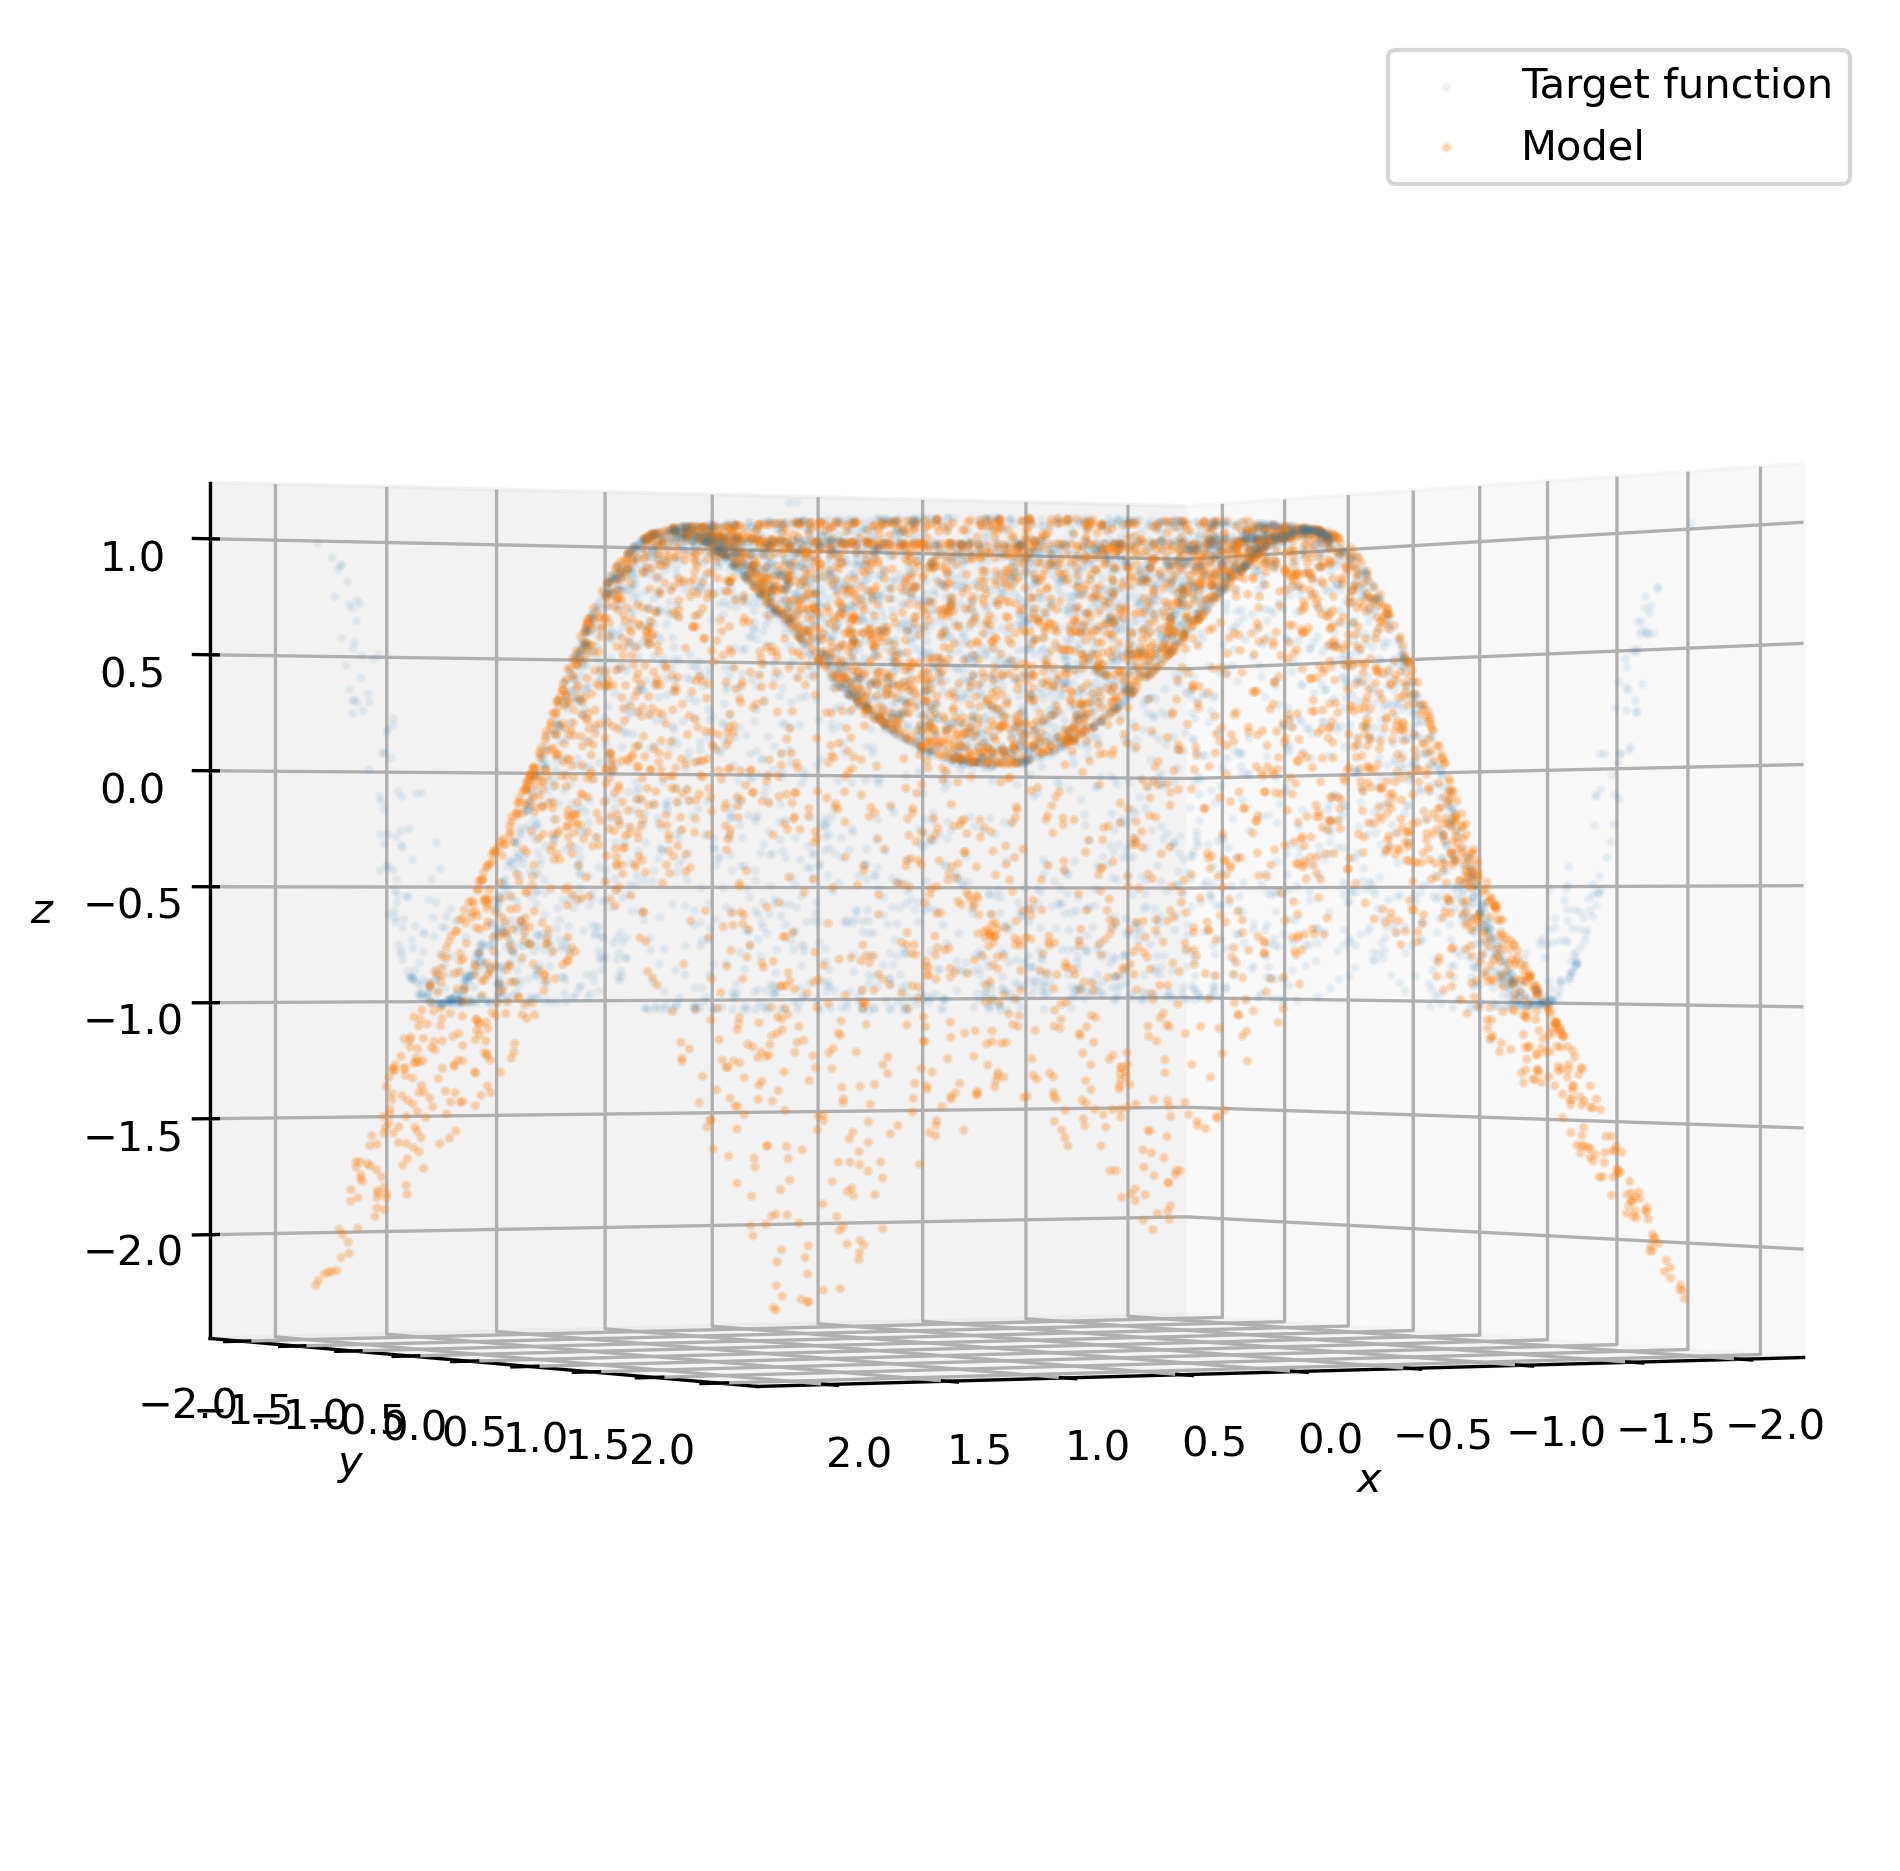

In [67]:
plt.rcParams.update({'font.size': 10})

x_predicted = np.random.uniform(-2, 2, N_t)
y_predicted = np.random.uniform(-2, 2, N_t)
r_predicted = np.column_stack((x_predicted, y_predicted))
z_predicted = model1.predict(r_predicted)

x = np.random.uniform(-2,2, N_t)
y = np.random.uniform(-2,2,N_t)
z = np.sin(x**2+y**2)

fig = plt.figure(figsize=(12,8), dpi=300)
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x, y, z, alpha=0.05, s=2, label="Target function")
ax.scatter(x_predicted, y_predicted, z_predicted, alpha=0.2, s=2, label="Model")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$z$")


ax.view_init(elev=0, azim=60)

#plt.savefig("./imgs/3D/front_view.png")

plt.legend()
plt.show()

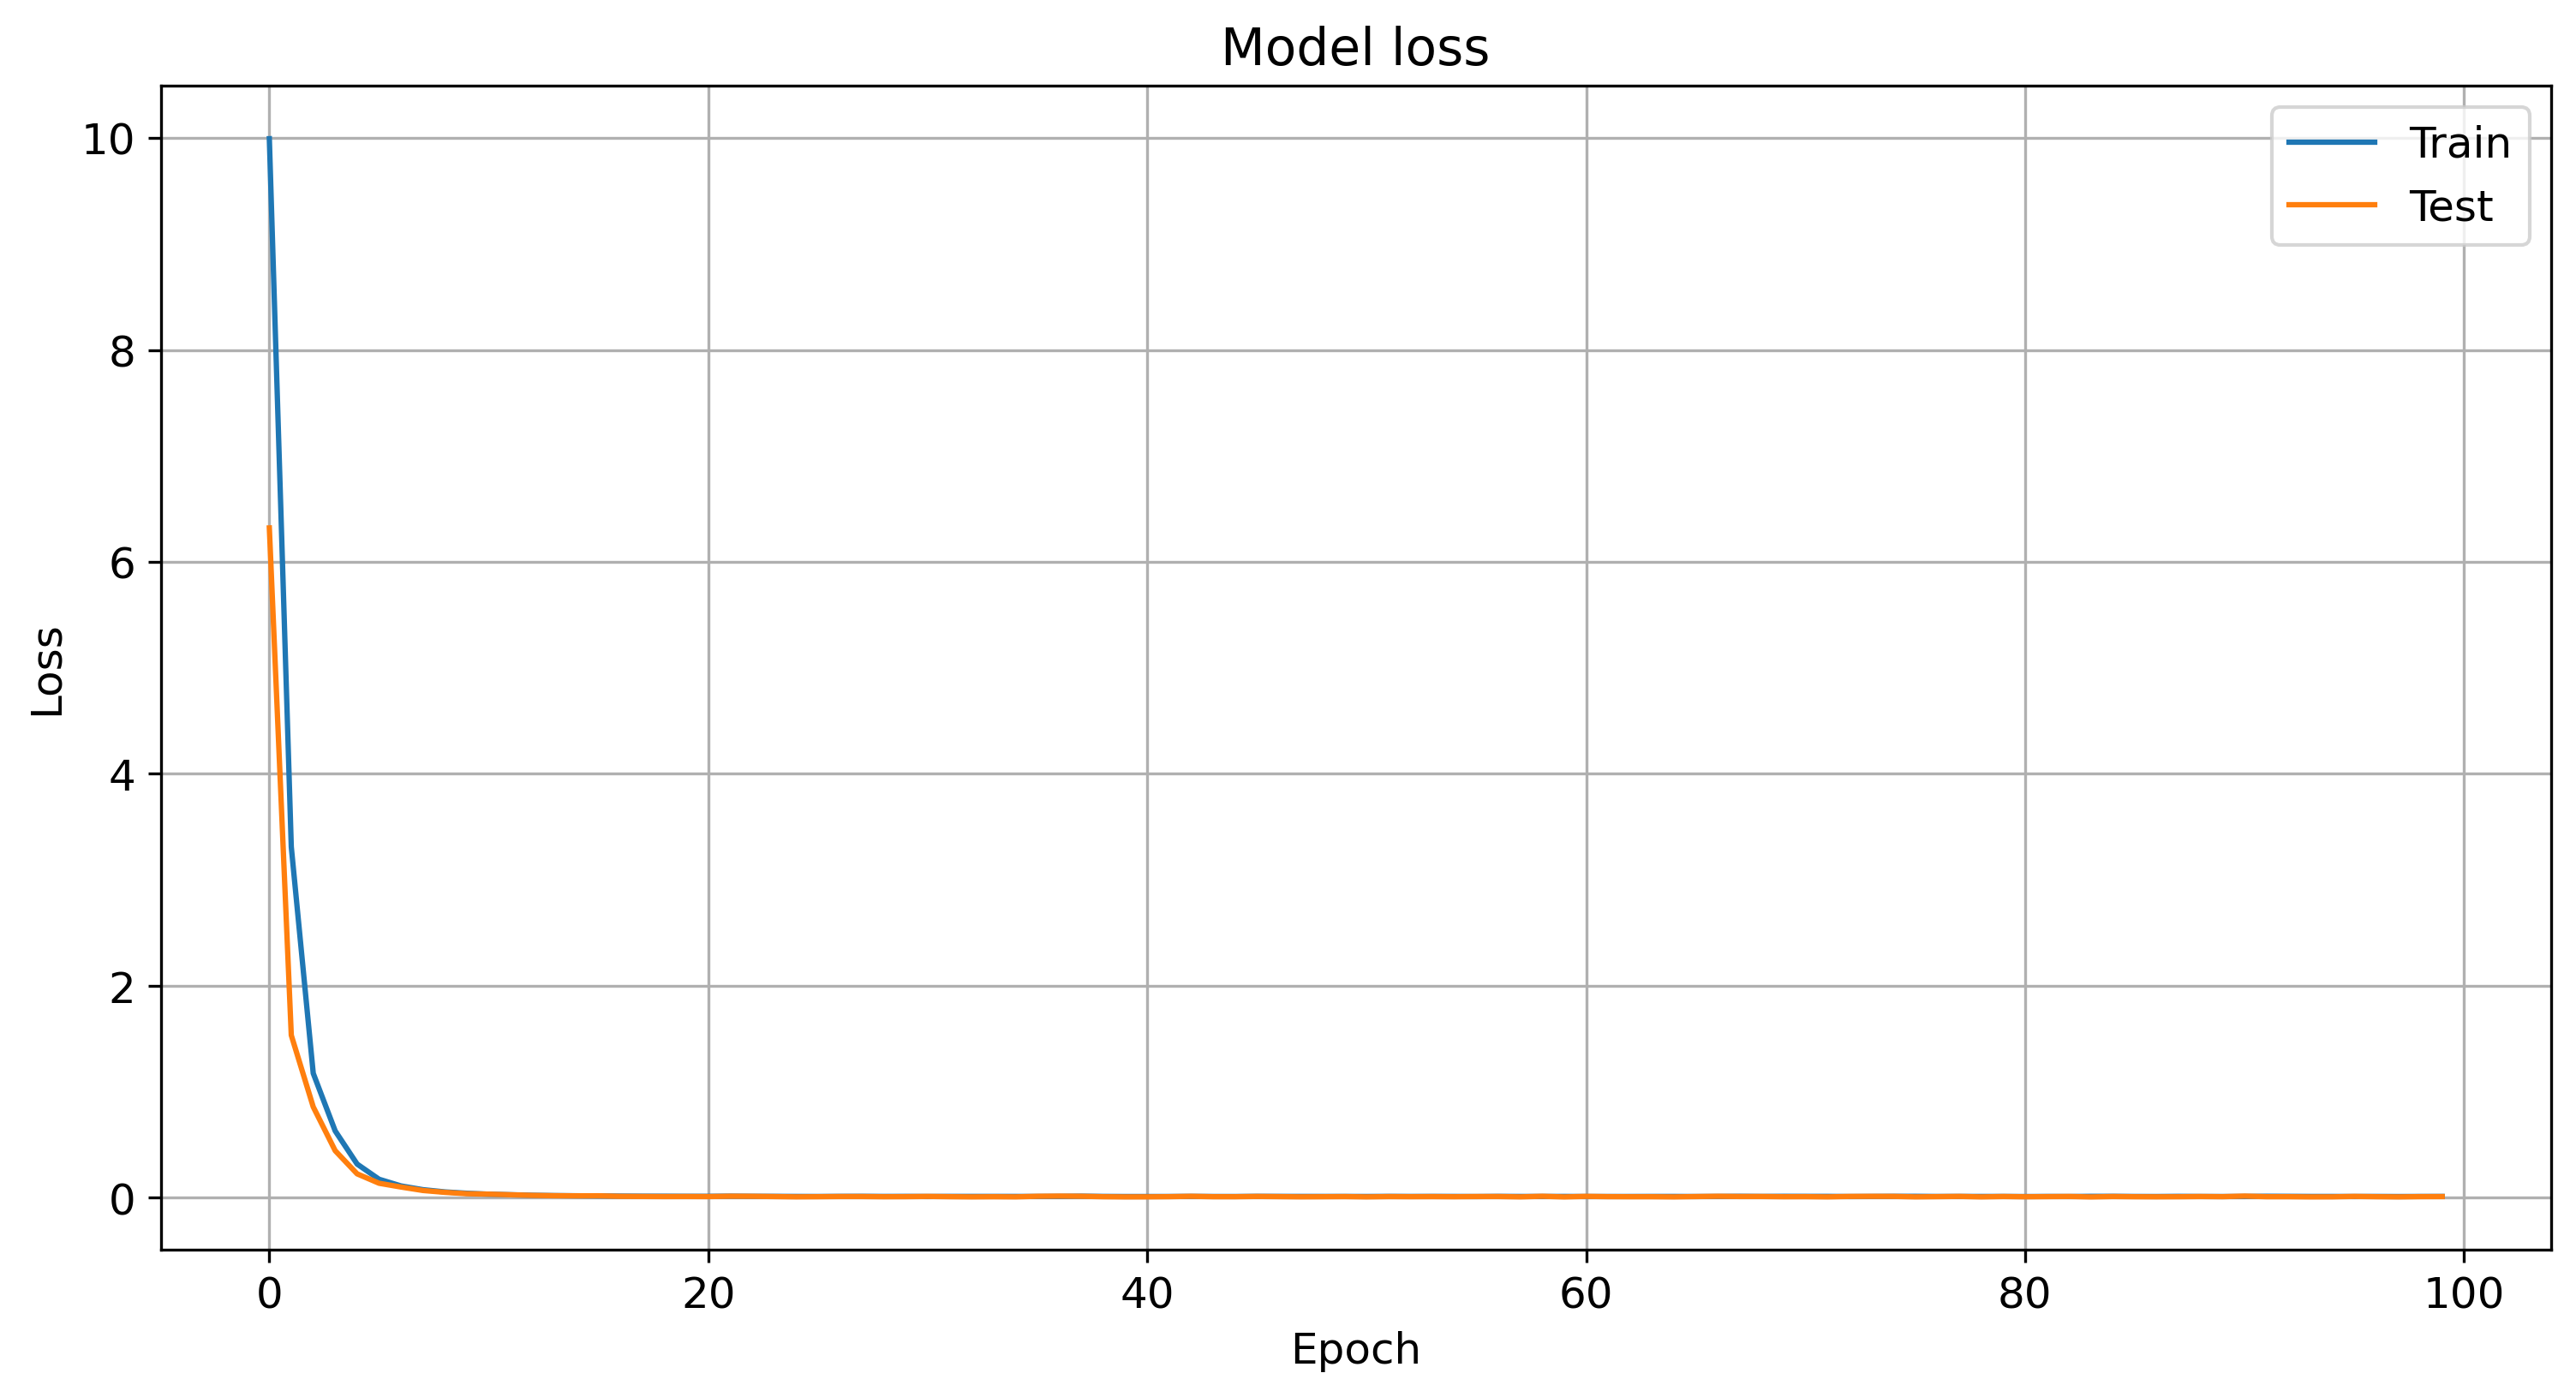

In [68]:
plt.rcParams.update({'font.size': 12})

plt.subplots(1,1,figsize=(12,6), dpi=300)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)

#plt.savefig("./imgs/3D/loss.png")

plt.show()